<a href="https://colab.research.google.com/github/maria-papz/final-year-project/blob/main/predictive_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model Comparison

In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 3.0 MB/s eta 0:00:00


## Price data only

### Optimised LSTM

In [ ]:
import random
import numpy as np
import tensorflow as tf
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
 !pip install pandas_ta
import yfinance as yf
import pandas_ta as ta
import pandas as pd




indicators_df = pd.DataFrame()


import yfinance as yf
import pandas_ta as ta
import pandas as pd
import numpy as np

# Download the S&P 500 data
sp500 = yf.download("^GSPC", start="2017-06-21", end="2023-07-11")

# Calculate daily returns
sp500['direction'] =  np.where(sp500['Close'].shift(1) < sp500['Close'], 1, 0)

print(sp500.head())
# Create indicators_df
indicators_df = pd.DataFrame({"direction": sp500["direction"]})
indicators_df["sma5"] = ta.sma(sp500["Close"], length=5)
indicators_df['Open']=sp500['Open']
indicators_df['Close']=sp500['Close']
indicators_df["sma10"] = ta.sma(sp500["Close"], length=10)


indicators_df["ema12"] = ta.ema(sp500["Close"],length=12)


indicators_df["rdp5"]=sp500["Close"].pct_change(5) * 100
indicators_df["rdp10"]=sp500["Close"].pct_change(10) * 100

indicators_df["atr"]= ta.atr(sp500["High"],sp500["Low"],sp500["Close"])

## Momentum Indicators 14, 21, or 28
# help(ta.rsi)
indicators_df["rsi14"] = ta.rsi(sp500["Close"], length=14)
indicators_df["mom"] = ta.mom(sp500["Close"],length=1)
print(indicators_df)
# Drop rows with NaN values
indicators_df.dropna(inplace=True)

# Display the first few rows of the updated indicators_df
print(indicators_df)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=274ec025cf0ec0095a44663b254bb71e0ba3cc79220b747554c89760338cfa99
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-06-21  2439.310059  2442.229980  2430.739990  2435.610107  2435.610107   
2017-06-22  2437.399902  2441.620117  2433.270020  2434.500000  2434.500000   
2017-06-23  2434.649902  2441.399902  2431.110107  2438.300049  2438.300049   
2017-06-26  2443.320068  2450.419922  2437.030029  2439.070068  2439.070068   
2017-06-27  2436.340088  2440.149902  2419.379883  2419.379883  2419.379883   

                Volume  direction  
Date                               
2017-06-21  3599190000          0  
2017-06-22  3477250000          0  
2017-06-23  5282460000          1  
2017-06-26  3243660000          1  
2017-06-27  3564770000          0  
            direction         sma5         Open        Close        sma10  \
Date                                                                        
2017-06-21          0          NaN  2439

In [ ]:
train_split = 0.7   # 70% of the data for training
val_split = 0.1    # 10% of the data for validation

# Calculate split indices
split_index_train = int(len(indicators_df) * train_split)
split_index_val = split_index_train + int(len(indicators_df) * val_split)

# Split the data
train_df = indicators_df.iloc[:split_index_train]
val_df = indicators_df.iloc[split_index_train:split_index_val]
test_df = indicators_df.iloc[split_index_val:]


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

target = train_df.iloc[:, 0]  # Target variable
features = train_df.iloc[:, 1:]  # Exclude the target variable from features

scaler = StandardScaler()
scaler = scaler.fit(features)
features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
print(full_features)
# Prepare    data for sequence model
n_past = 14
n_future = 1
trainX, trainY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    trainX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    trainY.append(target.iloc[i + n_future - 1])  # Use original target value directly

trainX, trainY = np.array(trainX), np.array(trainY)




            direction      sma5      Open     Close     sma10     ema12  \
Date                                                                      
2017-07-12          1 -1.243226 -1.226730 -1.212351 -1.240572 -1.238092   
2017-07-13          1 -1.229383 -1.210007 -1.204074 -1.239265 -1.233193   
2017-07-14          1 -1.216991 -1.202460 -1.183399 -1.232022 -1.225810   
2017-07-17          0 -1.205464 -1.183747 -1.183634 -1.225482 -1.219599   
2017-07-18          1 -1.192712 -1.190298 -1.180977 -1.219697 -1.213928   
...               ...       ...       ...       ...       ...       ...   
2021-09-13          1  2.509541  2.463587  2.448172  2.571612  2.556329   
2021-09-14          0  2.481557  2.471767  2.401762  2.555917  2.542263   
2021-09-15          1  2.469427  2.414143  2.469805  2.548233  2.541019   
2021-09-16          0  2.462327  2.467713  2.457245  2.539018  2.537999   
2021-09-17          0  2.453025  2.454411  2.383582  2.519989  2.523906   

                rdp5    

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


target = val_df.iloc[:, 0]  # Target variable
features = val_df.iloc[:, 1:]  # Exclude the target variable from features


features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
print(full_features)
# Prepare    data for sequence model
n_past = 14
n_future = 1
valX, valY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    valX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    valY.append(target.iloc[i + n_future - 1])  # Use original target value directly

valX, valY = np.array(valX), np.array(valY)


            direction      sma5      Open     Close     sma10     ema12  \
Date                                                                      
2021-09-20          0  2.412675  2.333534  2.247569  2.487461  2.490677   
2021-09-21          0  2.380373  2.281954  2.241171  2.457104  2.461557   
2021-09-22          1  2.349452  2.269249  2.316082  2.435426  2.448652   
2021-09-23          1  2.340448  2.340411  2.412479  2.427317  2.452830   
2021-09-24          1  2.348624  2.397040  2.424226  2.426750  2.458206   
...               ...       ...       ...       ...       ...       ...   
2022-04-18          0  2.359104  2.302187  2.308943  2.482947  2.479257   
2022-04-19          1  2.377163  2.311236  2.436389  2.460903  2.482472   
2022-04-20          0  2.399701  2.458971  2.431402  2.448882  2.484412   
2022-04-21          0  2.380460  2.489575  2.312503  2.432867  2.467429   
2022-04-22          0  2.336544  2.302550  2.092237  2.391053  2.418558   

                rdp5    

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


target = val_df.iloc[:, 0]  # Target variable
features = val_df.iloc[:, 1:]  # Exclude the target variable from features


features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
print(full_features)
# Prepare    data for sequence model
n_past = 14
n_future = 1
valX, valY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    valX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    valY.append(target.iloc[i + n_future - 1])  # Use original target value directly

valX, valY = np.array(valX), np.array(valY)



            direction      sma5      Open     Close     sma10     ema12  \
Date                                                                      
2021-09-20          0  2.412675  2.333534  2.247569  2.487461  2.490677   
2021-09-21          0  2.380373  2.281954  2.241171  2.457104  2.461557   
2021-09-22          1  2.349452  2.269249  2.316082  2.435426  2.448652   
2021-09-23          1  2.340448  2.340411  2.412479  2.427317  2.452830   
2021-09-24          1  2.348624  2.397040  2.424226  2.426750  2.458206   
...               ...       ...       ...       ...       ...       ...   
2022-04-18          0  2.359104  2.302187  2.308943  2.482947  2.479257   
2022-04-19          1  2.377163  2.311236  2.436389  2.460903  2.482472   
2022-04-20          0  2.399701  2.458971  2.431402  2.448882  2.484412   
2022-04-21          0  2.380460  2.489575  2.312503  2.432867  2.467429   
2022-04-22          0  2.336544  2.302550  2.092237  2.391053  2.418558   

                rdp5    

In [ ]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers

space = [
    Integer(32, 128, name='lstm_units'),
    Real(10**-5, 10**-1, "log-uniform", name='learning_rate'),
    Real(0.0, 0.5, name='dropout_rate'),
    Integer(1, 3, name='num_lstm_layers')  # Adding number of LSTM layers as a tunable parameter
]

@use_named_args(space)
def objective(**params):
    model = Sequential()
    initializer = initializers.GlorotUniform(seed=42)
    # Adding variable number of LSTM layers based on the 'num_lstm_layers' parameter
    for _ in range(params['num_lstm_layers']):
        model.add(LSTM(units=params['lstm_units'], return_sequences=True if _ < params['num_lstm_layers'] - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2]), kernel_initializer=initializer))
    model.add(Dropout(params['dropout_rate']))
    model.add(Dense(1, activation='sigmoid'))

    # Using Adam with the specified learning rate
    optimizer = Adam(learning_rate=params['learning_rate'])

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(
        trainX, trainY,
        epochs=20,
        batch_size=16,
        validation_data=(valX, valY),
        verbose=1)


    validation_loss = history.history['val_loss'][-1]
    return validation_loss


In [ ]:
from tensorflow.keras.optimizers import Adam
from skopt import gp_minimize

res_gp = gp_minimize(objective, space, n_calls=20, random_state=42)

print("Best score=%.4f" % res_gp.fun)
print("""Best parameters:
- lstm_units=%d
- learning_rate=%.6f
- dropout_rate=%.6f
- num_lstm_layers=%d""" % (res_gp.x[0], res_gp.x[1], res_gp.x[2], res_gp.x[3]))


Epoch 1/20
66/66 [==============================] - 6s 21ms/step - loss: 0.6939 - accuracy: 0.5207 - val_loss: 0.6944 - val_accuracy: 0.4779
Epoch 2/20
66/66 [==============================] - 1s 8ms/step - loss: 0.6891 - accuracy: 0.5447 - val_loss: 0.6963 - val_accuracy: 0.4853
Epoch 3/20
66/66 [==============================] - 0s 7ms/step - loss: 0.6886 - accuracy: 0.5620 - val_loss: 0.6974 - val_accuracy: 0.4926
Epoch 4/20
66/66 [==============================] - 0s 8ms/step - loss: 0.6886 - accuracy: 0.5552 - val_loss: 0.7045 - val_accuracy: 0.4926
Epoch 5/20
66/66 [==============================] - 0s 7ms/step - loss: 0.6850 - accuracy: 0.5591 - val_loss: 0.7034 - val_accuracy: 0.4926
Epoch 6/20
66/66 [==============================] - 0s 7ms/step - loss: 0.6880 - accuracy: 0.5581 - val_loss: 0.7033 - val_accuracy: 0.4926
Epoch 7/20
66/66 [==============================] - 0s 8ms/step - loss: 0.6823 - accuracy: 0.5725 - val_loss: 0.7072 - val_accuracy: 0.4926
Epoch 8/20
66/66 [=

In [ ]:
best_lstm_units = res_gp.x[0]
best_learning_rate = res_gp.x[1]
best_dropout_rate = res_gp.x[2]
best_num_lstm_layers = res_gp.x[3]  # Number of LSTM layers is now a tunable parameter

# Build the model with these parameters
def build_optimized_model(lstm_units, learning_rate, dropout_rate, num_lstm_layers):
    model = Sequential()
    # Adding LSTM layers based on the optimized number of layers
    for i in range(num_lstm_layers):
        model.add(LSTM(units=lstm_units, return_sequences=True if i < num_lstm_layers - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with Adam optimizer
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


Epoch 1/100
66/66 [==============================] - 6s 24ms/step - loss: 0.6909 - accuracy: 0.5149 - val_loss: 0.6918 - val_accuracy: 0.5294
Epoch 2/100
66/66 [==============================] - 1s 8ms/step - loss: 0.6925 - accuracy: 0.5187 - val_loss: 0.6918 - val_accuracy: 0.5147
Epoch 3/100
66/66 [==============================] - 1s 8ms/step - loss: 0.6918 - accuracy: 0.5331 - val_loss: 0.6918 - val_accuracy: 0.5294
Epoch 4/100
66/66 [==============================] - 1s 8ms/step - loss: 0.6894 - accuracy: 0.5341 - val_loss: 0.6919 - val_accuracy: 0.5809
Epoch 5/100
66/66 [==============================] - 1s 8ms/step - loss: 0.6900 - accuracy: 0.5351 - val_loss: 0.6920 - val_accuracy: 0.5662
Epoch 6/100
66/66 [==============================] - 1s 9ms/step - loss: 0.6888 - accuracy: 0.5418 - val_loss: 0.6921 - val_accuracy: 0.5441
Epoch 7/100
66/66 [==============================] - 1s 9ms/step - loss: 0.6894 - accuracy: 0.5495 - val_loss: 0.6923 - val_accuracy: 0.5074
Epoch 8/100


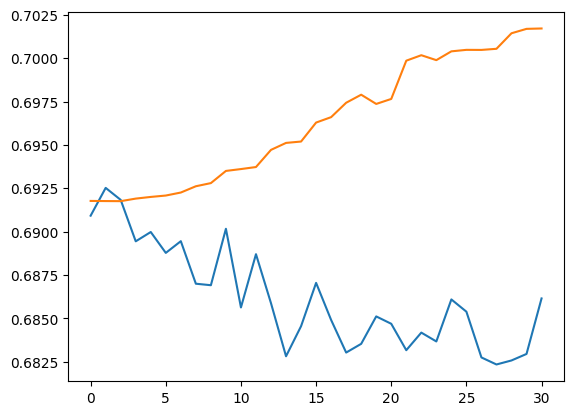

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

model = build_optimized_model(best_lstm_units,best_learning_rate,best_dropout_rate,best_num_lstm_layers)



from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    min_delta=0.001,  # Minimum change to qualify as an improvement
    patience=30,  # How many epochs to wait before stopping
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored metric
)
history = model.fit(
    trainX, trainY,
    epochs=100,  # Set to a large value; early stopping will halt training when improvement stops
    batch_size=16,
    validation_data=(valX, valY),  # Alternatively, use validation_data=(valX, valY)
    callbacks=[early_stopping],  # Include early stopping
    verbose=1
)


plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')



10/10 [==============================] - 1s 3ms/step
Accuracy: 51.90%


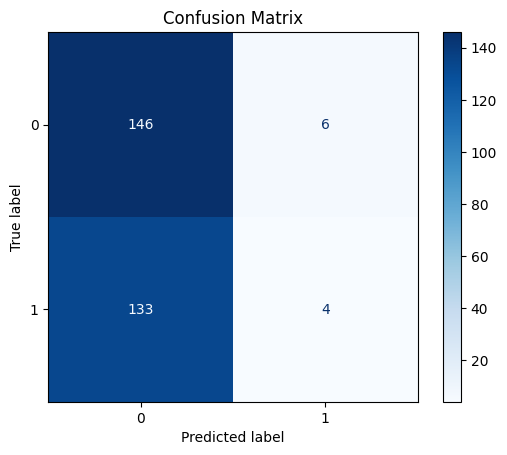

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


target = test_df.iloc[:, 0]  # Target variable
features = test_df.iloc[:, 1:]  # Exclude the target variable from features

# Initialize the StandardScaler and fit it on the features

features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
# Prepare    data for sequence model

testX, testY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    testX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    testY.append(target.iloc[i + n_future - 1])  # Use original target value directly

testX, testY = np.array(testX), np.array(testY)

predictions = model.predict(testX)


binary_predictions = (predictions > 0.5).astype(int)




import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score



# Create a confusion matrix
cm = confusion_matrix(testY, binary_predictions)

# Calculate accuracy
accuracy = accuracy_score(testY, binary_predictions)

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()





Accuracy: 51.90%
Precision: 0.4000
Recall: 0.0292
F1 Score: 0.0544
ROC-AUC: 0.5209


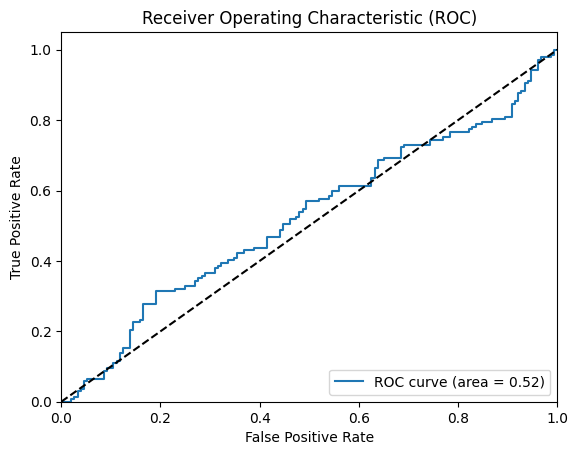

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

precision = precision_score(testY, binary_predictions)
recall = recall_score(testY, binary_predictions)
f1 = f1_score(testY, binary_predictions)
roc_auc = roc_auc_score(testY, predictions)  # Note: for ROC-AUC, we use the raw probabilities, not the binary predictions

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
fpr, tpr, thresholds = roc_curve(testY, predictions)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Optimised GRU

In [ ]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers

space = [
    Integer(32, 128, name='gru_units'),
    Real(10**-5, 10**-1, "log-uniform", name='learning_rate'),
    Real(0.0, 0.5, name='dropout_rate'),
    Integer(1, 3, name='num_gru_layers')  # Adding number of LSTM layers as a tunable parameter
]

@use_named_args(space)
def objective(**params):
    model = Sequential()
    initializer = initializers.GlorotUniform(seed=42)
    # Adding variable number of LSTM layers based on the 'num_lstm_layers' parameter
    for _ in range(params['num_gru_layers']):
        model.add(GRU(units=params['gru_units'], return_sequences=True if _ < params['num_gru_layers'] - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2]), kernel_initializer=initializer))
    model.add(Dropout(params['dropout_rate']))
    model.add(Dense(1, activation='sigmoid'))

    # Using Adam with the specified learning rate
    optimizer = Adam(learning_rate=params['learning_rate'])

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(
        trainX, trainY,
        epochs=20,
        batch_size=16,
        validation_data=(valX, valY),
        verbose=1)


    validation_loss = history.history['val_loss'][-1]
    return validation_loss


In [ ]:
from tensorflow.keras.optimizers import Adam
from skopt import gp_minimize

res_gp = gp_minimize(objective, space, n_calls=20, random_state=42)

print("Best score=%.4f" % res_gp.fun)
print("""Best parameters:
- gru_units=%d
- learning_rate=%.6f
- dropout_rate=%.6f
- num_gru_layers=%d""" % (res_gp.x[0], res_gp.x[1], res_gp.x[2], res_gp.x[3]))


Epoch 1/20
66/66 [==============================] - 4s 17ms/step - loss: 0.6934 - accuracy: 0.5235 - val_loss: 0.6898 - val_accuracy: 0.5662
Epoch 2/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6895 - accuracy: 0.5399 - val_loss: 0.6917 - val_accuracy: 0.4706
Epoch 3/20
66/66 [==============================] - 0s 7ms/step - loss: 0.6927 - accuracy: 0.5485 - val_loss: 0.6948 - val_accuracy: 0.4926
Epoch 4/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6878 - accuracy: 0.5437 - val_loss: 0.6993 - val_accuracy: 0.4926
Epoch 5/20
66/66 [==============================] - 0s 7ms/step - loss: 0.6903 - accuracy: 0.5524 - val_loss: 0.6974 - val_accuracy: 0.4926
Epoch 6/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6875 - accuracy: 0.5706 - val_loss: 0.6996 - val_accuracy: 0.4926
Epoch 7/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6846 - accuracy: 0.5716 - val_loss: 0.7026 - val_accuracy: 0.4926
Epoch 8/20
66/66 [=

In [ ]:
best_gru_units = res_gp.x[0]
best_learning_rate = res_gp.x[1]
best_dropout_rate = res_gp.x[2]
best_num_gru_layers = res_gp.x[3]  # Number of LSTM layers is now a tunable parameter

# Build the model with these parameters
def build_optimized_model(lstm_units, learning_rate, dropout_rate, num_lstm_layers):
    model = Sequential()
    # Adding LSTM layers based on the optimized number of layers
    for i in range(num_lstm_layers):
        model.add(GRU(units=lstm_units, return_sequences=True if i < num_lstm_layers - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with Adam optimizer
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


Epoch 1/100
66/66 [==============================] - 3s 12ms/step - loss: 0.7071 - accuracy: 0.5168 - val_loss: 0.7142 - val_accuracy: 0.5074
Epoch 2/100
66/66 [==============================] - 0s 5ms/step - loss: 0.7046 - accuracy: 0.5351 - val_loss: 0.7092 - val_accuracy: 0.5074
Epoch 3/100
66/66 [==============================] - 0s 5ms/step - loss: 0.7038 - accuracy: 0.5187 - val_loss: 0.7065 - val_accuracy: 0.5074
Epoch 4/100
66/66 [==============================] - 0s 5ms/step - loss: 0.7039 - accuracy: 0.5207 - val_loss: 0.7009 - val_accuracy: 0.5074
Epoch 5/100
66/66 [==============================] - 0s 5ms/step - loss: 0.6971 - accuracy: 0.5264 - val_loss: 0.6987 - val_accuracy: 0.5074
Epoch 6/100
66/66 [==============================] - 0s 5ms/step - loss: 0.7053 - accuracy: 0.5139 - val_loss: 0.6965 - val_accuracy: 0.5074
Epoch 7/100
66/66 [==============================] - 0s 5ms/step - loss: 0.7099 - accuracy: 0.5120 - val_loss: 0.6950 - val_accuracy: 0.5074
Epoch 8/100


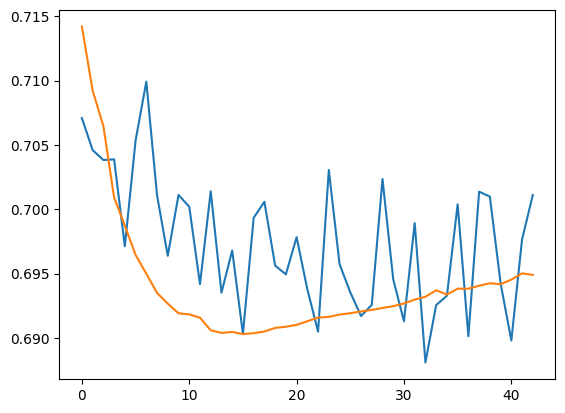

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

model = build_optimized_model(best_gru_units,best_learning_rate,best_dropout_rate,best_num_gru_layers)



from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    min_delta=0.001,  # Minimum change to qualify as an improvement
    patience=30,  # How many epochs to wait before stopping
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored metric
)
history = model.fit(
    trainX, trainY,
    epochs=100,  # Set to a large value; early stopping will halt training when improvement stops
    batch_size=16,
    validation_data=(valX, valY),  # Alternatively, use validation_data=(valX, valY)
    callbacks=[early_stopping],  # Include early stopping
    verbose=1
)


plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')



10/10 [==============================] - 0s 2ms/step
Accuracy: 48.79%


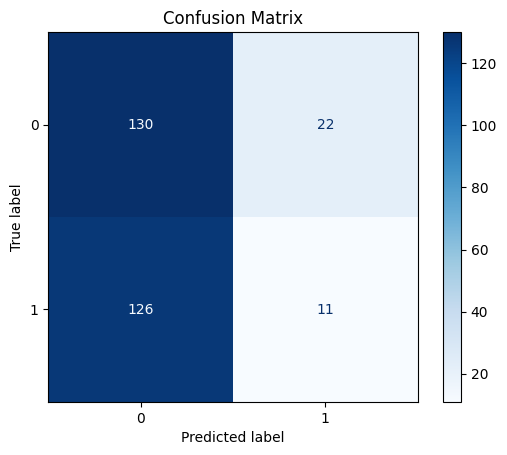

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


target = test_df.iloc[:, 0]  # Target variable
features = test_df.iloc[:, 1:]  # Exclude the target variable from features

# Initialize the StandardScaler and fit it on the features

features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
# Prepare    data for sequence model

testX, testY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    testX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    testY.append(target.iloc[i + n_future - 1])  # Use original target value directly

testX, testY = np.array(testX), np.array(testY)

predictions = model.predict(testX)


binary_predictions = (predictions > 0.5).astype(int)




import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score



# Create a confusion matrix
cm = confusion_matrix(testY, binary_predictions)

# Calculate accuracy
accuracy = accuracy_score(testY, binary_predictions)

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()





Accuracy: 48.79%
Precision: 0.3333
Recall: 0.0803
F1 Score: 0.1294
ROC-AUC: 0.4971


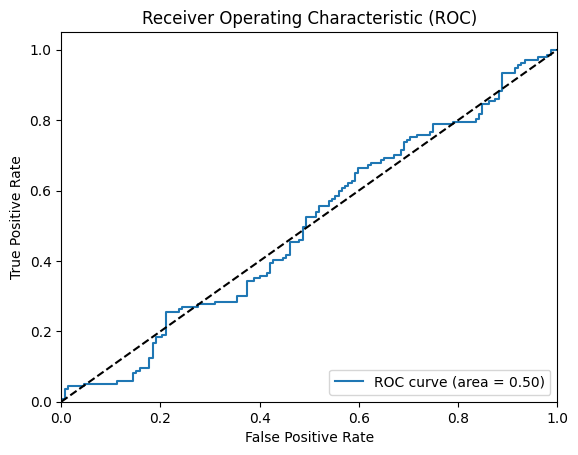

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

precision = precision_score(testY, binary_predictions)
recall = recall_score(testY, binary_predictions)
f1 = f1_score(testY, binary_predictions)
roc_auc = roc_auc_score(testY, predictions)  # Note: for ROC-AUC, we use the raw probabilities, not the binary predictions

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
fpr, tpr, thresholds = roc_curve(testY, predictions)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## Twitter Data

### Mean Scores

#### Price & Sentiment

In [ ]:
tweets_meanBERT=pd.read_csv('drive/MyDrive/dailyBERTtweets_mean')

In [ ]:
tweets_meanBERT['Date']=pd.to_datetime(tweets_meanBERT['Date'], errors='coerce')

In [ ]:

indicators_df.index = pd.to_datetime(indicators_df.index)
tweets_meanBERT.set_index('Date', inplace=True)

combined_df = indicators_df.merge(tweets_meanBERT, left_index=True, right_index=True, how='outer')

# Initial fill for sentiment data where financial data is available but sentiment data is not
combined_df.loc[combined_df['direction'].notna(), ['Negative', 'Neutral', 'Positive']] = combined_df.loc[combined_df['direction'].notna(), ['Negative', 'Neutral', 'Positive']].fillna({'Negative': 0, 'Neutral': 1, 'Positive': 0})

# Identify missing dates in indicators_df
missing_dates = pd.date_range(start=combined_df.index.min(), end=combined_df.index.max()).difference(combined_df.index)

# Handling missing dates in the financial data
for date in missing_dates:
    next_date = date + pd.Timedelta(days=1)
    if next_date in combined_df.index:
        # Finding the range of missing dates leading up to next_date
        range_start = date
        while (range_start - pd.Timedelta(days=1)) in missing_dates:
            range_start -= pd.Timedelta(days=1)

        # Check if range_start is before the start of the combined_df index to avoid looking outside the DataFrame
        if range_start < combined_df.index.min():
            continue

        # Calculate mean sentiments for the missing period and assign to next_date
        mean_sentiments = combined_df.loc[range_start:date, ['Negative', 'Neutral', 'Positive']].mean()
        combined_df.loc[next_date, ['Negative', 'Neutral', 'Positive']] = mean_sentiments

# Now, remove rows with missing financial data (where 'direction' is NaN)
combined_df.dropna(subset=['direction'], inplace=True)

# Finally, ensure that any remaining NaN values in the sentiment columns are filled as specified
combined_df[['Negative', 'Neutral', 'Positive']] = combined_df[['Negative', 'Neutral', 'Positive']].fillna({'Negative': 0, 'Neutral': 1, 'Positive': 0})

# Ensuring all modifications did not introduce any inadvertent changes to the 'direction' or other financial columns
combined_df['direction'] = indicators_df['direction']

print(combined_df.head())

            direction         sma5         Open        Close        sma10  \
Date                                                                        
2017-07-12          1  2426.227979  2435.750000  2443.250000  2427.648975   
2017-07-13          1  2433.843994  2444.989990  2447.830078  2428.362988   
2017-07-14          1  2440.662012  2449.159912  2459.270020  2432.319995   
2017-07-17          0  2447.004004  2459.500000  2459.139893  2435.892993   
2017-07-18          1  2454.020020  2455.879883  2460.610107  2439.053003   

                  ema12      rdp5     rdp10        atr      rsi14        mom  \
Date                                                                           
2017-07-12  2430.524229  0.440279  0.986621  17.556568  56.958484  17.719971   
2017-07-13  2433.186668  1.580250  0.292546  16.499849  59.121704   4.580078   
2017-07-14  2437.199491  1.405673  1.635330  16.535873  63.989950  11.439941   
2017-07-17  2440.574937  1.306318  1.474368  15.451358  63.8

In [ ]:
combined_df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
nan_counts_per_column = combined_df.isna().sum()
print(nan_counts_per_column)

direction    0
sma5         0
Open         0
Close        0
sma10        0
ema12        0
rdp5         0
rdp10        0
atr          0
rsi14        0
mom          0
Negative     0
Neutral      0
Positive     0
dtype: int64


In [ ]:
train_split = 0.7   # 70% of the data for training
val_split = 0.1    # 10% of the data for validation

# Calculate split indices
split_index_train = int(len(combined_df) * train_split)
split_index_val = split_index_train + int(len(combined_df) * val_split)

# Split the data
train_df = combined_df.iloc[:split_index_train]
val_df = combined_df.iloc[split_index_train:split_index_val]
test_df = combined_df.iloc[split_index_val:]


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


target = train_df.iloc[:, 0]  # Target variable
features = train_df.iloc[:, 1:]  # Exclude the target variable from features

scaler = StandardScaler()
scaler = scaler.fit(features)
features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
print(full_features)
# Prepare    data for sequence model
n_past = 3
n_future = 1
trainX, trainY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    trainX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    trainY.append(target.iloc[i + n_future - 1])  # Use original target value directly

trainX, trainY = np.array(trainX), np.array(trainY)




            direction      sma5      Open     Close     sma10     ema12  \
Date                                                                      
2017-07-12          1 -1.243226 -1.226730 -1.212351 -1.240572 -1.238092   
2017-07-13          1 -1.229383 -1.210007 -1.204074 -1.239265 -1.233193   
2017-07-14          1 -1.216991 -1.202460 -1.183399 -1.232022 -1.225810   
2017-07-17          0 -1.205464 -1.183747 -1.183634 -1.225482 -1.219599   
2017-07-18          1 -1.192712 -1.190298 -1.180977 -1.219697 -1.213928   
...               ...       ...       ...       ...       ...       ...   
2021-09-13          1  2.509541  2.463587  2.448172  2.571612  2.556329   
2021-09-14          0  2.481557  2.471767  2.401762  2.555917  2.542263   
2021-09-15          1  2.469427  2.414143  2.469805  2.548233  2.541019   
2021-09-16          0  2.462327  2.467713  2.457245  2.539018  2.537999   
2021-09-17          0  2.453025  2.454411  2.383582  2.519989  2.523906   

                rdp5    

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


target = val_df.iloc[:, 0]  # Target variable
features = val_df.iloc[:, 1:]  # Exclude the target variable from features


features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
print(full_features)
# Prepare    data for sequence model
n_past = 3
n_future = 1
valX, valY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    valX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    valY.append(target.iloc[i + n_future - 1])  # Use original target value directly

valX, valY = np.array(valX), np.array(valY)

            direction      sma5      Open     Close     sma10     ema12  \
Date                                                                      
2021-09-20          0  2.412675  2.333534  2.247569  2.487461  2.490677   
2021-09-21          0  2.380373  2.281954  2.241171  2.457104  2.461557   
2021-09-22          1  2.349452  2.269249  2.316082  2.435426  2.448652   
2021-09-23          1  2.340448  2.340411  2.412479  2.427317  2.452830   
2021-09-24          1  2.348624  2.397040  2.424226  2.426750  2.458206   
...               ...       ...       ...       ...       ...       ...   
2022-04-18          0  2.359104  2.302187  2.308943  2.482947  2.479257   
2022-04-19          1  2.377163  2.311236  2.436389  2.460903  2.482472   
2022-04-20          0  2.399701  2.458971  2.431402  2.448882  2.484412   
2022-04-21          0  2.380460  2.489575  2.312503  2.432867  2.467429   
2022-04-22          0  2.336544  2.302550  2.092237  2.391053  2.418558   

                rdp5    

##### LSTM

In [ ]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers

space = [
    Integer(32, 128, name='lstm_units'),
    Real(10**-5, 10**-1, "log-uniform", name='learning_rate'),
    Real(0.0, 0.5, name='dropout_rate'),
    Integer(1, 3, name='num_lstm_layers')  # Adding number of LSTM layers as a tunable parameter
]

@use_named_args(space)
def objective(**params):
    model = Sequential()
    initializer = initializers.GlorotUniform(seed=42)
    # Adding variable number of LSTM layers based on the 'num_lstm_layers' parameter
    for _ in range(params['num_lstm_layers']):
        model.add(LSTM(units=params['lstm_units'], return_sequences=True if _ < params['num_lstm_layers'] - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2]), kernel_initializer=initializer))
    model.add(Dropout(params['dropout_rate']))
    model.add(Dense(1, activation='sigmoid'))

    # Using Adam with the specified learning rate
    optimizer = Adam(learning_rate=params['learning_rate'])

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(
        trainX, trainY,
        epochs=20,
        batch_size=16,
        validation_data=(valX, valY),
        verbose=1)


    validation_loss = history.history['val_loss'][-1]
    return validation_loss


In [ ]:
from tensorflow.keras.optimizers import Adam
from skopt import gp_minimize

res_gp = gp_minimize(objective, space, n_calls=20, random_state=42)

print("Best score=%.4f" % res_gp.fun)
print("""Best parameters:
- lstm_units=%d
- learning_rate=%.6f
- dropout_rate=%.6f
- num_lstm_layers=%d""" % (res_gp.x[0], res_gp.x[1], res_gp.x[2], res_gp.x[3]))


Epoch 1/20
66/66 [==============================] - 4s 16ms/step - loss: 0.6930 - accuracy: 0.5133 - val_loss: 0.6935 - val_accuracy: 0.4966
Epoch 2/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6919 - accuracy: 0.5247 - val_loss: 0.6930 - val_accuracy: 0.4966
Epoch 3/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6909 - accuracy: 0.5266 - val_loss: 0.6928 - val_accuracy: 0.5102
Epoch 4/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6894 - accuracy: 0.5485 - val_loss: 0.6929 - val_accuracy: 0.5238
Epoch 5/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6888 - accuracy: 0.5504 - val_loss: 0.6932 - val_accuracy: 0.5034
Epoch 6/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6886 - accuracy: 0.5485 - val_loss: 0.6936 - val_accuracy: 0.5034
Epoch 7/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6880 - accuracy: 0.5475 - val_loss: 0.6936 - val_accuracy: 0.5034
Epoch 8/20
66/66 [=

In [ ]:
best_lstm_units = res_gp.x[0]
best_learning_rate = res_gp.x[1]
best_dropout_rate = res_gp.x[2]
best_num_lstm_layers = res_gp.x[3]  # Number of LSTM layers is now a tunable parameter

# Build the model with these parameters
def build_optimized_model(lstm_units, learning_rate, dropout_rate, num_lstm_layers):
    model = Sequential()
    # Adding LSTM layers based on the optimized number of layers
    for i in range(num_lstm_layers):
        model.add(LSTM(units=lstm_units, return_sequences=True if i < num_lstm_layers - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with Adam optimizer
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

optimized_model = build_optimized_model(best_lstm_units,best_learning_rate,best_dropout_rate,best_num_lstm_layers)
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=30,
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored metric
)
history = optimized_model.fit(
    trainX, trainY,
    epochs=100,
    batch_size=16,
    validation_data=(valX, valY),
    callbacks=[early_stopping],  # Include early stopping
    verbose=1
)




Epoch 1/100
66/66 [==============================] - 5s 43ms/step - loss: 0.7005 - accuracy: 0.4772 - val_loss: 0.7024 - val_accuracy: 0.5034
Epoch 2/100
66/66 [==============================] - 0s 4ms/step - loss: 0.7033 - accuracy: 0.4506 - val_loss: 0.7024 - val_accuracy: 0.5034
Epoch 3/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6986 - accuracy: 0.4933 - val_loss: 0.7024 - val_accuracy: 0.4966
Epoch 4/100
66/66 [==============================] - 0s 4ms/step - loss: 0.7033 - accuracy: 0.4610 - val_loss: 0.7025 - val_accuracy: 0.4966
Epoch 5/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6960 - accuracy: 0.5124 - val_loss: 0.7026 - val_accuracy: 0.4966
Epoch 6/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6978 - accuracy: 0.4781 - val_loss: 0.7027 - val_accuracy: 0.4966
Epoch 7/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.5114 - val_loss: 0.7025 - val_accuracy: 0.4966
Epoch 8/100


10/10 [==============================] - 0s 2ms/step
Accuracy: 49.00%


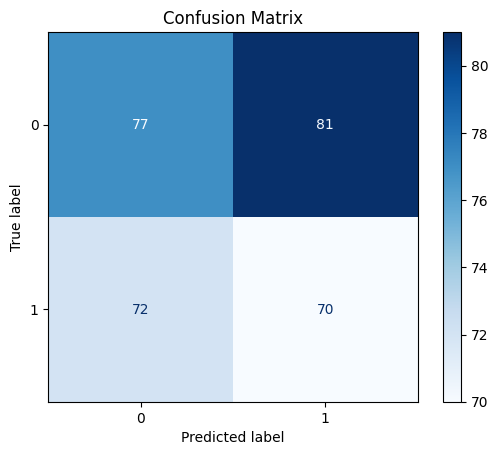

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


target = test_df.iloc[:, 0]  # Target variable
features = test_df.iloc[:, 1:]  # Exclude the target variable from features

# Initialize the StandardScaler and fit it on the features

features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
# Prepare    data for sequence model

testX, testY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    testX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    testY.append(target.iloc[i + n_future - 1])  # Use original target value directly

testX, testY = np.array(testX), np.array(testY)

predictions = optimized_model.predict(testX)


binary_predictions = (predictions > 0.5).astype(int)




import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score



# Create a confusion matrix
cm = confusion_matrix(testY, binary_predictions)

# Calculate accuracy
accuracy = accuracy_score(testY, binary_predictions)

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()





Accuracy: 49.00%
Precision: 0.4636
Recall: 0.4930
F1 Score: 0.4778
ROC-AUC: 0.5046


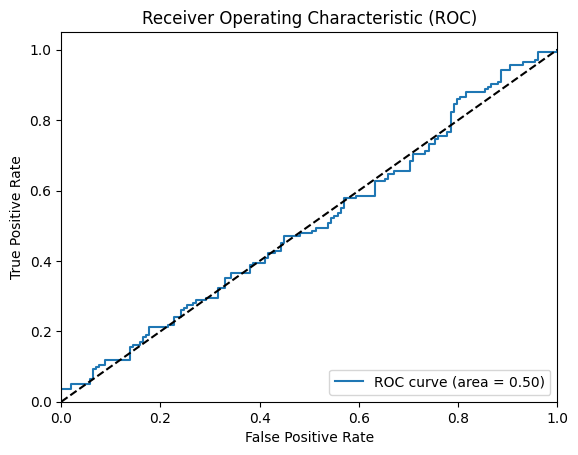

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

precision = precision_score(testY, binary_predictions)
recall = recall_score(testY, binary_predictions)
f1 = f1_score(testY, binary_predictions)
roc_auc = roc_auc_score(testY, predictions)  # Note: for ROC-AUC, we use the raw probabilities, not the binary predictions

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
fpr, tpr, thresholds = roc_curve(testY, predictions)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

##### GRU

In [ ]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers

space = [
    Integer(32, 128, name='gru_units'),
    Real(10**-5, 10**-1, "log-uniform", name='learning_rate'),
    Real(0.0, 0.5, name='dropout_rate'),
    Integer(1, 3, name='num_gru_layers')  # Adding number of LSTM layers as a tunable parameter
]

@use_named_args(space)
def objective(**params):
    model = Sequential()
    initializer = initializers.GlorotUniform(seed=42)
    # Adding variable number of LSTM layers based on the 'num_lstm_layers' parameter
    for _ in range(params['num_gru_layers']):
        model.add(GRU(units=params['gru_units'], return_sequences=True if _ < params['num_gru_layers'] - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2]), kernel_initializer=initializer))
    model.add(Dropout(params['dropout_rate']))
    model.add(Dense(1, activation='sigmoid'))

    # Using Adam with the specified learning rate
    optimizer = Adam(learning_rate=params['learning_rate'])

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(
        trainX, trainY,
        epochs=20,
        batch_size=16,
        validation_data=(valX, valY),
        verbose=1)


    validation_loss = history.history['val_loss'][-1]
    return validation_loss

from tensorflow.keras.optimizers import Adam
from skopt import gp_minimize

res_gp = gp_minimize(objective, space, n_calls=20, random_state=42)

print("Best score=%.4f" % res_gp.fun)
print("""Best parameters:
- gru_units=%d
- learning_rate=%.6f
- dropout_rate=%.6f
- num_gru_layers=%d""" % (res_gp.x[0], res_gp.x[1], res_gp.x[2], res_gp.x[3]))
best_gru_units = res_gp.x[0]
best_learning_rate = res_gp.x[1]
best_dropout_rate = res_gp.x[2]
best_num_gru_layers = res_gp.x[3]  # Number of LSTM layers is now a tunable parameter

# Build the model with these parameters
def build_optimized_model(lstm_units, learning_rate, dropout_rate, num_lstm_layers):
    model = Sequential()
    # Adding LSTM layers based on the optimized number of layers
    for i in range(num_lstm_layers):
        model.add(GRU(units=lstm_units, return_sequences=True if i < num_lstm_layers - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with Adam optimizer
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model




Epoch 1/20
66/66 [==============================] - 4s 16ms/step - loss: 0.6958 - accuracy: 0.4990 - val_loss: 0.6953 - val_accuracy: 0.4694
Epoch 2/20
66/66 [==============================] - 0s 5ms/step - loss: 0.6957 - accuracy: 0.5019 - val_loss: 0.6944 - val_accuracy: 0.5170
Epoch 3/20
66/66 [==============================] - 0s 5ms/step - loss: 0.6921 - accuracy: 0.5380 - val_loss: 0.6932 - val_accuracy: 0.4898
Epoch 4/20
66/66 [==============================] - 0s 5ms/step - loss: 0.6889 - accuracy: 0.5627 - val_loss: 0.6931 - val_accuracy: 0.5102
Epoch 5/20
66/66 [==============================] - 0s 5ms/step - loss: 0.6871 - accuracy: 0.5561 - val_loss: 0.6935 - val_accuracy: 0.5238
Epoch 6/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6844 - accuracy: 0.5570 - val_loss: 0.6930 - val_accuracy: 0.5238
Epoch 7/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6863 - accuracy: 0.5580 - val_loss: 0.6916 - val_accuracy: 0.5102
Epoch 8/20
66/66 [=

Epoch 1/100
66/66 [==============================] - 2s 10ms/step - loss: 0.7353 - accuracy: 0.4848 - val_loss: 0.7422 - val_accuracy: 0.5034
Epoch 2/100
66/66 [==============================] - 0s 4ms/step - loss: 0.7084 - accuracy: 0.4971 - val_loss: 0.7034 - val_accuracy: 0.5034
Epoch 3/100
66/66 [==============================] - 0s 5ms/step - loss: 0.7080 - accuracy: 0.5114 - val_loss: 0.6886 - val_accuracy: 0.5714
Epoch 4/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6894 - accuracy: 0.5523 - val_loss: 0.6862 - val_accuracy: 0.5578
Epoch 5/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.5570 - val_loss: 0.6861 - val_accuracy: 0.5578
Epoch 6/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6908 - accuracy: 0.5580 - val_loss: 0.6895 - val_accuracy: 0.5510
Epoch 7/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.5437 - val_loss: 0.6880 - val_accuracy: 0.5238
Epoch 8/100


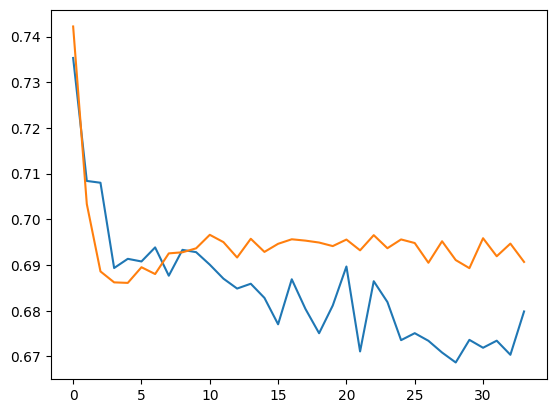

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

model = build_optimized_model(best_gru_units,best_learning_rate,best_dropout_rate,best_num_gru_layers)



from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    min_delta=0.001,  # Minimum change to qualify as an improvement
    patience=30,  # How many epochs to wait before stopping
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored metric
)
history = model.fit(
    trainX, trainY,
    epochs=100,  # Set to a large value; early stopping will halt training when improvement stops
    batch_size=16,
    validation_data=(valX, valY),  # Alternatively, use validation_data=(valX, valY)
    callbacks=[early_stopping],  # Include early stopping
    verbose=1
)


plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')



10/10 [==============================] - 0s 2ms/step
Accuracy: 50.33%


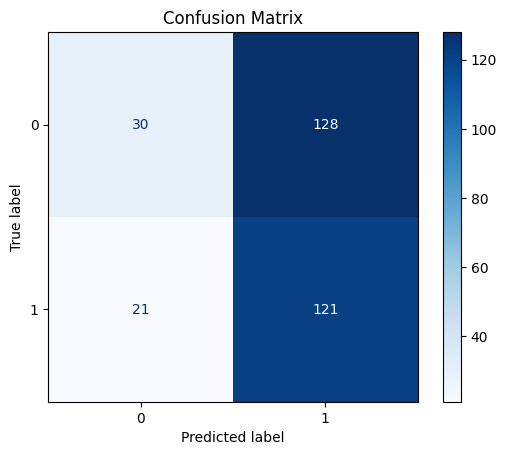

Accuracy: 50.33%
Precision: 0.4859
Recall: 0.8521
F1 Score: 0.6189
ROC-AUC: 0.5514


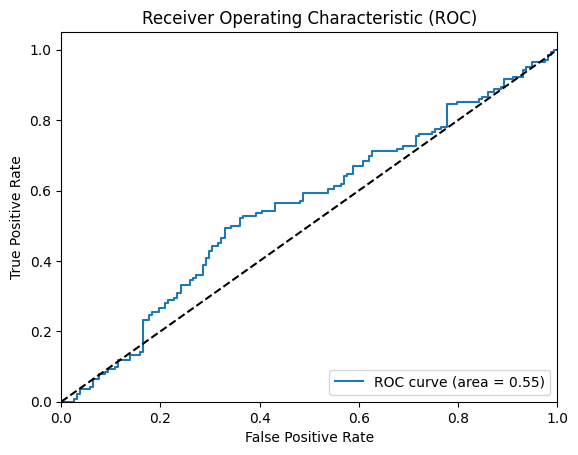

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


target = test_df.iloc[:, 0]  # Target variable
features = test_df.iloc[:, 1:]  # Exclude the target variable from features

# Initialize the StandardScaler and fit it on the features

features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
# Prepare    data for sequence model

testX, testY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    testX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    testY.append(target.iloc[i + n_future - 1])  # Use original target value directly

testX, testY = np.array(testX), np.array(testY)

predictions = model.predict(testX)


binary_predictions = (predictions > 0.5).astype(int)




import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score



# Create a confusion matrix
cm = confusion_matrix(testY, binary_predictions)

# Calculate accuracy
accuracy = accuracy_score(testY, binary_predictions)

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

precision = precision_score(testY, binary_predictions)
recall = recall_score(testY, binary_predictions)
f1 = f1_score(testY, binary_predictions)
roc_auc = roc_auc_score(testY, predictions)  # Note: for ROC-AUC, we use the raw probabilities, not the binary predictions

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
fpr, tpr, thresholds = roc_curve(testY, predictions)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()





#### Sentiment Only

In [ ]:
# List of columns to keep
columns_to_keep = ['direction', 'Neutral', 'Positive', 'Negative']

# Drop columns except the ones in the list
combined_df = combined_df[columns_to_keep]


In [ ]:
train_split = 0.7   # 70% of the data for training
val_split = 0.1    # 10% of the data for validation

# Calculate split indices
split_index_train = int(len(combined_df) * train_split)
split_index_val = split_index_train + int(len(combined_df) * val_split)

# Split the data
train_df = combined_df.iloc[:split_index_train]
val_df = combined_df.iloc[split_index_train:split_index_val]
test_df = combined_df.iloc[split_index_val:]

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


target = train_df.iloc[:, 0]  # Target variable
features = train_df.iloc[:, 1:]  # Exclude the target variable from features

scaler = StandardScaler()
scaler = scaler.fit(features)
features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
print(full_features)
# Prepare    data for sequence model
n_past = 3
n_future = 1
trainX, trainY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    trainX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    trainY.append(target.iloc[i + n_future - 1])  # Use original target value directly

trainX, trainY = np.array(trainX), np.array(trainY)

# Now, trainX includes the target variable without scaling, and trainY contains the original unscaled target values

            direction   Neutral  Positive  Negative
Date                                               
2017-07-12          1  1.815454 -1.453418 -1.034909
2017-07-13          1  0.984913 -1.307022  0.274781
2017-07-14          1  0.646241 -0.611995 -0.215786
2017-07-17          0  1.223725 -1.177775 -0.378134
2017-07-18          1  0.991954 -1.460640  0.509423
...               ...       ...       ...       ...
2021-09-13          1 -1.593605  0.835863  1.617966
2021-09-14          0 -1.200494  0.730406  1.056387
2021-09-15          1 -1.232883  0.668176  1.217030
2021-09-16          0 -2.004526  1.010851  2.100556
2021-09-17          0  0.241973 -0.478884  0.321959

[1055 rows x 4 columns]


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


target = val_df.iloc[:, 0]  # Target variable
features = val_df.iloc[:, 1:]  # Exclude the target variable from features


features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
print(full_features)
# Prepare    data for sequence model
n_past = 3
n_future = 1
valX, valY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    valX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    valY.append(target.iloc[i + n_future - 1])  # Use original target value directly

valX, valY = np.array(valX), np.array(valY)

            direction   Neutral  Positive  Negative
Date                                               
2021-09-20          0 -1.033956  0.351465  1.357562
2021-09-21          0 -1.238439  0.311089  1.803260
2021-09-22          1 -0.131107 -0.273558  0.685193
2021-09-23          1 -0.716756  0.660869  0.268206
2021-09-24          1 -0.260850  0.524137 -0.359807
...               ...       ...       ...       ...
2022-04-18          0 -1.057561  0.972998  0.399124
2022-04-19          1 -2.477858  2.053488  1.300011
2022-04-20          0 -1.686838  0.987592  1.546788
2022-04-21          0 -1.682562  1.398982  0.875366
2022-04-22          0 -0.726869  1.092716 -0.409429

[150 rows x 4 columns]


##### LSTM

In [ ]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers

space = [
    Integer(32, 128, name='lstm_units'),
    Real(10**-5, 10**-1, "log-uniform", name='learning_rate'),
    Real(0.0, 0.5, name='dropout_rate'),
    Integer(1, 3, name='num_lstm_layers')  # Adding number of LSTM layers as a tunable parameter
]

@use_named_args(space)
def objective(**params):
    model = Sequential()
    initializer = initializers.GlorotUniform(seed=42)
    # Adding variable number of LSTM layers based on the 'num_lstm_layers' parameter
    for _ in range(params['num_lstm_layers']):
        model.add(LSTM(units=params['lstm_units'], return_sequences=True if _ < params['num_lstm_layers'] - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2]), kernel_initializer=initializer))
    model.add(Dropout(params['dropout_rate']))
    model.add(Dense(1, activation='sigmoid'))

    # Using Adam with the specified learning rate
    optimizer = Adam(learning_rate=params['learning_rate'])

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(
        trainX, trainY,
        epochs=20,
        batch_size=16,
        validation_data=(valX, valY),
        verbose=1)


    validation_loss = history.history['val_loss'][-1]
    return validation_loss


In [ ]:
from tensorflow.keras.optimizers import Adam
from skopt import gp_minimize

res_gp = gp_minimize(objective, space, n_calls=20, random_state=42)

print("Best score=%.4f" % res_gp.fun)
print("""Best parameters:
- lstm_units=%d
- learning_rate=%.6f
- dropout_rate=%.6f
- num_lstm_layers=%d""" % (res_gp.x[0], res_gp.x[1], res_gp.x[2], res_gp.x[3]))


Epoch 1/20
66/66 [==============================] - 4s 18ms/step - loss: 0.6924 - accuracy: 0.5409 - val_loss: 0.6929 - val_accuracy: 0.4762
Epoch 2/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6911 - accuracy: 0.5618 - val_loss: 0.6925 - val_accuracy: 0.4422
Epoch 3/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6901 - accuracy: 0.5589 - val_loss: 0.6923 - val_accuracy: 0.4558
Epoch 4/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6889 - accuracy: 0.5637 - val_loss: 0.6920 - val_accuracy: 0.4626
Epoch 5/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6884 - accuracy: 0.5646 - val_loss: 0.6920 - val_accuracy: 0.5034
Epoch 6/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6870 - accuracy: 0.5646 - val_loss: 0.6922 - val_accuracy: 0.5034
Epoch 7/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6879 - accuracy: 0.5646 - val_loss: 0.6916 - val_accuracy: 0.4966
Epoch 8/20
66/66 [=

In [ ]:

# Example: Best parameters from the optimization
best_lstm_units = res_gp.x[0]
best_learning_rate = res_gp.x[1]
best_dropout_rate = res_gp.x[2]
best_num_lstm_layers = res_gp.x[3]


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

optimized_model = build_optimized_model(best_lstm_units,best_learning_rate,best_dropout_rate,best_num_lstm_layers)
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    min_delta=0.001,  # Minimum change to qualify as an improvement
    patience=30,  # How many epochs to wait before stopping
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored metric
)
history = optimized_model.fit(
    trainX, trainY,
    epochs=100,  # Set to a large value; early stopping will halt training when improvement stops
    batch_size=16,
    validation_data=(valX, valY),
    callbacks=[early_stopping],  # Include early stopping
    verbose=1
)



Epoch 1/100
66/66 [==============================] - 3s 11ms/step - loss: 0.6848 - accuracy: 0.5580 - val_loss: 0.6718 - val_accuracy: 0.7007
Epoch 2/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6779 - accuracy: 0.5637 - val_loss: 0.6690 - val_accuracy: 0.6667
Epoch 3/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6779 - accuracy: 0.5675 - val_loss: 0.6684 - val_accuracy: 0.6463
Epoch 4/100
66/66 [==============================] - 0s 5ms/step - loss: 0.6779 - accuracy: 0.5760 - val_loss: 0.6674 - val_accuracy: 0.5782
Epoch 5/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6768 - accuracy: 0.5770 - val_loss: 0.6666 - val_accuracy: 0.5646
Epoch 6/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6746 - accuracy: 0.5618 - val_loss: 0.6644 - val_accuracy: 0.5782
Epoch 7/100
66/66 [==============================] - 0s 5ms/step - loss: 0.6729 - accuracy: 0.5618 - val_loss: 0.6604 - val_accuracy: 0.6327
Epoch 8/100


10/10 [==============================] - 0s 2ms/step
Accuracy: 58.33%


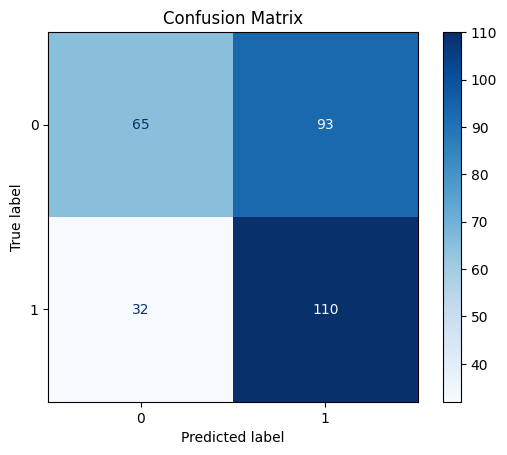

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


target = test_df.iloc[:, 0]  # Target variable
features = test_df.iloc[:, 1:]  # Exclude the target variable from features

# Initialize the StandardScaler and fit it on the features

features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
# Prepare    data for sequence model

testX, testY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    testX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    testY.append(target.iloc[i + n_future - 1])  # Use original target value directly

testX, testY = np.array(testX), np.array(testY)

predictions = optimized_model.predict(testX)


binary_predictions = (predictions > 0.5).astype(int)




import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score



# Create a confusion matrix
cm = confusion_matrix(testY, binary_predictions)

# Calculate accuracy
accuracy = accuracy_score(testY, binary_predictions)

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()




Accuracy: 58.33%
Precision: 0.5419
Recall: 0.7746
F1 Score: 0.6377
ROC-AUC: 0.6424


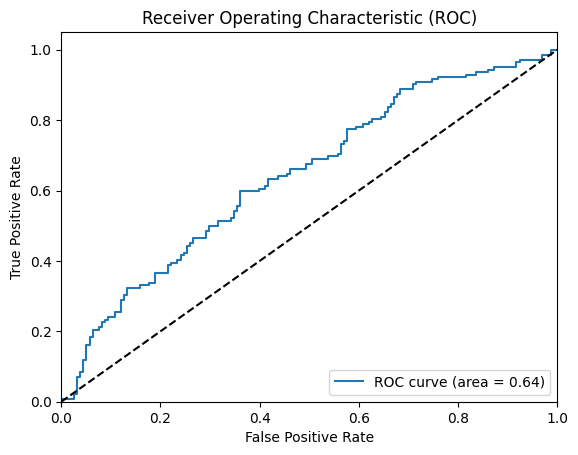

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

precision = precision_score(testY, binary_predictions)
recall = recall_score(testY, binary_predictions)
f1 = f1_score(testY, binary_predictions)
roc_auc = roc_auc_score(testY, predictions)  # Note: for ROC-AUC, we use the raw probabilities, not the binary predictions

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
fpr, tpr, thresholds = roc_curve(testY, predictions)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

##### GRU

In [ ]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers

space = [
    Integer(32, 128, name='gru_units'),
    Real(10**-5, 10**-1, "log-uniform", name='learning_rate'),
    Real(0.0, 0.5, name='dropout_rate'),
    Integer(1, 3, name='num_gru_layers')  # Adding number of LSTM layers as a tunable parameter
]

@use_named_args(space)
def objective(**params):
    model = Sequential()
    initializer = initializers.GlorotUniform(seed=42)
    # Adding variable number of LSTM layers based on the 'num_lstm_layers' parameter
    for _ in range(params['num_gru_layers']):
        model.add(GRU(units=params['gru_units'], return_sequences=True if _ < params['num_gru_layers'] - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2]), kernel_initializer=initializer))
    model.add(Dropout(params['dropout_rate']))
    model.add(Dense(1, activation='sigmoid'))

    # Using Adam with the specified learning rate
    optimizer = Adam(learning_rate=params['learning_rate'])

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(
        trainX, trainY,
        epochs=20,
        batch_size=16,
        validation_data=(valX, valY),
        verbose=1)


    validation_loss = history.history['val_loss'][-1]
    return validation_loss

from tensorflow.keras.optimizers import Adam
from skopt import gp_minimize

res_gp = gp_minimize(objective, space, n_calls=20, random_state=42)

print("Best score=%.4f" % res_gp.fun)
print("""Best parameters:
- gru_units=%d
- learning_rate=%.6f
- dropout_rate=%.6f
- num_gru_layers=%d""" % (res_gp.x[0], res_gp.x[1], res_gp.x[2], res_gp.x[3]))
best_gru_units = res_gp.x[0]
best_learning_rate = res_gp.x[1]
best_dropout_rate = res_gp.x[2]
best_num_gru_layers = res_gp.x[3]  # Number of LSTM layers is now a tunable parameter

# Build the model with these parameters
def build_optimized_model(lstm_units, learning_rate, dropout_rate, num_lstm_layers):
    model = Sequential()
    # Adding LSTM layers based on the optimized number of layers
    for i in range(num_lstm_layers):
        model.add(GRU(units=lstm_units, return_sequences=True if i < num_lstm_layers - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with Adam optimizer
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model




Epoch 1/20
66/66 [==============================] - 4s 16ms/step - loss: 0.6919 - accuracy: 0.5200 - val_loss: 0.6898 - val_accuracy: 0.5782
Epoch 2/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6886 - accuracy: 0.5551 - val_loss: 0.6882 - val_accuracy: 0.6190
Epoch 3/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6881 - accuracy: 0.5684 - val_loss: 0.6874 - val_accuracy: 0.5918
Epoch 4/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6865 - accuracy: 0.5722 - val_loss: 0.6866 - val_accuracy: 0.5306
Epoch 5/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6865 - accuracy: 0.5741 - val_loss: 0.6861 - val_accuracy: 0.5238
Epoch 6/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6845 - accuracy: 0.5675 - val_loss: 0.6864 - val_accuracy: 0.5102
Epoch 7/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6851 - accuracy: 0.5608 - val_loss: 0.6847 - val_accuracy: 0.5510
Epoch 8/20
66/66 [=

Epoch 1/100
66/66 [==============================] - 3s 11ms/step - loss: 0.6961 - accuracy: 0.5048 - val_loss: 0.6825 - val_accuracy: 0.6122
Epoch 2/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6863 - accuracy: 0.5523 - val_loss: 0.6792 - val_accuracy: 0.6054
Epoch 3/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6848 - accuracy: 0.5561 - val_loss: 0.6771 - val_accuracy: 0.6395
Epoch 4/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6801 - accuracy: 0.5713 - val_loss: 0.6756 - val_accuracy: 0.5782
Epoch 5/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6778 - accuracy: 0.5732 - val_loss: 0.6739 - val_accuracy: 0.5578
Epoch 6/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6806 - accuracy: 0.5789 - val_loss: 0.6723 - val_accuracy: 0.5578
Epoch 7/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6771 - accuracy: 0.5646 - val_loss: 0.6686 - val_accuracy: 0.6259
Epoch 8/100


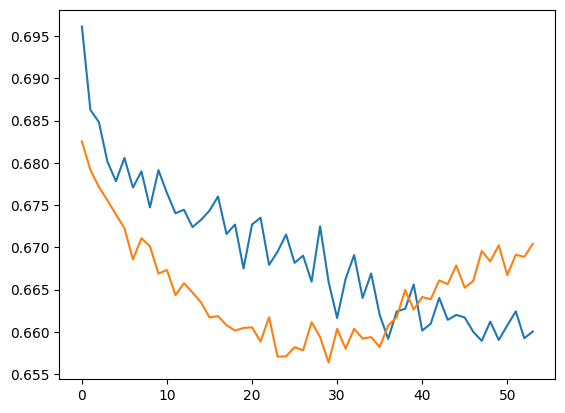

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

model = build_optimized_model(best_gru_units,best_learning_rate,best_dropout_rate,best_num_gru_layers)



from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    min_delta=0.001,  # Minimum change to qualify as an improvement
    patience=30,  # How many epochs to wait before stopping
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored metric
)
history = model.fit(
    trainX, trainY,
    epochs=100,  # Set to a large value; early stopping will halt training when improvement stops
    batch_size=16,
    validation_data=(valX, valY),  # Alternatively, use validation_data=(valX, valY)
    callbacks=[early_stopping],  # Include early stopping
    verbose=1
)


plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')



10/10 [==============================] - 0s 2ms/step
Accuracy: 57.67%


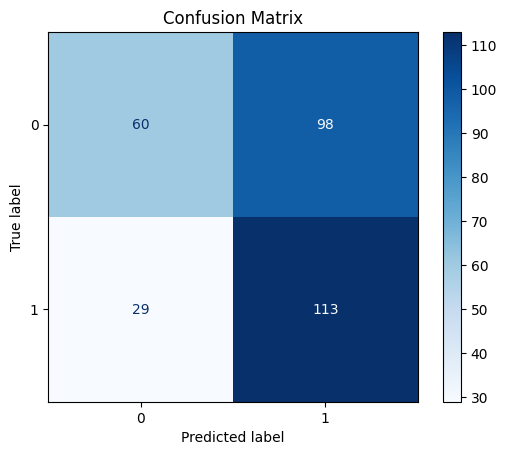

Accuracy: 57.67%
Precision: 0.5355
Recall: 0.7958
F1 Score: 0.6402
ROC-AUC: 0.6382


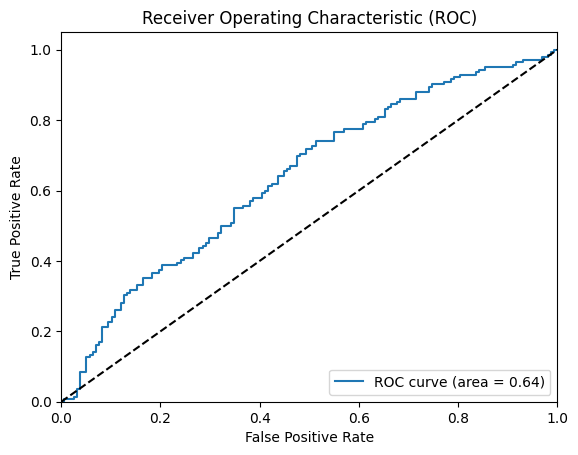

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


target = test_df.iloc[:, 0]  # Target variable
features = test_df.iloc[:, 1:]  # Exclude the target variable from features

# Initialize the StandardScaler and fit it on the features

features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
# Prepare    data for sequence model

testX, testY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    testX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    testY.append(target.iloc[i + n_future - 1])  # Use original target value directly

testX, testY = np.array(testX), np.array(testY)

predictions = model.predict(testX)


binary_predictions = (predictions > 0.5).astype(int)




import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score



# Create a confusion matrix
cm = confusion_matrix(testY, binary_predictions)

# Calculate accuracy
accuracy = accuracy_score(testY, binary_predictions)

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

precision = precision_score(testY, binary_predictions)
recall = recall_score(testY, binary_predictions)
f1 = f1_score(testY, binary_predictions)
roc_auc = roc_auc_score(testY, predictions)  # Note: for ROC-AUC, we use the raw probabilities, not the binary predictions

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
fpr, tpr, thresholds = roc_curve(testY, predictions)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()





### Sentiment Metric

#### Price & Sentiment

In [ ]:
tweets_smBERT=pd.read_csv('drive/MyDrive/agg_tweetsBERT_counts')

In [ ]:
tweets_smBERT['Date']=pd.to_datetime(tweets_smBERT['Date'], errors='coerce')

In [ ]:
tweets_smBERT.head()

Unnamed: 0       Date  SentimentMetric
0           0 2017-06-21         0.015696
1           1 2017-06-22         0.001525
2           2 2017-06-23         0.043775
3           3 2017-06-24        -0.003695
4           4 2017-06-25         0.003185

In [ ]:

indicators_df.index = pd.to_datetime(indicators_df.index)
tweets_smBERT.set_index('Date', inplace=True)

combined_df = indicators_df.merge(tweets_smBERT, left_index=True, right_index=True, how='outer')

# Initial fill for sentiment data where financial data is available but sentiment data is not
combined_df.loc[combined_df['direction'].notna(), ['SentimentMetric']] = combined_df.loc[combined_df['direction'].notna(), ['SentimentMetric']].fillna({'SentimentMetric': 0})

# Identify missing dates in indicators_df
missing_dates = pd.date_range(start=combined_df.index.min(), end=combined_df.index.max()).difference(combined_df.index)

# Handling missing dates in the financial data
for date in missing_dates:
    next_date = date + pd.Timedelta(days=1)
    if next_date in combined_df.index:
        # Finding the range of missing dates leading up to next_date
        range_start = date
        while (range_start - pd.Timedelta(days=1)) in missing_dates:
            range_start -= pd.Timedelta(days=1)

        # Check if range_start is before the start of the combined_df index to avoid looking outside the DataFrame
        if range_start < combined_df.index.min():
            continue

        # Calculate mean sentiments for the missing period and assign to next_date
        mean_sentiments = combined_df.loc[range_start:date, ['SentimentMetric']].mean()
        combined_df.loc[next_date, ['SentimentMetric']] = mean_sentiments

# Now, remove rows with missing financial data (where 'direction' is NaN)
combined_df.dropna(subset=['direction'], inplace=True)

# Finally, ensure that any remaining NaN values in the sentiment columns are filled as specified
combined_df[['SentimentMetric']] = combined_df[['SentimentMetric']].fillna({'SentimentMetric': 0})

# Ensuring all modifications did not introduce any inadvertent changes to the 'direction' or other financial columns
combined_df['direction'] = indicators_df['direction']

print(combined_df.head())

            direction         sma5         Open        Close        sma10  \
Date                                                                        
2017-07-12          1  2426.227979  2435.750000  2443.250000  2427.648975   
2017-07-13          1  2433.843994  2444.989990  2447.830078  2428.362988   
2017-07-14          1  2440.662012  2449.159912  2459.270020  2432.319995   
2017-07-17          0  2447.004004  2459.500000  2459.139893  2435.892993   
2017-07-18          1  2454.020020  2455.879883  2460.610107  2439.053003   

                  ema12      rdp5     rdp10        atr      rsi14        mom  \
Date                                                                           
2017-07-12  2430.524229  0.440279  0.986621  17.556568  56.958484  17.719971   
2017-07-13  2433.186668  1.580250  0.292546  16.499849  59.121704   4.580078   
2017-07-14  2437.199491  1.405673  1.635330  16.535873  63.989950  11.439941   
2017-07-17  2440.574937  1.306318  1.474368  15.451358  63.8

In [ ]:
combined_df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
nan_counts_per_column = combined_df.isna().sum()
print(nan_counts_per_column)

direction          0
sma5               0
Open               0
Close              0
sma10              0
ema12              0
rdp5               0
rdp10              0
atr                0
rsi14              0
mom                0
SentimentMetric    0
dtype: int64


In [ ]:
train_split = 0.7   # 70% of the data for training
val_split = 0.1    # 10% of the data for validation

# Calculate split indices
split_index_train = int(len(combined_df) * train_split)
split_index_val = split_index_train + int(len(combined_df) * val_split)

# Split the data
train_df = combined_df.iloc[:split_index_train]
val_df = combined_df.iloc[split_index_train:split_index_val]
test_df = combined_df.iloc[split_index_val:]


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


target = train_df.iloc[:, 0]  # Target variable
features = train_df.iloc[:, 1:]  # Exclude the target variable from features

scaler = StandardScaler()
scaler = scaler.fit(features)
features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
print(full_features)
# Prepare    data for sequence model
n_past = 3
n_future = 1
trainX, trainY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    trainX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    trainY.append(target.iloc[i + n_future - 1])  # Use original target value directly

trainX, trainY = np.array(trainX), np.array(trainY)

# Now, trainX includes the target variable without scaling, and trainY contains the original unscaled target values


            direction      sma5      Open     Close     sma10     ema12  \
Date                                                                      
2017-07-12          1 -1.243226 -1.226730 -1.212351 -1.240572 -1.238092   
2017-07-13          1 -1.229383 -1.210007 -1.204074 -1.239265 -1.233193   
2017-07-14          1 -1.216991 -1.202460 -1.183399 -1.232022 -1.225810   
2017-07-17          0 -1.205464 -1.183747 -1.183634 -1.225482 -1.219599   
2017-07-18          1 -1.192712 -1.190298 -1.180977 -1.219697 -1.213928   
...               ...       ...       ...       ...       ...       ...   
2021-09-13          1  2.509541  2.463587  2.448172  2.571612  2.556329   
2021-09-14          0  2.481557  2.471767  2.401762  2.555917  2.542263   
2021-09-15          1  2.469427  2.414143  2.469805  2.548233  2.541019   
2021-09-16          0  2.462327  2.467713  2.457245  2.539018  2.537999   
2021-09-17          0  2.453025  2.454411  2.383582  2.519989  2.523906   

                rdp5    

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


target = val_df.iloc[:, 0]  # Target variable
features = val_df.iloc[:, 1:]  # Exclude the target variable from features


features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
print(full_features)
# Prepare    data for sequence model
n_past = 3
n_future = 1
valX, valY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    valX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    valY.append(target.iloc[i + n_future - 1])  # Use original target value directly

valX, valY = np.array(valX), np.array(valY)

            direction      sma5      Open     Close     sma10     ema12  \
Date                                                                      
2021-09-20          0  2.412675  2.333534  2.247569  2.487461  2.490677   
2021-09-21          0  2.380373  2.281954  2.241171  2.457104  2.461557   
2021-09-22          1  2.349452  2.269249  2.316082  2.435426  2.448652   
2021-09-23          1  2.340448  2.340411  2.412479  2.427317  2.452830   
2021-09-24          1  2.348624  2.397040  2.424226  2.426750  2.458206   
...               ...       ...       ...       ...       ...       ...   
2022-04-18          0  2.359104  2.302187  2.308943  2.482947  2.479257   
2022-04-19          1  2.377163  2.311236  2.436389  2.460903  2.482472   
2022-04-20          0  2.399701  2.458971  2.431402  2.448882  2.484412   
2022-04-21          0  2.380460  2.489575  2.312503  2.432867  2.467429   
2022-04-22          0  2.336544  2.302550  2.092237  2.391053  2.418558   

                rdp5    

##### LSTM

In [ ]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers

space = [
    Integer(32, 128, name='lstm_units'),
    Real(10**-5, 10**-1, "log-uniform", name='learning_rate'),
    Real(0.0, 0.5, name='dropout_rate'),
    Integer(1, 3, name='num_lstm_layers')  # Adding number of LSTM layers as a tunable parameter
]

@use_named_args(space)
def objective(**params):
    model = Sequential()
    initializer = initializers.GlorotUniform(seed=42)
    # Adding variable number of LSTM layers based on the 'num_lstm_layers' parameter
    for _ in range(params['num_lstm_layers']):
        model.add(LSTM(units=params['lstm_units'], return_sequences=True if _ < params['num_lstm_layers'] - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2]), kernel_initializer=initializer))
    model.add(Dropout(params['dropout_rate']))
    model.add(Dense(1, activation='sigmoid'))

    # Using Adam with the specified learning rate
    optimizer = Adam(learning_rate=params['learning_rate'])

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(
        trainX, trainY,
        epochs=20,
        batch_size=16,
        validation_data=(valX, valY),
        verbose=1)


    validation_loss = history.history['val_loss'][-1]
    return validation_loss


In [ ]:
from tensorflow.keras.optimizers import Adam
from skopt import gp_minimize

res_gp = gp_minimize(objective, space, n_calls=20, random_state=42)

print("Best score=%.4f" % res_gp.fun)
print("""Best parameters:
- lstm_units=%d
- learning_rate=%.6f
- dropout_rate=%.6f
- num_lstm_layers=%d""" % (res_gp.x[0], res_gp.x[1], res_gp.x[2], res_gp.x[3]))


Epoch 1/20
66/66 [==============================] - 4s 18ms/step - loss: 0.6917 - accuracy: 0.5475 - val_loss: 0.6941 - val_accuracy: 0.4762
Epoch 2/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6907 - accuracy: 0.5627 - val_loss: 0.6940 - val_accuracy: 0.4898
Epoch 3/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6893 - accuracy: 0.5608 - val_loss: 0.6939 - val_accuracy: 0.4966
Epoch 4/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6878 - accuracy: 0.5599 - val_loss: 0.6942 - val_accuracy: 0.5034
Epoch 5/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6876 - accuracy: 0.5665 - val_loss: 0.6948 - val_accuracy: 0.5034
Epoch 6/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6862 - accuracy: 0.5722 - val_loss: 0.6956 - val_accuracy: 0.5034
Epoch 7/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6856 - accuracy: 0.5779 - val_loss: 0.6957 - val_accuracy: 0.5034
Epoch 8/20
66/66 [=

In [ ]:
best_lstm_units = res_gp.x[0]
best_learning_rate = res_gp.x[1]
best_dropout_rate = res_gp.x[2]
best_num_lstm_layers = res_gp.x[3]  # Number of LSTM layers is now a tunable parameter

# Build the model with these parameters
def build_optimized_model(lstm_units, learning_rate, dropout_rate, num_lstm_layers):
    model = Sequential()
    # Adding LSTM layers based on the optimized number of layers
    for i in range(num_lstm_layers):
        model.add(LSTM(units=lstm_units, return_sequences=True if i < num_lstm_layers - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with Adam optimizer
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

optimized_model = build_optimized_model(best_lstm_units,best_learning_rate,best_dropout_rate,best_num_lstm_layers)
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=30,
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored metric
)
history = optimized_model.fit(
    trainX, trainY,
    epochs=100,
    batch_size=16,
    validation_data=(valX, valY),
    callbacks=[early_stopping],  # Include early stopping
    verbose=1
)


Epoch 1/100
66/66 [==============================] - 3s 12ms/step - loss: 0.7038 - accuracy: 0.4914 - val_loss: 0.7045 - val_accuracy: 0.5034
Epoch 2/100
66/66 [==============================] - 0s 5ms/step - loss: 0.7086 - accuracy: 0.4639 - val_loss: 0.7044 - val_accuracy: 0.5034
Epoch 3/100
66/66 [==============================] - 0s 5ms/step - loss: 0.7039 - accuracy: 0.4810 - val_loss: 0.7043 - val_accuracy: 0.5034
Epoch 4/100
66/66 [==============================] - 0s 5ms/step - loss: 0.7079 - accuracy: 0.4734 - val_loss: 0.7041 - val_accuracy: 0.5034
Epoch 5/100
66/66 [==============================] - 0s 5ms/step - loss: 0.7053 - accuracy: 0.4838 - val_loss: 0.7040 - val_accuracy: 0.5034
Epoch 6/100
66/66 [==============================] - 0s 5ms/step - loss: 0.7052 - accuracy: 0.4715 - val_loss: 0.7039 - val_accuracy: 0.5034
Epoch 7/100
66/66 [==============================] - 0s 5ms/step - loss: 0.7019 - accuracy: 0.4952 - val_loss: 0.7037 - val_accuracy: 0.5034
Epoch 8/100


10/10 [==============================] - 0s 2ms/step
Accuracy: 46.67%


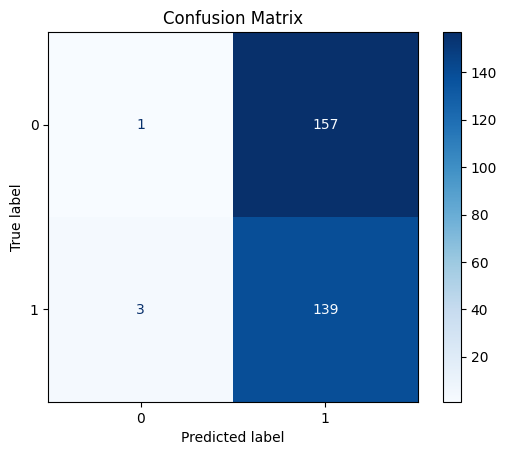

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


target = test_df.iloc[:, 0]  # Target variable
features = test_df.iloc[:, 1:]  # Exclude the target variable from features

# Initialize the StandardScaler and fit it on the features

features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
# Prepare    data for sequence model

testX, testY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    testX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    testY.append(target.iloc[i + n_future - 1])  # Use original target value directly

testX, testY = np.array(testX), np.array(testY)

predictions = optimized_model.predict(testX)


binary_predictions = (predictions > 0.5).astype(int)




import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score



# Create a confusion matrix
cm = confusion_matrix(testY, binary_predictions)

# Calculate accuracy
accuracy = accuracy_score(testY, binary_predictions)

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 46.67%
Precision: 0.4696
Recall: 0.9789
F1 Score: 0.6347
ROC-AUC: 0.4614


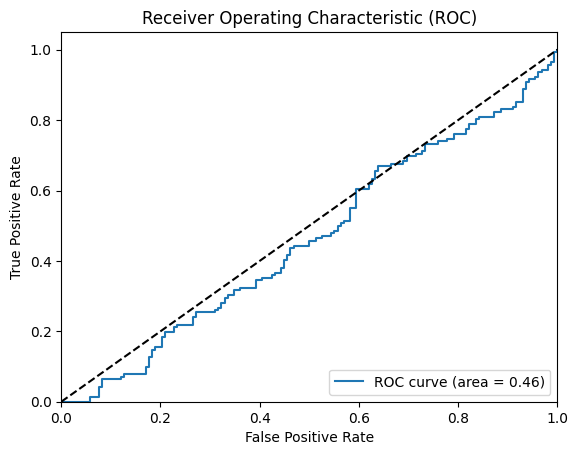

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

precision = precision_score(testY, binary_predictions)
recall = recall_score(testY, binary_predictions)
f1 = f1_score(testY, binary_predictions)
roc_auc = roc_auc_score(testY, predictions)  # Note: for ROC-AUC, we use the raw probabilities, not the binary predictions

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
fpr, tpr, thresholds = roc_curve(testY, predictions)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

##### GRU

In [ ]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers

space = [
    Integer(32, 128, name='gru_units'),
    Real(10**-5, 10**-1, "log-uniform", name='learning_rate'),
    Real(0.0, 0.5, name='dropout_rate'),
    Integer(1, 3, name='num_gru_layers')  # Adding number of LSTM layers as a tunable parameter
]

@use_named_args(space)
def objective(**params):
    model = Sequential()
    initializer = initializers.GlorotUniform(seed=42)
    # Adding variable number of LSTM layers based on the 'num_lstm_layers' parameter
    for _ in range(params['num_gru_layers']):
        model.add(GRU(units=params['gru_units'], return_sequences=True if _ < params['num_gru_layers'] - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2]), kernel_initializer=initializer))
    model.add(Dropout(params['dropout_rate']))
    model.add(Dense(1, activation='sigmoid'))

    # Using Adam with the specified learning rate
    optimizer = Adam(learning_rate=params['learning_rate'])

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(
        trainX, trainY,
        epochs=20,
        batch_size=16,
        validation_data=(valX, valY),
        verbose=1)


    validation_loss = history.history['val_loss'][-1]
    return validation_loss

from tensorflow.keras.optimizers import Adam
from skopt import gp_minimize

res_gp = gp_minimize(objective, space, n_calls=20, random_state=42)

print("Best score=%.4f" % res_gp.fun)
print("""Best parameters:
- gru_units=%d
- learning_rate=%.6f
- dropout_rate=%.6f
- num_gru_layers=%d""" % (res_gp.x[0], res_gp.x[1], res_gp.x[2], res_gp.x[3]))
best_gru_units = res_gp.x[0]
best_learning_rate = res_gp.x[1]
best_dropout_rate = res_gp.x[2]
best_num_gru_layers = res_gp.x[3]  # Number of LSTM layers is now a tunable parameter

# Build the model with these parameters
def build_optimized_model(lstm_units, learning_rate, dropout_rate, num_lstm_layers):
    model = Sequential()
    # Adding LSTM layers based on the optimized number of layers
    for i in range(num_lstm_layers):
        model.add(GRU(units=lstm_units, return_sequences=True if i < num_lstm_layers - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with Adam optimizer
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model




Epoch 1/20
66/66 [==============================] - 4s 17ms/step - loss: 0.6913 - accuracy: 0.5304 - val_loss: 0.6972 - val_accuracy: 0.4830
Epoch 2/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6870 - accuracy: 0.5409 - val_loss: 0.6975 - val_accuracy: 0.4422
Epoch 3/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6859 - accuracy: 0.5456 - val_loss: 0.6975 - val_accuracy: 0.4490
Epoch 4/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6857 - accuracy: 0.5513 - val_loss: 0.6999 - val_accuracy: 0.5034
Epoch 5/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6826 - accuracy: 0.5741 - val_loss: 0.7020 - val_accuracy: 0.5102
Epoch 6/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6837 - accuracy: 0.5656 - val_loss: 0.7023 - val_accuracy: 0.5170
Epoch 7/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6870 - accuracy: 0.5485 - val_loss: 0.7019 - val_accuracy: 0.5170
Epoch 8/20
66/66 [=

Epoch 1/100
66/66 [==============================] - 4s 17ms/step - loss: 0.7349 - accuracy: 0.5171 - val_loss: 0.6926 - val_accuracy: 0.5374
Epoch 2/100
66/66 [==============================] - 0s 6ms/step - loss: 0.6958 - accuracy: 0.5342 - val_loss: 0.7087 - val_accuracy: 0.5034
Epoch 3/100
66/66 [==============================] - 0s 6ms/step - loss: 0.6881 - accuracy: 0.5542 - val_loss: 0.7024 - val_accuracy: 0.5034
Epoch 4/100
66/66 [==============================] - 0s 6ms/step - loss: 0.6902 - accuracy: 0.5523 - val_loss: 0.7164 - val_accuracy: 0.5034
Epoch 5/100
66/66 [==============================] - 0s 6ms/step - loss: 0.6913 - accuracy: 0.5523 - val_loss: 0.6976 - val_accuracy: 0.5034
Epoch 6/100
66/66 [==============================] - 0s 6ms/step - loss: 0.6847 - accuracy: 0.5665 - val_loss: 0.6913 - val_accuracy: 0.4830
Epoch 7/100
66/66 [==============================] - 0s 6ms/step - loss: 0.6918 - accuracy: 0.5608 - val_loss: 0.8251 - val_accuracy: 0.5034
Epoch 8/100


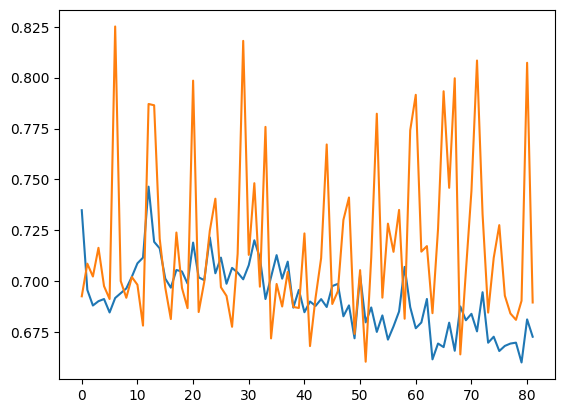

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

model = build_optimized_model(best_gru_units,best_learning_rate,best_dropout_rate,best_num_gru_layers)



from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    min_delta=0.001,  # Minimum change to qualify as an improvement
    patience=30,  # How many epochs to wait before stopping
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored metric
)
history = model.fit(
    trainX, trainY,
    epochs=100,  # Set to a large value; early stopping will halt training when improvement stops
    batch_size=16,
    validation_data=(valX, valY),  # Alternatively, use validation_data=(valX, valY)
    callbacks=[early_stopping],  # Include early stopping
    verbose=1
)


plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')



10/10 [==============================] - 1s 3ms/step
Accuracy: 51.00%


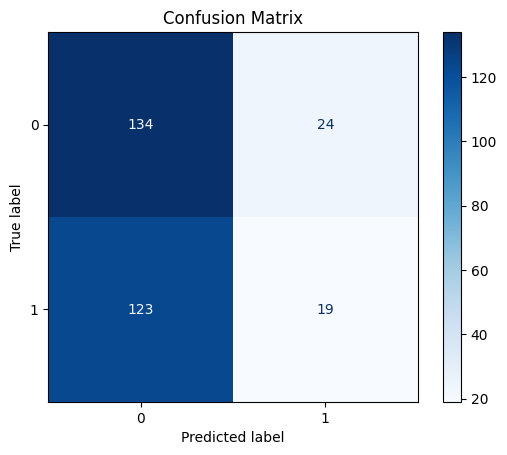

Accuracy: 51.00%
Precision: 0.4419
Recall: 0.1338
F1 Score: 0.2054
ROC-AUC: 0.4883


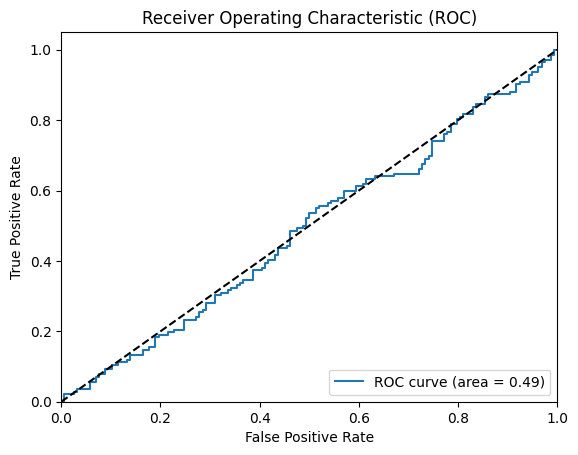

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


target = test_df.iloc[:, 0]  # Target variable
features = test_df.iloc[:, 1:]  # Exclude the target variable from features

# Initialize the StandardScaler and fit it on the features

features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
# Prepare    data for sequence model

testX, testY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    testX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    testY.append(target.iloc[i + n_future - 1])  # Use original target value directly

testX, testY = np.array(testX), np.array(testY)

predictions = model.predict(testX)


binary_predictions = (predictions > 0.5).astype(int)




import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score



# Create a confusion matrix
cm = confusion_matrix(testY, binary_predictions)

# Calculate accuracy
accuracy = accuracy_score(testY, binary_predictions)

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

precision = precision_score(testY, binary_predictions)
recall = recall_score(testY, binary_predictions)
f1 = f1_score(testY, binary_predictions)
roc_auc = roc_auc_score(testY, predictions)  # Note: for ROC-AUC, we use the raw probabilities, not the binary predictions

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
fpr, tpr, thresholds = roc_curve(testY, predictions)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()





#### Sentiment Only

In [ ]:
# List of columns to keep
columns_to_keep = ['direction', 'SentimentMetric']

# Drop columns except the ones in the list
combined_df = combined_df[columns_to_keep]

In [ ]:
train_split = 0.7   # 70% of the data for training
val_split = 0.1    # 10% of the data for validation

# Calculate split indices
split_index_train = int(len(combined_df) * train_split)
split_index_val = split_index_train + int(len(combined_df) * val_split)

# Split the data
train_df = combined_df.iloc[:split_index_train]
val_df = combined_df.iloc[split_index_train:split_index_val]
test_df = combined_df.iloc[split_index_val:]

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


target = train_df.iloc[:, 0]  # Target variable
features = train_df.iloc[:, 1:]  # Exclude the target variable from features

scaler = StandardScaler()
scaler = scaler.fit(features)
features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
print(full_features)
# Prepare    data for sequence model
n_past = 3
n_future = 1
trainX, trainY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    trainX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    trainY.append(target.iloc[i + n_future - 1])  # Use original target value directly

trainX, trainY = np.array(trainX), np.array(trainY)

# Now, trainX includes the target variable without scaling, and trainY contains the original unscaled target values

            direction  SentimentMetric
Date                                  
2017-07-12          1        -0.508619
2017-07-13          1        -0.985280
2017-07-14          1        -0.350495
2017-07-17          0        -0.523205
2017-07-18          1        -1.405554
...               ...              ...
2021-09-13          1        -0.146296
2021-09-14          0         0.108909
2021-09-15          1        -0.257796
2021-09-16          0        -0.451537
2021-09-17          0        -0.727550

[1055 rows x 2 columns]


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


target = val_df.iloc[:, 0]  # Target variable
features = val_df.iloc[:, 1:]  # Exclude the target variable from features


features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
print(full_features)
# Prepare    data for sequence model
n_past = 3
n_future = 1
valX, valY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    valX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    valY.append(target.iloc[i + n_future - 1])  # Use original target value directly

valX, valY = np.array(valX), np.array(valY)

            direction  SentimentMetric
Date                                  
2021-09-20          0        -0.562215
2021-09-21          0        -0.815503
2021-09-22          1        -0.743564
2021-09-23          1         0.372338
2021-09-24          1         0.586511
...               ...              ...
2022-04-18          0         0.559641
2022-04-19          1         0.687250
2022-04-20          0        -0.109599
2022-04-21          0         0.472643
2022-04-22          0         1.321141

[150 rows x 2 columns]


##### LSTM

In [ ]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers

space = [
    Integer(32, 128, name='lstm_units'),
    Real(10**-5, 10**-1, "log-uniform", name='learning_rate'),
    Real(0.0, 0.5, name='dropout_rate'),
    Integer(1, 3, name='num_lstm_layers')  # Adding number of LSTM layers as a tunable parameter
]

@use_named_args(space)
def objective(**params):
    model = Sequential()
    initializer = initializers.GlorotUniform(seed=42)
    # Adding variable number of LSTM layers based on the 'num_lstm_layers' parameter
    for _ in range(params['num_lstm_layers']):
        model.add(LSTM(units=params['lstm_units'], return_sequences=True if _ < params['num_lstm_layers'] - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2]), kernel_initializer=initializer))
    model.add(Dropout(params['dropout_rate']))
    model.add(Dense(1, activation='sigmoid'))

    # Using Adam with the specified learning rate
    optimizer = Adam(learning_rate=params['learning_rate'])

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(
        trainX, trainY,
        epochs=20,
        batch_size=16,
        validation_data=(valX, valY),
        verbose=1)


    validation_loss = history.history['val_loss'][-1]
    return validation_loss


In [ ]:
from tensorflow.keras.optimizers import Adam
from skopt import gp_minimize

res_gp = gp_minimize(objective, space, n_calls=20, random_state=42)

print("Best score=%.4f" % res_gp.fun)
print("""Best parameters:
- lstm_units=%d
- learning_rate=%.6f
- dropout_rate=%.6f
- num_lstm_layers=%d""" % (res_gp.x[0], res_gp.x[1], res_gp.x[2], res_gp.x[3]))


Epoch 1/20
66/66 [==============================] - 4s 18ms/step - loss: 0.6920 - accuracy: 0.5456 - val_loss: 0.6931 - val_accuracy: 0.5102
Epoch 2/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6903 - accuracy: 0.5646 - val_loss: 0.6931 - val_accuracy: 0.4966
Epoch 3/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6890 - accuracy: 0.5656 - val_loss: 0.6934 - val_accuracy: 0.5102
Epoch 4/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6881 - accuracy: 0.5599 - val_loss: 0.6939 - val_accuracy: 0.5034
Epoch 5/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6871 - accuracy: 0.5646 - val_loss: 0.6944 - val_accuracy: 0.4966
Epoch 6/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6863 - accuracy: 0.5627 - val_loss: 0.6951 - val_accuracy: 0.5034
Epoch 7/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6863 - accuracy: 0.5646 - val_loss: 0.6956 - val_accuracy: 0.5034
Epoch 8/20
66/66 [=

In [ ]:
best_lstm_units = res_gp.x[0]
best_learning_rate = res_gp.x[1]
best_dropout_rate = res_gp.x[2]
best_num_lstm_layers = res_gp.x[3]  # Number of LSTM layers is now a tunable parameter

# Build the model with these parameters
def build_optimized_model(lstm_units, learning_rate, dropout_rate, num_lstm_layers):
    model = Sequential()
    # Adding LSTM layers based on the optimized number of layers
    for i in range(num_lstm_layers):
        model.add(LSTM(units=lstm_units, return_sequences=True if i < num_lstm_layers - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with Adam optimizer
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

optimized_model = build_optimized_model(best_lstm_units,best_learning_rate,best_dropout_rate,best_num_lstm_layers)
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    min_delta=0.001,  # Minimum change to qualify as an improvement
    patience=30,  # How many epochs to wait before stopping
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored metric
)
history = optimized_model.fit(
    trainX, trainY,
    epochs=100,  # Set to a large value; early stopping will halt training when improvement stops
    batch_size=16,
    validation_data=(valX, valY),
    callbacks=[early_stopping],  # Include early stopping
    verbose=1
)


Epoch 1/100
66/66 [==============================] - 3s 11ms/step - loss: 0.6918 - accuracy: 0.5086 - val_loss: 0.6924 - val_accuracy: 0.4830
Epoch 2/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.5247 - val_loss: 0.6924 - val_accuracy: 0.4762
Epoch 3/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6889 - accuracy: 0.5390 - val_loss: 0.6924 - val_accuracy: 0.4898
Epoch 4/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6916 - accuracy: 0.5067 - val_loss: 0.6924 - val_accuracy: 0.4898
Epoch 5/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6944 - accuracy: 0.4952 - val_loss: 0.6924 - val_accuracy: 0.4898
Epoch 6/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.5428 - val_loss: 0.6924 - val_accuracy: 0.4966
Epoch 7/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.5342 - val_loss: 0.6924 - val_accuracy: 0.4966
Epoch 8/100


10/10 [==============================] - 0s 2ms/step
Accuracy: 52.33%


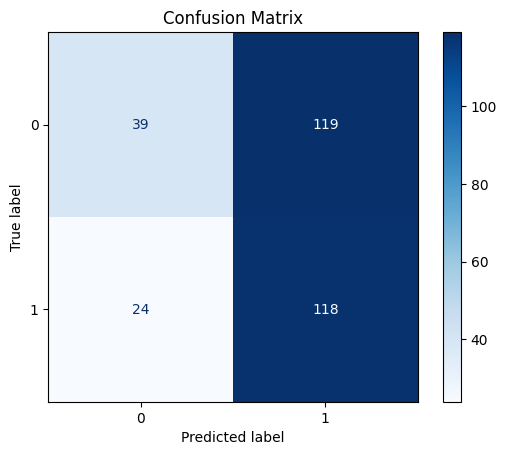

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


target = test_df.iloc[:, 0]  # Target variable
features = test_df.iloc[:, 1:]  # Exclude the target variable from features

# Initialize the StandardScaler and fit it on the features

features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
# Prepare    data for sequence model

testX, testY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    testX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    testY.append(target.iloc[i + n_future - 1])  # Use original target value directly

testX, testY = np.array(testX), np.array(testY)

predictions = optimized_model.predict(testX)


binary_predictions = (predictions > 0.5).astype(int)




import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score



# Create a confusion matrix
cm = confusion_matrix(testY, binary_predictions)

# Calculate accuracy
accuracy = accuracy_score(testY, binary_predictions)

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()



Accuracy: 52.33%
Precision: 0.4979
Recall: 0.8310
F1 Score: 0.6227
ROC-AUC: 0.5762


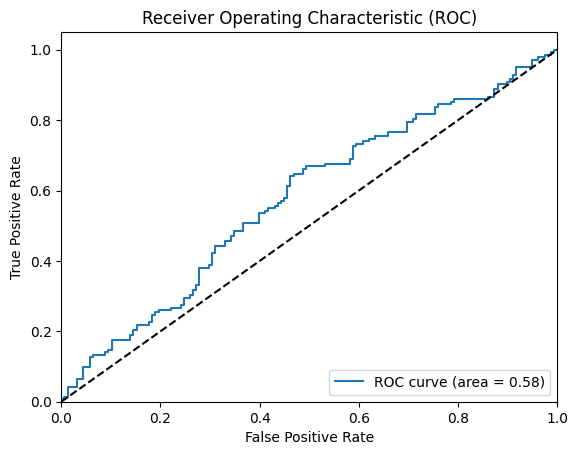

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

precision = precision_score(testY, binary_predictions)
recall = recall_score(testY, binary_predictions)
f1 = f1_score(testY, binary_predictions)
roc_auc = roc_auc_score(testY, predictions)  # Note: for ROC-AUC, we use the raw probabilities, not the binary predictions

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
fpr, tpr, thresholds = roc_curve(testY, predictions)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

##### GRU

In [ ]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers

space = [
    Integer(32, 128, name='gru_units'),
    Real(10**-5, 10**-1, "log-uniform", name='learning_rate'),
    Real(0.0, 0.5, name='dropout_rate'),
    Integer(1, 3, name='num_gru_layers')  # Adding number of LSTM layers as a tunable parameter
]

@use_named_args(space)
def objective(**params):
    model = Sequential()
    initializer = initializers.GlorotUniform(seed=42)
    # Adding variable number of LSTM layers based on the 'num_lstm_layers' parameter
    for _ in range(params['num_gru_layers']):
        model.add(GRU(units=params['gru_units'], return_sequences=True if _ < params['num_gru_layers'] - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2]), kernel_initializer=initializer))
    model.add(Dropout(params['dropout_rate']))
    model.add(Dense(1, activation='sigmoid'))

    # Using Adam with the specified learning rate
    optimizer = Adam(learning_rate=params['learning_rate'])

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(
        trainX, trainY,
        epochs=20,
        batch_size=16,
        validation_data=(valX, valY),
        verbose=1)


    validation_loss = history.history['val_loss'][-1]
    return validation_loss

from tensorflow.keras.optimizers import Adam
from skopt import gp_minimize

res_gp = gp_minimize(objective, space, n_calls=20, random_state=42)

print("Best score=%.4f" % res_gp.fun)
print("""Best parameters:
- gru_units=%d
- learning_rate=%.6f
- dropout_rate=%.6f
- num_gru_layers=%d""" % (res_gp.x[0], res_gp.x[1], res_gp.x[2], res_gp.x[3]))
best_gru_units = res_gp.x[0]
best_learning_rate = res_gp.x[1]
best_dropout_rate = res_gp.x[2]
best_num_gru_layers = res_gp.x[3]  # Number of LSTM layers is now a tunable parameter

# Build the model with these parameters
def build_optimized_model(lstm_units, learning_rate, dropout_rate, num_lstm_layers):
    model = Sequential()
    # Adding LSTM layers based on the optimized number of layers
    for i in range(num_lstm_layers):
        model.add(GRU(units=lstm_units, return_sequences=True if i < num_lstm_layers - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with Adam optimizer
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model




Epoch 1/20
66/66 [==============================] - 4s 16ms/step - loss: 0.6931 - accuracy: 0.5038 - val_loss: 0.6930 - val_accuracy: 0.5034
Epoch 2/20
66/66 [==============================] - 0s 5ms/step - loss: 0.6886 - accuracy: 0.5637 - val_loss: 0.6934 - val_accuracy: 0.5034
Epoch 3/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6872 - accuracy: 0.5675 - val_loss: 0.6942 - val_accuracy: 0.5102
Epoch 4/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6849 - accuracy: 0.5684 - val_loss: 0.6956 - val_accuracy: 0.5102
Epoch 5/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6840 - accuracy: 0.5637 - val_loss: 0.6965 - val_accuracy: 0.5170
Epoch 6/20
66/66 [==============================] - 0s 5ms/step - loss: 0.6820 - accuracy: 0.5618 - val_loss: 0.6974 - val_accuracy: 0.5238
Epoch 7/20
66/66 [==============================] - 0s 5ms/step - loss: 0.6818 - accuracy: 0.5608 - val_loss: 0.6975 - val_accuracy: 0.5238
Epoch 8/20
66/66 [=

Epoch 1/100
66/66 [==============================] - 3s 11ms/step - loss: 0.6964 - accuracy: 0.4781 - val_loss: 0.6941 - val_accuracy: 0.4966
Epoch 2/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6898 - accuracy: 0.5456 - val_loss: 0.6933 - val_accuracy: 0.5034
Epoch 3/100
66/66 [==============================] - 0s 5ms/step - loss: 0.6857 - accuracy: 0.5665 - val_loss: 0.6930 - val_accuracy: 0.5034
Epoch 4/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6828 - accuracy: 0.5608 - val_loss: 0.6939 - val_accuracy: 0.5034
Epoch 5/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6833 - accuracy: 0.5570 - val_loss: 0.6941 - val_accuracy: 0.5170
Epoch 6/100
66/66 [==============================] - 0s 5ms/step - loss: 0.6770 - accuracy: 0.5684 - val_loss: 0.6943 - val_accuracy: 0.5238
Epoch 7/100
66/66 [==============================] - 0s 5ms/step - loss: 0.6759 - accuracy: 0.5684 - val_loss: 0.6940 - val_accuracy: 0.5238
Epoch 8/100


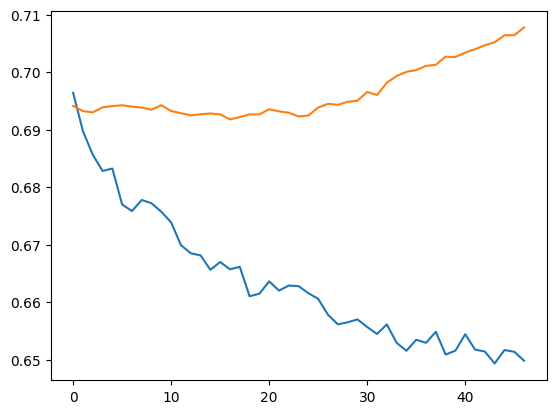

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

model = build_optimized_model(best_gru_units,best_learning_rate,best_dropout_rate,best_num_gru_layers)



from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    min_delta=0.001,  # Minimum change to qualify as an improvement
    patience=30,  # How many epochs to wait before stopping
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored metric
)
history = model.fit(
    trainX, trainY,
    epochs=100,  # Set to a large value; early stopping will halt training when improvement stops
    batch_size=16,
    validation_data=(valX, valY),  # Alternatively, use validation_data=(valX, valY)
    callbacks=[early_stopping],  # Include early stopping
    verbose=1
)


plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')



10/10 [==============================] - 0s 2ms/step
Accuracy: 54.33%


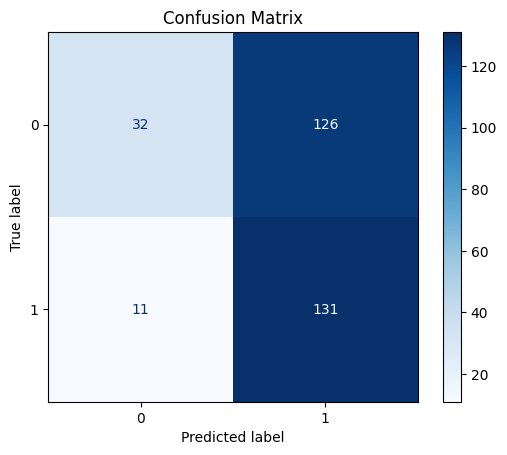

Accuracy: 54.33%
Precision: 0.5097
Recall: 0.9225
F1 Score: 0.6566
ROC-AUC: 0.6736


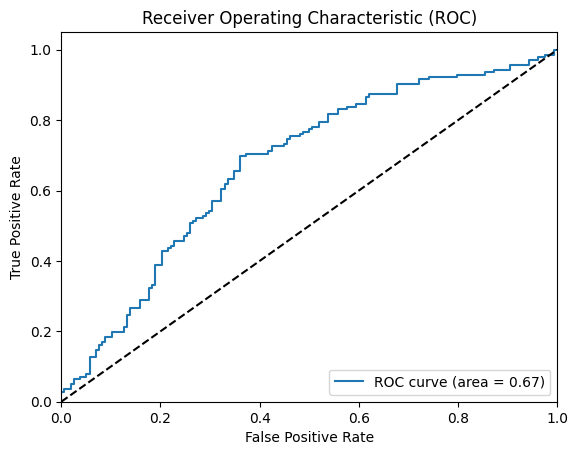

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


target = test_df.iloc[:, 0]  # Target variable
features = test_df.iloc[:, 1:]  # Exclude the target variable from features

# Initialize the StandardScaler and fit it on the features

features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
# Prepare    data for sequence model

testX, testY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    testX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    testY.append(target.iloc[i + n_future - 1])  # Use original target value directly

testX, testY = np.array(testX), np.array(testY)

predictions = model.predict(testX)


binary_predictions = (predictions > 0.5).astype(int)




import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score



# Create a confusion matrix
cm = confusion_matrix(testY, binary_predictions)

# Calculate accuracy
accuracy = accuracy_score(testY, binary_predictions)

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

precision = precision_score(testY, binary_predictions)
recall = recall_score(testY, binary_predictions)
f1 = f1_score(testY, binary_predictions)
roc_auc = roc_auc_score(testY, predictions)  # Note: for ROC-AUC, we use the raw probabilities, not the binary predictions

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
fpr, tpr, thresholds = roc_curve(testY, predictions)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()





## News Data

### Mean Scores

#### Price & Sentiment

In [ ]:
news_meanBERT=pd.read_csv('drive/MyDrive/dailyBERTnews_mean')

In [ ]:
news_meanBERT['Date']=pd.to_datetime(news_meanBERT['Date'], errors='coerce')

In [ ]:

indicators_df.index = pd.to_datetime(indicators_df.index)

news_meanBERT.set_index('Date', inplace=True)

min_date = news_meanBERT.index.min()
max_date = news_meanBERT.index.max()

# Filter indicators_df to include only rows within the date range of news_meanBERT
filtered_indicators_df = indicators_df[(indicators_df.index >= min_date) & (indicators_df.index <= max_date)]


combined_df = filtered_indicators_df.merge(news_meanBERT, left_index=True, right_index=True, how='outer')

# Initial fill for sentiment data where financial data is available but sentiment data is not
combined_df.loc[combined_df['direction'].notna(), ['Negative', 'Neutral', 'Positive']] = combined_df.loc[combined_df['direction'].notna(), ['Negative', 'Neutral', 'Positive']].fillna({'Negative': 0, 'Neutral': 1, 'Positive': 0})

# Identify missing dates in indicators_df
missing_dates = pd.date_range(start=combined_df.index.min(), end=combined_df.index.max()).difference(combined_df.index)

# Handling missing dates in the financial data
for date in missing_dates:
    next_date = date + pd.Timedelta(days=1)
    if next_date in combined_df.index:
        # Finding the range of missing dates leading up to next_date
        range_start = date
        while (range_start - pd.Timedelta(days=1)) in missing_dates:
            range_start -= pd.Timedelta(days=1)

        # Check if range_start is before the start of the combined_df index to avoid looking outside the DataFrame
        if range_start < combined_df.index.min():
            continue

        # Calculate mean sentiments for the missing period and assign to next_date
        mean_sentiments = combined_df.loc[range_start:date, ['Negative', 'Neutral', 'Positive']].mean()
        combined_df.loc[next_date, ['Negative', 'Neutral', 'Positive']] = mean_sentiments

# Now, remove rows with missing financial data (where 'direction' is NaN)
combined_df.dropna(subset=['direction'], inplace=True)

# Finally, ensure that any remaining NaN values in the sentiment columns are filled as specified
combined_df[['Negative', 'Neutral', 'Positive']] = combined_df[['Negative', 'Neutral', 'Positive']].fillna({'Negative': 0, 'Neutral': 1, 'Positive': 0})

# Ensuring all modifications did not introduce any inadvertent changes to the 'direction' or other financial columns
combined_df['direction'] = indicators_df['direction']

print(combined_df.head())

            direction         sma5         Open        Close        sma10  \
Date                                                                        
2019-12-19          1  3189.856006  3192.320068  3205.370117  3167.386987   
2019-12-20          1  3200.339990  3223.330078  3221.219971  3174.917993   
2019-12-23          1  3206.852002  3226.050049  3224.010010  3183.722998   
2019-12-24          0  3213.023975  3225.449951  3223.379883  3192.808984   
2019-12-26          1  3222.777979  3227.199951  3239.909912  3202.636987   

                  ema12      rdp5     rdp10        atr      rsi14        mom  \
Date                                                                           
2019-12-19  3166.586738  1.161409  2.820919  20.165244  73.214941  14.230225   
2019-12-20  3174.991851  1.654251  2.393904  20.173425  75.730146  15.849854   
2019-12-23  3182.533106  1.020228  2.807754  19.201042  76.154624   2.790039   
2019-12-24  3188.817225  0.966630  2.900536  18.252390  75.8

In [ ]:
combined_df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
train_split = 0.7   # 70% of the data for training
val_split = 0.1    # 10% of the data for validation

# Calculate split indices
split_index_train = int(len(combined_df) * train_split)
split_index_val = split_index_train + int(len(combined_df) * val_split)

# Split the data
train_df = combined_df.iloc[:split_index_train]
val_df = combined_df.iloc[split_index_train:split_index_val]
test_df = combined_df.iloc[split_index_val:]

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


target = train_df.iloc[:, 0]  # Target variable
features = train_df.iloc[:, 1:]  # Exclude the target variable from features

scaler = StandardScaler()
scaler = scaler.fit(features)
features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
print(full_features)
# Prepare    data for sequence model
n_past = 3
n_future = 1
trainX, trainY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    trainX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    trainY.append(target.iloc[i + n_future - 1])  # Use original target value directly

trainX, trainY = np.array(trainX), np.array(trainY)

# Now, trainX includes the target variable without scaling, and trainY contains the original unscaled target values

            direction      sma5      Open     Close     sma10     ema12  \
Date                                                                      
2019-12-19          1 -0.987048 -0.987256 -0.966513 -1.016860 -1.017836   
2019-12-20          1 -0.970013 -0.936938 -0.940802 -1.004611 -1.004118   
2019-12-23          1 -0.959432 -0.932524 -0.936276 -0.990289 -0.991811   
2019-12-24          0 -0.949404 -0.933498 -0.937298 -0.975511 -0.981555   
2019-12-26          1 -0.933555 -0.930658 -0.910484 -0.959526 -0.968726   
...               ...       ...       ...       ...       ...       ...   
2022-03-10          0  0.731639  0.733107  0.743496  0.833935  0.831522   
2022-03-11          0  0.691161  0.776837  0.653936  0.804603  0.807559   
2022-03-14          0  0.682068  0.652300  0.603324  0.771938  0.779448   
2022-03-15          1  0.711884  0.629696  0.748249  0.764812  0.778094   
2022-03-16          1  0.737875  0.790857  0.903019  0.760147  0.800903   

                rdp5    

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


target = val_df.iloc[:, 0]  # Target variable
features = val_df.iloc[:, 1:]  # Exclude the target variable from features


features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
print(full_features)
# Prepare    data for sequence model
n_past = 3
n_future = 1
valX, valY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    valX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    valY.append(target.iloc[i + n_future - 1])  # Use original target value directly

valX, valY = np.array(valX), np.array(valY)

            direction      sma5      Open     Close     sma10     ema12  \
Date                                                                      
2022-03-17          1  0.787319  0.883297  0.990308  0.767984  0.833715   
2022-03-18          1  0.871424  0.984274  1.073769  0.789819  0.874396   
2022-03-21          0  0.965038  1.073616  1.070622  0.832123  0.908332   
2022-03-22          1  1.046007  1.084488  1.152428  0.887572  0.949709   
2022-03-23          0  1.077977  1.123431  1.062609  0.916582  0.970817   
...               ...       ...       ...       ...       ...       ...   
2022-07-06          1  0.038790  0.050677  0.071204  0.060065  0.071399   
2022-07-07          1  0.066019  0.094277  0.164544  0.083280  0.088629   
2022-07-08          0  0.103065  0.141998  0.159288  0.100139  0.102394   
2022-07-11          0  0.112522  0.130121  0.086371  0.090817  0.102756   
2022-07-12          0  0.108430  0.083081  0.028574  0.077592  0.094116   

                rdp5    

##### LSTM

In [ ]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers

space = [
    Integer(32, 128, name='lstm_units'),
    Real(10**-5, 10**-1, "log-uniform", name='learning_rate'),
    Real(0.0, 0.5, name='dropout_rate'),
    Integer(1, 3, name='num_lstm_layers')  # Adding number of LSTM layers as a tunable parameter
]

@use_named_args(space)
def objective(**params):
    model = Sequential()
    initializer = initializers.GlorotUniform(seed=42)
    # Adding variable number of LSTM layers based on the 'num_lstm_layers' parameter
    for _ in range(params['num_lstm_layers']):
        model.add(LSTM(units=params['lstm_units'], return_sequences=True if _ < params['num_lstm_layers'] - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2]), kernel_initializer=initializer))
    model.add(Dropout(params['dropout_rate']))
    model.add(Dense(1, activation='sigmoid'))

    # Using Adam with the specified learning rate
    optimizer = Adam(learning_rate=params['learning_rate'])

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(
        trainX, trainY,
        epochs=20,
        batch_size=16,
        validation_data=(valX, valY),
        verbose=1)


    validation_loss = history.history['val_loss'][-1]
    return validation_loss


In [ ]:
from tensorflow.keras.optimizers import Adam
from skopt import gp_minimize

res_gp = gp_minimize(objective, space, n_calls=20, random_state=42)

print("Best score=%.4f" % res_gp.fun)
print("""Best parameters:
- lstm_units=%d
- learning_rate=%.6f
- dropout_rate=%.6f
- num_lstm_layers=%d""" % (res_gp.x[0], res_gp.x[1], res_gp.x[2], res_gp.x[3]))


Epoch 1/20
36/36 [==============================] - 4s 28ms/step - loss: 0.6930 - accuracy: 0.4813 - val_loss: 0.6942 - val_accuracy: 0.5325
Epoch 2/20
36/36 [==============================] - 0s 7ms/step - loss: 0.6937 - accuracy: 0.5134 - val_loss: 0.6940 - val_accuracy: 0.5065
Epoch 3/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6904 - accuracy: 0.5472 - val_loss: 0.6938 - val_accuracy: 0.5065
Epoch 4/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6910 - accuracy: 0.5223 - val_loss: 0.6936 - val_accuracy: 0.4935
Epoch 5/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6902 - accuracy: 0.5455 - val_loss: 0.6937 - val_accuracy: 0.4935
Epoch 6/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6907 - accuracy: 0.5276 - val_loss: 0.6938 - val_accuracy: 0.4805
Epoch 7/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6909 - accuracy: 0.5169 - val_loss: 0.6937 - val_accuracy: 0.4156
Epoch 8/20
36/36 [=

In [ ]:
best_lstm_units = res_gp.x[0]
best_learning_rate = res_gp.x[1]
best_dropout_rate = res_gp.x[2]
best_num_lstm_layers = res_gp.x[3]  # Number of LSTM layers is now a tunable parameter

# Build the model with these parameters
def build_optimized_model(lstm_units, learning_rate, dropout_rate, num_lstm_layers):
    model = Sequential()
    # Adding LSTM layers based on the optimized number of layers
    for i in range(num_lstm_layers):
        model.add(LSTM(units=lstm_units, return_sequences=True if i < num_lstm_layers - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with Adam optimizer
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

optimized_model = build_optimized_model(best_lstm_units,best_learning_rate,best_dropout_rate,best_num_lstm_layers)
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    min_delta=0.001,  # Minimum change to qualify as an improvement
    patience=30,  # How many epochs to wait before stopping
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored metric
)
history = optimized_model.fit(
    trainX, trainY,
    epochs=100,  # Set to a large value; early stopping will halt training when improvement stops
    batch_size=16,
    validation_data=(valX, valY),
    callbacks=[early_stopping],  # Include early stopping
    verbose=1
)

Epoch 1/100
36/36 [==============================] - 4s 29ms/step - loss: 0.6918 - accuracy: 0.5401 - val_loss: 0.6935 - val_accuracy: 0.4935
Epoch 2/100
36/36 [==============================] - 0s 6ms/step - loss: 0.6915 - accuracy: 0.5490 - val_loss: 0.6934 - val_accuracy: 0.4935
Epoch 3/100
36/36 [==============================] - 0s 6ms/step - loss: 0.6916 - accuracy: 0.5419 - val_loss: 0.6934 - val_accuracy: 0.4935
Epoch 4/100
36/36 [==============================] - 0s 7ms/step - loss: 0.6916 - accuracy: 0.5401 - val_loss: 0.6933 - val_accuracy: 0.4935
Epoch 5/100
36/36 [==============================] - 0s 7ms/step - loss: 0.6913 - accuracy: 0.5419 - val_loss: 0.6933 - val_accuracy: 0.5065
Epoch 6/100
36/36 [==============================] - 0s 7ms/step - loss: 0.6911 - accuracy: 0.5437 - val_loss: 0.6933 - val_accuracy: 0.5325
Epoch 7/100
36/36 [==============================] - 0s 6ms/step - loss: 0.6910 - accuracy: 0.5330 - val_loss: 0.6933 - val_accuracy: 0.5065
Epoch 8/100


5/5 [==============================] - 1s 3ms/step
Accuracy: 46.54%


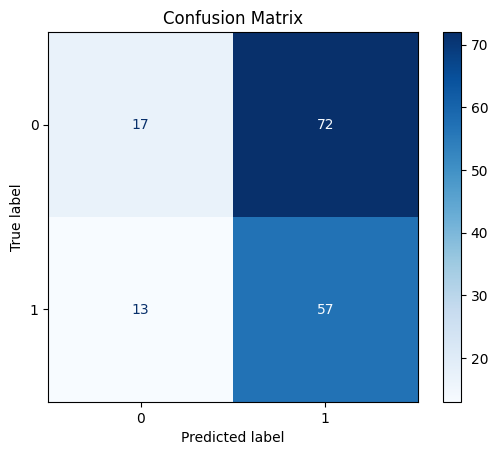

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


target = test_df.iloc[:, 0]  # Target variable
features = test_df.iloc[:, 1:]  # Exclude the target variable from features

# Initialize the StandardScaler and fit it on the features

features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
# Prepare    data for sequence model

testX, testY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    testX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    testY.append(target.iloc[i + n_future - 1])  # Use original target value directly

testX, testY = np.array(testX), np.array(testY)

predictions = optimized_model.predict(testX)


binary_predictions = (predictions > 0.5).astype(int)




import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score



# Create a confusion matrix
cm = confusion_matrix(testY, binary_predictions)

# Calculate accuracy
accuracy = accuracy_score(testY, binary_predictions)

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()



Accuracy: 46.54%
Precision: 0.4419
Recall: 0.8143
F1 Score: 0.5729
ROC-AUC: 0.5043


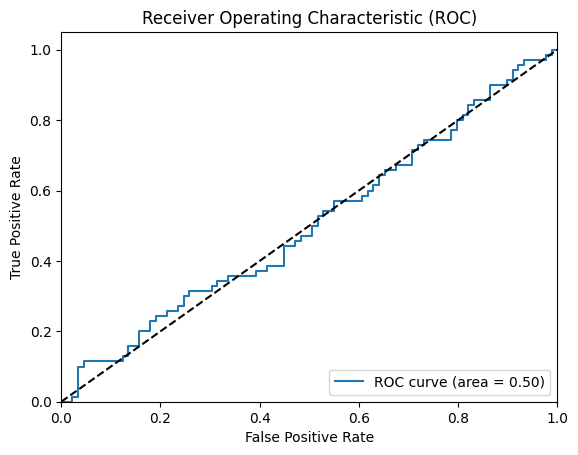

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

precision = precision_score(testY, binary_predictions)
recall = recall_score(testY, binary_predictions)
f1 = f1_score(testY, binary_predictions)
roc_auc = roc_auc_score(testY, predictions)  # Note: for ROC-AUC, we use the raw probabilities, not the binary predictions

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
fpr, tpr, thresholds = roc_curve(testY, predictions)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#####GRU

In [ ]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers

space = [
    Integer(32, 128, name='gru_units'),
    Real(10**-5, 10**-1, "log-uniform", name='learning_rate'),
    Real(0.0, 0.5, name='dropout_rate'),
    Integer(1, 3, name='num_gru_layers')  # Adding number of LSTM layers as a tunable parameter
]

@use_named_args(space)
def objective(**params):
    model = Sequential()
    initializer = initializers.GlorotUniform(seed=42)
    # Adding variable number of LSTM layers based on the 'num_lstm_layers' parameter
    for _ in range(params['num_gru_layers']):
        model.add(GRU(units=params['gru_units'], return_sequences=True if _ < params['num_gru_layers'] - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2]), kernel_initializer=initializer))
    model.add(Dropout(params['dropout_rate']))
    model.add(Dense(1, activation='sigmoid'))

    # Using Adam with the specified learning rate
    optimizer = Adam(learning_rate=params['learning_rate'])

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(
        trainX, trainY,
        epochs=20,
        batch_size=16,
        validation_data=(valX, valY),
        verbose=1)


    validation_loss = history.history['val_loss'][-1]
    return validation_loss

from tensorflow.keras.optimizers import Adam
from skopt import gp_minimize

res_gp = gp_minimize(objective, space, n_calls=20, random_state=42)

print("Best score=%.4f" % res_gp.fun)
print("""Best parameters:
- gru_units=%d
- learning_rate=%.6f
- dropout_rate=%.6f
- num_gru_layers=%d""" % (res_gp.x[0], res_gp.x[1], res_gp.x[2], res_gp.x[3]))
best_gru_units = res_gp.x[0]
best_learning_rate = res_gp.x[1]
best_dropout_rate = res_gp.x[2]
best_num_gru_layers = res_gp.x[3]  # Number of LSTM layers is now a tunable parameter

# Build the model with these parameters
def build_optimized_model(lstm_units, learning_rate, dropout_rate, num_lstm_layers):
    model = Sequential()
    # Adding LSTM layers based on the optimized number of layers
    for i in range(num_lstm_layers):
        model.add(GRU(units=lstm_units, return_sequences=True if i < num_lstm_layers - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with Adam optimizer
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model




Epoch 1/20
36/36 [==============================] - 4s 26ms/step - loss: 0.6955 - accuracy: 0.5169 - val_loss: 0.6961 - val_accuracy: 0.4805
Epoch 2/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6899 - accuracy: 0.5241 - val_loss: 0.6941 - val_accuracy: 0.4935
Epoch 3/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6908 - accuracy: 0.5419 - val_loss: 0.6934 - val_accuracy: 0.5195
Epoch 4/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6903 - accuracy: 0.5686 - val_loss: 0.6930 - val_accuracy: 0.5065
Epoch 5/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6871 - accuracy: 0.5793 - val_loss: 0.6936 - val_accuracy: 0.4935
Epoch 6/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6901 - accuracy: 0.5419 - val_loss: 0.6939 - val_accuracy: 0.5065
Epoch 7/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6829 - accuracy: 0.5437 - val_loss: 0.6936 - val_accuracy: 0.4805
Epoch 8/20
36/36 [=

Epoch 1/100
36/36 [==============================] - 3s 18ms/step - loss: 0.7037 - accuracy: 0.4848 - val_loss: 0.6874 - val_accuracy: 0.5584
Epoch 2/100
36/36 [==============================] - 0s 5ms/step - loss: 0.6962 - accuracy: 0.4884 - val_loss: 0.6879 - val_accuracy: 0.5584
Epoch 3/100
36/36 [==============================] - 0s 5ms/step - loss: 0.6927 - accuracy: 0.5152 - val_loss: 0.6889 - val_accuracy: 0.5325
Epoch 4/100
36/36 [==============================] - 0s 5ms/step - loss: 0.6891 - accuracy: 0.5187 - val_loss: 0.6890 - val_accuracy: 0.5714
Epoch 5/100
36/36 [==============================] - 0s 5ms/step - loss: 0.6881 - accuracy: 0.5223 - val_loss: 0.6902 - val_accuracy: 0.5844
Epoch 6/100
36/36 [==============================] - 0s 5ms/step - loss: 0.6865 - accuracy: 0.5437 - val_loss: 0.6907 - val_accuracy: 0.5714
Epoch 7/100
36/36 [==============================] - 0s 5ms/step - loss: 0.6842 - accuracy: 0.5561 - val_loss: 0.6901 - val_accuracy: 0.5714
Epoch 8/100


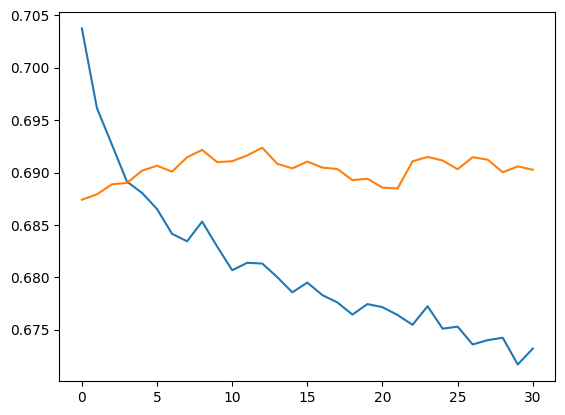

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

model = build_optimized_model(best_gru_units,best_learning_rate,best_dropout_rate,best_num_gru_layers)



from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    min_delta=0.001,  # Minimum change to qualify as an improvement
    patience=30,  # How many epochs to wait before stopping
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored metric
)
history = model.fit(
    trainX, trainY,
    epochs=100,  # Set to a large value; early stopping will halt training when improvement stops
    batch_size=16,
    validation_data=(valX, valY),  # Alternatively, use validation_data=(valX, valY)
    callbacks=[early_stopping],  # Include early stopping
    verbose=1
)


plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')



5/5 [==============================] - 0s 3ms/step
Accuracy: 50.94%


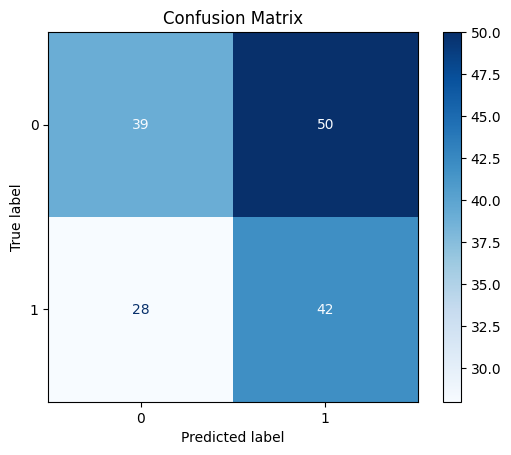

Accuracy: 50.94%
Precision: 0.4565
Recall: 0.6000
F1 Score: 0.5185
ROC-AUC: 0.5461


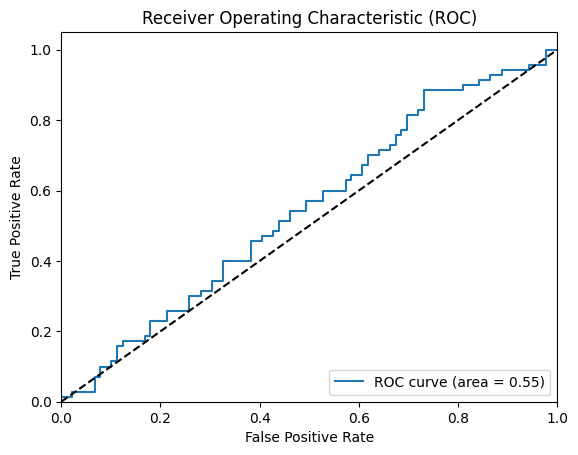

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


target = test_df.iloc[:, 0]  # Target variable
features = test_df.iloc[:, 1:]  # Exclude the target variable from features

# Initialize the StandardScaler and fit it on the features

features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
# Prepare    data for sequence model

testX, testY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    testX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    testY.append(target.iloc[i + n_future - 1])  # Use original target value directly

testX, testY = np.array(testX), np.array(testY)

predictions = model.predict(testX)


binary_predictions = (predictions > 0.5).astype(int)




import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score



# Create a confusion matrix
cm = confusion_matrix(testY, binary_predictions)

# Calculate accuracy
accuracy = accuracy_score(testY, binary_predictions)

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

precision = precision_score(testY, binary_predictions)
recall = recall_score(testY, binary_predictions)
f1 = f1_score(testY, binary_predictions)
roc_auc = roc_auc_score(testY, predictions)  # Note: for ROC-AUC, we use the raw probabilities, not the binary predictions

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
fpr, tpr, thresholds = roc_curve(testY, predictions)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()





#### Sentiment Only

In [ ]:
# List of columns to keep
columns_to_keep = ['direction', 'Negative','Neutral','Positive']

# Drop columns except the ones in the list
combined_df = combined_df[columns_to_keep]

In [ ]:
train_split = 0.7   # 70% of the data for training
val_split = 0.1    # 10% of the data for validation

# Calculate split indices
split_index_train = int(len(combined_df) * train_split)
split_index_val = split_index_train + int(len(combined_df) * val_split)

# Split the data
train_df = combined_df.iloc[:split_index_train]
val_df = combined_df.iloc[split_index_train:split_index_val]
test_df = combined_df.iloc[split_index_val:]

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


target = train_df.iloc[:, 0]  # Target variable
features = train_df.iloc[:, 1:]  # Exclude the target variable from features

scaler = StandardScaler()
scaler = scaler.fit(features)
features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
print(full_features)
# Prepare    data for sequence model
n_past = 3
n_future = 1
trainX, trainY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    trainX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    trainY.append(target.iloc[i + n_future - 1])  # Use original target value directly

trainX, trainY = np.array(trainX), np.array(trainY)

# Now, trainX includes the target variable without scaling, and trainY contains the original unscaled target values

            direction  Negative   Neutral  Positive
Date                                               
2019-12-19          1 -0.564921 -3.880529  5.544130
2019-12-20          1 -0.576839  1.078334 -0.995900
2019-12-23          1 -0.576839  1.078334 -0.995900
2019-12-24          0 -0.576839  1.078334 -0.995900
2019-12-26          1 -0.576839  1.078334 -0.995900
...               ...       ...       ...       ...
2022-03-10          0  0.857429 -0.600568  0.156658
2022-03-11          0  1.003059 -0.587177  0.030872
2022-03-14          0  0.963608 -0.741056  0.263376
2022-03-15          1  0.572143 -0.910741  0.778057
2022-03-16          1  0.537597 -0.708325  0.536381

[564 rows x 4 columns]


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


target = val_df.iloc[:, 0]  # Target variable
features = val_df.iloc[:, 1:]  # Exclude the target variable from features


features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
print(full_features)
# Prepare    data for sequence model
n_past = 3
n_future = 1
valX, valY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    valX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    valY.append(target.iloc[i + n_future - 1])  # Use original target value directly

valX, valY = np.array(valX), np.array(valY)

            direction  Negative   Neutral  Positive
Date                                               
2022-03-17          1  0.520756 -0.738100  0.588204
2022-03-18          1  0.647454 -0.856613  0.650668
2022-03-21          0  0.636221 -0.595844  0.314624
2022-03-22          1  0.191064 -0.483762  0.497049
2022-03-23          0  0.205648 -0.233787  0.156095
...               ...       ...       ...       ...
2022-07-06          1  0.133602 -0.412661  0.445804
2022-07-07          1 -0.005717 -0.068476  0.094676
2022-07-08          0  0.441575 -0.317964  0.092132
2022-07-11          0  0.204245 -0.437195  0.425765
2022-07-12          0  0.515372 -0.557113  0.353182

[80 rows x 4 columns]


##### LSTM

In [ ]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers

space = [
    Integer(32, 128, name='lstm_units'),
    Real(10**-5, 10**-1, "log-uniform", name='learning_rate'),
    Real(0.0, 0.5, name='dropout_rate'),
    Integer(1, 3, name='num_lstm_layers')  # Adding number of LSTM layers as a tunable parameter
]

@use_named_args(space)
def objective(**params):
    model = Sequential()
    initializer = initializers.GlorotUniform(seed=42)
    # Adding variable number of LSTM layers based on the 'num_lstm_layers' parameter
    for _ in range(params['num_lstm_layers']):
        model.add(LSTM(units=params['lstm_units'], return_sequences=True if _ < params['num_lstm_layers'] - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2]), kernel_initializer=initializer))
    model.add(Dropout(params['dropout_rate']))
    model.add(Dense(1, activation='sigmoid'))

    # Using Adam with the specified learning rate
    optimizer = Adam(learning_rate=params['learning_rate'])

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(
        trainX, trainY,
        epochs=20,
        batch_size=16,
        validation_data=(valX, valY),
        verbose=1)


    validation_loss = history.history['val_loss'][-1]
    return validation_loss


In [ ]:
from tensorflow.keras.optimizers import Adam
from skopt import gp_minimize

res_gp = gp_minimize(objective, space, n_calls=20, random_state=42)

print("Best score=%.4f" % res_gp.fun)
print("""Best parameters:
- lstm_units=%d
- learning_rate=%.6f
- dropout_rate=%.6f
- num_lstm_layers=%d""" % (res_gp.x[0], res_gp.x[1], res_gp.x[2], res_gp.x[3]))


Epoch 1/20
36/36 [==============================] - 4s 30ms/step - loss: 0.6933 - accuracy: 0.5276 - val_loss: 0.6941 - val_accuracy: 0.4675
Epoch 2/20
36/36 [==============================] - 0s 7ms/step - loss: 0.6920 - accuracy: 0.5508 - val_loss: 0.6944 - val_accuracy: 0.4675
Epoch 3/20
36/36 [==============================] - 0s 7ms/step - loss: 0.6917 - accuracy: 0.5579 - val_loss: 0.6947 - val_accuracy: 0.4675
Epoch 4/20
36/36 [==============================] - 0s 7ms/step - loss: 0.6907 - accuracy: 0.5561 - val_loss: 0.6948 - val_accuracy: 0.4545
Epoch 5/20
36/36 [==============================] - 0s 7ms/step - loss: 0.6905 - accuracy: 0.5561 - val_loss: 0.6951 - val_accuracy: 0.4675
Epoch 6/20
36/36 [==============================] - 0s 7ms/step - loss: 0.6899 - accuracy: 0.5597 - val_loss: 0.6953 - val_accuracy: 0.4416
Epoch 7/20
36/36 [==============================] - 0s 7ms/step - loss: 0.6899 - accuracy: 0.5704 - val_loss: 0.6955 - val_accuracy: 0.4675
Epoch 8/20
36/36 [=

In [ ]:
best_lstm_units = res_gp.x[0]
best_learning_rate = res_gp.x[1]
best_dropout_rate = res_gp.x[2]
best_num_lstm_layers = res_gp.x[3]  # Number of LSTM layers is now a tunable parameter

# Build the model with these parameters
def build_optimized_model(lstm_units, learning_rate, dropout_rate, num_lstm_layers):
    model = Sequential()
    # Adding LSTM layers based on the optimized number of layers
    for i in range(num_lstm_layers):
        model.add(LSTM(units=lstm_units, return_sequences=True if i < num_lstm_layers - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with Adam optimizer
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

optimized_model = build_optimized_model(best_lstm_units,best_learning_rate,best_dropout_rate,best_num_lstm_layers)
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=30,
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored metric
)
history = optimized_model.fit(
    trainX, trainY,
    epochs=100,
    batch_size=16,
    validation_data=(valX, valY),
    callbacks=[early_stopping],  # Include early stopping
    verbose=1
)


Epoch 1/100
36/36 [==============================] - 6s 39ms/step - loss: 0.6933 - accuracy: 0.4813 - val_loss: 0.6933 - val_accuracy: 0.4675
Epoch 2/100
36/36 [==============================] - 0s 8ms/step - loss: 0.6932 - accuracy: 0.4938 - val_loss: 0.6933 - val_accuracy: 0.4675
Epoch 3/100
36/36 [==============================] - 0s 8ms/step - loss: 0.6932 - accuracy: 0.4938 - val_loss: 0.6934 - val_accuracy: 0.4675
Epoch 4/100
36/36 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5027 - val_loss: 0.6934 - val_accuracy: 0.4675
Epoch 5/100
36/36 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5134 - val_loss: 0.6934 - val_accuracy: 0.4675
Epoch 6/100
36/36 [==============================] - 0s 8ms/step - loss: 0.6930 - accuracy: 0.5045 - val_loss: 0.6934 - val_accuracy: 0.4675
Epoch 7/100
36/36 [==============================] - 0s 8ms/step - loss: 0.6930 - accuracy: 0.5116 - val_loss: 0.6935 - val_accuracy: 0.4675
Epoch 8/100


5/5 [==============================] - 1s 3ms/step
Accuracy: 44.03%


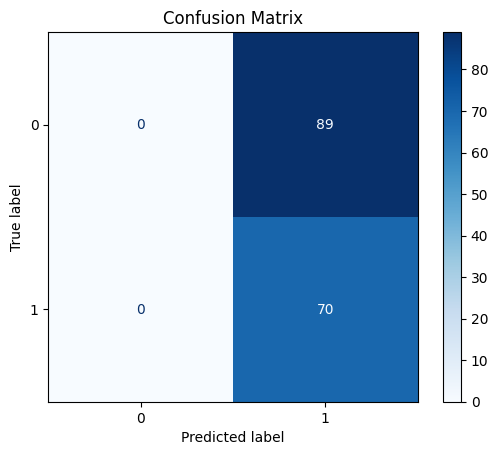

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


target = test_df.iloc[:, 0]  # Target variable
features = test_df.iloc[:, 1:]  # Exclude the target variable from features

# Initialize the StandardScaler and fit it on the features

features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
# Prepare    data for sequence model

testX, testY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    testX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    testY.append(target.iloc[i + n_future - 1])  # Use original target value directly

testX, testY = np.array(testX), np.array(testY)

predictions = optimized_model.predict(testX)


binary_predictions = (predictions > 0.5).astype(int)




import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score



# Create a confusion matrix
cm = confusion_matrix(testY, binary_predictions)

# Calculate accuracy
accuracy = accuracy_score(testY, binary_predictions)

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 44.03%
Precision: 0.4403
Recall: 1.0000
F1 Score: 0.6114
ROC-AUC: 0.5223


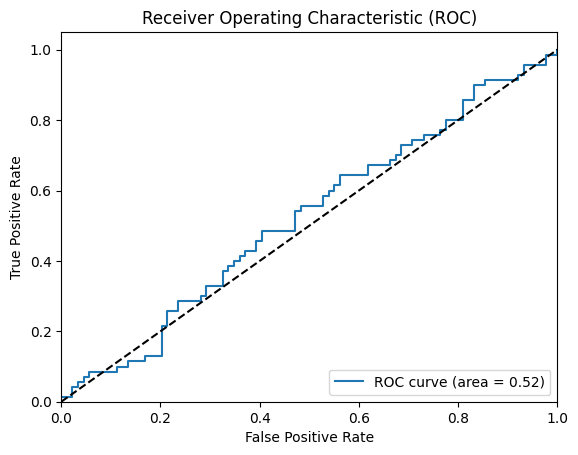

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

precision = precision_score(testY, binary_predictions)
recall = recall_score(testY, binary_predictions)
f1 = f1_score(testY, binary_predictions)
roc_auc = roc_auc_score(testY, predictions)  # Note: for ROC-AUC, we use the raw probabilities, not the binary predictions

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
fpr, tpr, thresholds = roc_curve(testY, predictions)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

##### GRU

In [ ]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers

space = [
    Integer(32, 128, name='gru_units'),
    Real(10**-5, 10**-1, "log-uniform", name='learning_rate'),
    Real(0.0, 0.5, name='dropout_rate'),
    Integer(1, 3, name='num_gru_layers')  # Adding number of LSTM layers as a tunable parameter
]

@use_named_args(space)
def objective(**params):
    model = Sequential()
    initializer = initializers.GlorotUniform(seed=42)
    # Adding variable number of LSTM layers based on the 'num_lstm_layers' parameter
    for _ in range(params['num_gru_layers']):
        model.add(GRU(units=params['gru_units'], return_sequences=True if _ < params['num_gru_layers'] - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2]), kernel_initializer=initializer))
    model.add(Dropout(params['dropout_rate']))
    model.add(Dense(1, activation='sigmoid'))

    # Using Adam with the specified learning rate
    optimizer = Adam(learning_rate=params['learning_rate'])

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(
        trainX, trainY,
        epochs=20,
        batch_size=16,
        validation_data=(valX, valY),
        verbose=1)


    validation_loss = history.history['val_loss'][-1]
    return validation_loss

from tensorflow.keras.optimizers import Adam
from skopt import gp_minimize

res_gp = gp_minimize(objective, space, n_calls=20, random_state=42)

print("Best score=%.4f" % res_gp.fun)
print("""Best parameters:
- gru_units=%d
- learning_rate=%.6f
- dropout_rate=%.6f
- num_gru_layers=%d""" % (res_gp.x[0], res_gp.x[1], res_gp.x[2], res_gp.x[3]))
best_gru_units = res_gp.x[0]
best_learning_rate = res_gp.x[1]
best_dropout_rate = res_gp.x[2]
best_num_gru_layers = res_gp.x[3]  # Number of LSTM layers is now a tunable parameter

# Build the model with these parameters
def build_optimized_model(lstm_units, learning_rate, dropout_rate, num_lstm_layers):
    model = Sequential()
    # Adding LSTM layers based on the optimized number of layers
    for i in range(num_lstm_layers):
        model.add(GRU(units=lstm_units, return_sequences=True if i < num_lstm_layers - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with Adam optimizer
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model




Epoch 1/20
36/36 [==============================] - 5s 26ms/step - loss: 0.6904 - accuracy: 0.5330 - val_loss: 0.6960 - val_accuracy: 0.4286
Epoch 2/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6902 - accuracy: 0.5383 - val_loss: 0.6969 - val_accuracy: 0.4545
Epoch 3/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6872 - accuracy: 0.5419 - val_loss: 0.6977 - val_accuracy: 0.4026
Epoch 4/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6877 - accuracy: 0.5508 - val_loss: 0.6978 - val_accuracy: 0.3896
Epoch 5/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6877 - accuracy: 0.5401 - val_loss: 0.6984 - val_accuracy: 0.4026
Epoch 6/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6881 - accuracy: 0.5526 - val_loss: 0.6987 - val_accuracy: 0.4156
Epoch 7/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6883 - accuracy: 0.5490 - val_loss: 0.6991 - val_accuracy: 0.4286
Epoch 8/20
36/36 [=

Epoch 1/100
36/36 [==============================] - 3s 18ms/step - loss: 0.6936 - accuracy: 0.5169 - val_loss: 0.7028 - val_accuracy: 0.4545
Epoch 2/100
36/36 [==============================] - 0s 5ms/step - loss: 0.6990 - accuracy: 0.5062 - val_loss: 0.7028 - val_accuracy: 0.4545
Epoch 3/100
36/36 [==============================] - 0s 5ms/step - loss: 0.6936 - accuracy: 0.5276 - val_loss: 0.7028 - val_accuracy: 0.4545
Epoch 4/100
36/36 [==============================] - 0s 5ms/step - loss: 0.6947 - accuracy: 0.5365 - val_loss: 0.7027 - val_accuracy: 0.4545
Epoch 5/100
36/36 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5045 - val_loss: 0.7027 - val_accuracy: 0.4545
Epoch 6/100
36/36 [==============================] - 0s 5ms/step - loss: 0.6903 - accuracy: 0.5276 - val_loss: 0.7027 - val_accuracy: 0.4545
Epoch 7/100
36/36 [==============================] - 0s 5ms/step - loss: 0.6958 - accuracy: 0.4955 - val_loss: 0.7027 - val_accuracy: 0.4545
Epoch 8/100


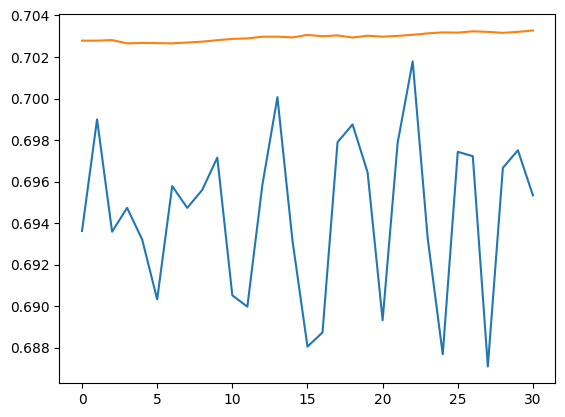

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

model = build_optimized_model(best_gru_units,best_learning_rate,best_dropout_rate,best_num_gru_layers)



from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    min_delta=0.001,  # Minimum change to qualify as an improvement
    patience=30,  # How many epochs to wait before stopping
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored metric
)
history = model.fit(
    trainX, trainY,
    epochs=100,  # Set to a large value; early stopping will halt training when improvement stops
    batch_size=16,
    validation_data=(valX, valY),  # Alternatively, use validation_data=(valX, valY)
    callbacks=[early_stopping],  # Include early stopping
    verbose=1
)


plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')



5/5 [==============================] - 0s 3ms/step
Accuracy: 44.03%


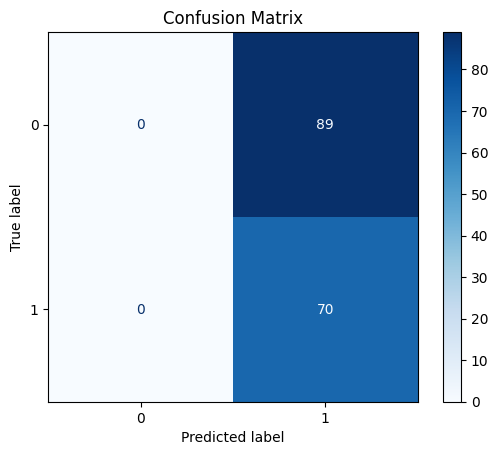

Accuracy: 44.03%
Precision: 0.4403
Recall: 1.0000
F1 Score: 0.6114
ROC-AUC: 0.4284


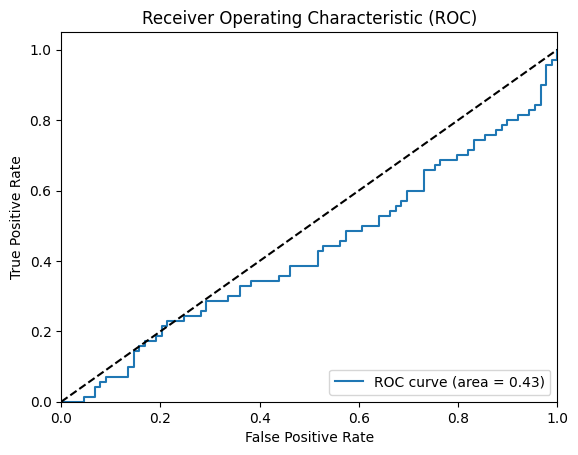

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


target = test_df.iloc[:, 0]  # Target variable
features = test_df.iloc[:, 1:]  # Exclude the target variable from features

# Initialize the StandardScaler and fit it on the features

features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
# Prepare    data for sequence model

testX, testY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    testX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    testY.append(target.iloc[i + n_future - 1])  # Use original target value directly

testX, testY = np.array(testX), np.array(testY)

predictions = model.predict(testX)


binary_predictions = (predictions > 0.5).astype(int)




import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score



# Create a confusion matrix
cm = confusion_matrix(testY, binary_predictions)

# Calculate accuracy
accuracy = accuracy_score(testY, binary_predictions)

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

precision = precision_score(testY, binary_predictions)
recall = recall_score(testY, binary_predictions)
f1 = f1_score(testY, binary_predictions)
roc_auc = roc_auc_score(testY, predictions)  # Note: for ROC-AUC, we use the raw probabilities, not the binary predictions

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
fpr, tpr, thresholds = roc_curve(testY, predictions)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()





### Sentiment Metric

#### Price & Sentiment

In [ ]:
news_smBERT=pd.read_csv('drive/MyDrive/agg_newsBERT_counts')

In [ ]:
news_smBERT['Date']=pd.to_datetime(news_smBERT['Date'], errors='coerce')

In [ ]:

indicators_df.index = pd.to_datetime(indicators_df.index)
news_smBERT.set_index('Date', inplace=True)

min_date = news_meanBERT.index.min()
max_date = news_meanBERT.index.max()

# Filter indicators_df to include only rows within the date range of news_meanBERT
filtered_indicators_df = indicators_df[(indicators_df.index >= min_date) & (indicators_df.index <= max_date)]

combined_df = filtered_indicators_df.merge(news_smBERT, left_index=True, right_index=True, how='outer')

# Initial fill for sentiment data where financial data is available but sentiment data is not
combined_df.loc[combined_df['direction'].notna(), ['SentimentMetric']] = combined_df.loc[combined_df['direction'].notna(), ['SentimentMetric']].fillna({'SentimentMetric': 0})

# Identify missing dates in indicators_df
missing_dates = pd.date_range(start=combined_df.index.min(), end=combined_df.index.max()).difference(combined_df.index)

# Handling missing dates in the financial data
for date in missing_dates:
    next_date = date + pd.Timedelta(days=1)
    if next_date in combined_df.index:
        # Finding the range of missing dates leading up to next_date
        range_start = date
        while (range_start - pd.Timedelta(days=1)) in missing_dates:
            range_start -= pd.Timedelta(days=1)

        # Check if range_start is before the start of the combined_df index to avoid looking outside the DataFrame
        if range_start < combined_df.index.min():
            continue

        # Calculate mean sentiments for the missing period and assign to next_date
        mean_sentiments = combined_df.loc[range_start:date, ['SentimentMetric']].mean()
        combined_df.loc[next_date, ['SentimentMetric']] = mean_sentiments

# Now, remove rows with missing financial data (where 'direction' is NaN)
combined_df.dropna(subset=['direction'], inplace=True)

# Finally, ensure that any remaining NaN values in the sentiment columns are filled as specified
combined_df[['SentimentMetric']] = combined_df[['SentimentMetric']].fillna({'SentimentMetric': 0})

# Ensuring all modifications did not introduce any inadvertent changes to the 'direction' or other financial columns
combined_df['direction'] = indicators_df['direction']

print(combined_df.head())

            direction         sma5         Open        Close        sma10  \
Date                                                                        
2019-12-19          1  3189.856006  3192.320068  3205.370117  3167.386987   
2019-12-20          1  3200.339990  3223.330078  3221.219971  3174.917993   
2019-12-23          1  3206.852002  3226.050049  3224.010010  3183.722998   
2019-12-24          0  3213.023975  3225.449951  3223.379883  3192.808984   
2019-12-26          1  3222.777979  3227.199951  3239.909912  3202.636987   

                  ema12      rdp5     rdp10        atr      rsi14        mom  \
Date                                                                           
2019-12-19  3166.586738  1.161409  2.820919  20.165244  73.214941  14.230225   
2019-12-20  3174.991851  1.654251  2.393904  20.173425  75.730146  15.849854   
2019-12-23  3182.533106  1.020228  2.807754  19.201042  76.154624   2.790039   
2019-12-24  3188.817225  0.966630  2.900536  18.252390  75.8

In [ ]:
combined_df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
train_split = 0.7   # 70% of the data for training
val_split = 0.1    # 10% of the data for validation

# Calculate split indices
split_index_train = int(len(combined_df) * train_split)
split_index_val = split_index_train + int(len(combined_df) * val_split)

# Split the data
train_df = combined_df.iloc[:split_index_train]
val_df = combined_df.iloc[split_index_train:split_index_val]
test_df = combined_df.iloc[split_index_val:]

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


target = train_df.iloc[:, 0]  # Target variable
features = train_df.iloc[:, 1:]  # Exclude the target variable from features

scaler = StandardScaler()
scaler = scaler.fit(features)
features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
print(full_features)
# Prepare    data for sequence model
n_past = 3
n_future = 1
trainX, trainY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    trainX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    trainY.append(target.iloc[i + n_future - 1])  # Use original target value directly

trainX, trainY = np.array(trainX), np.array(trainY)



            direction      sma5      Open     Close     sma10     ema12  \
Date                                                                      
2019-12-19          1 -0.987048 -0.987256 -0.966513 -1.016860 -1.017836   
2019-12-20          1 -0.970013 -0.936938 -0.940802 -1.004611 -1.004118   
2019-12-23          1 -0.959432 -0.932524 -0.936276 -0.990289 -0.991811   
2019-12-24          0 -0.949404 -0.933498 -0.937298 -0.975511 -0.981555   
2019-12-26          1 -0.933555 -0.930658 -0.910484 -0.959526 -0.968726   
...               ...       ...       ...       ...       ...       ...   
2022-03-10          0  0.731639  0.733107  0.743496  0.833935  0.831522   
2022-03-11          0  0.691161  0.776837  0.653936  0.804603  0.807559   
2022-03-14          0  0.682068  0.652300  0.603324  0.771938  0.779448   
2022-03-15          1  0.711884  0.629696  0.748249  0.764812  0.778094   
2022-03-16          1  0.737875  0.790857  0.903019  0.760147  0.800903   

                rdp5    

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


target = val_df.iloc[:, 0]  # Target variable
features = val_df.iloc[:, 1:]  # Exclude the target variable from features


features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
print(full_features)
# Prepare    data for sequence model
n_past = 3
n_future = 1
valX, valY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    valX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    valY.append(target.iloc[i + n_future - 1])  # Use original target value directly

valX, valY = np.array(valX), np.array(valY)

            direction      sma5      Open     Close     sma10     ema12  \
Date                                                                      
2022-03-17          1  0.787319  0.883297  0.990308  0.767984  0.833715   
2022-03-18          1  0.871424  0.984274  1.073769  0.789819  0.874396   
2022-03-21          0  0.965038  1.073616  1.070622  0.832123  0.908332   
2022-03-22          1  1.046007  1.084488  1.152428  0.887572  0.949709   
2022-03-23          0  1.077977  1.123431  1.062609  0.916582  0.970817   
...               ...       ...       ...       ...       ...       ...   
2022-07-06          1  0.038790  0.050677  0.071204  0.060065  0.071399   
2022-07-07          1  0.066019  0.094277  0.164544  0.083280  0.088629   
2022-07-08          0  0.103065  0.141998  0.159288  0.100139  0.102394   
2022-07-11          0  0.112522  0.130121  0.086371  0.090817  0.102756   
2022-07-12          0  0.108430  0.083081  0.028574  0.077592  0.094116   

                rdp5    

##### LSTM

In [ ]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers

space = [
    Integer(32, 128, name='lstm_units'),
    Real(10**-5, 10**-1, "log-uniform", name='learning_rate'),
    Real(0.0, 0.5, name='dropout_rate'),
    Integer(1, 3, name='num_lstm_layers')  # Adding number of LSTM layers as a tunable parameter
]

@use_named_args(space)
def objective(**params):
    model = Sequential()
    initializer = initializers.GlorotUniform(seed=42)
    # Adding variable number of LSTM layers based on the 'num_lstm_layers' parameter
    for _ in range(params['num_lstm_layers']):
        model.add(LSTM(units=params['lstm_units'], return_sequences=True if _ < params['num_lstm_layers'] - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2]), kernel_initializer=initializer))
    model.add(Dropout(params['dropout_rate']))
    model.add(Dense(1, activation='sigmoid'))

    # Using Adam with the specified learning rate
    optimizer = Adam(learning_rate=params['learning_rate'])

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(
        trainX, trainY,
        epochs=20,
        batch_size=16,
        validation_data=(valX, valY),
        verbose=1)


    validation_loss = history.history['val_loss'][-1]
    return validation_loss


In [ ]:
from tensorflow.keras.optimizers import Adam
from skopt import gp_minimize

res_gp = gp_minimize(objective, space, n_calls=20, random_state=42)

print("Best score=%.4f" % res_gp.fun)
print("""Best parameters:
- lstm_units=%d
- learning_rate=%.6f
- dropout_rate=%.6f
- num_lstm_layers=%d""" % (res_gp.x[0], res_gp.x[1], res_gp.x[2], res_gp.x[3]))


Epoch 1/20
36/36 [==============================] - 4s 29ms/step - loss: 0.6943 - accuracy: 0.5062 - val_loss: 0.6926 - val_accuracy: 0.5065
Epoch 2/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6917 - accuracy: 0.5241 - val_loss: 0.6924 - val_accuracy: 0.5325
Epoch 3/20
36/36 [==============================] - 0s 7ms/step - loss: 0.6905 - accuracy: 0.5365 - val_loss: 0.6923 - val_accuracy: 0.5455
Epoch 4/20
36/36 [==============================] - 0s 7ms/step - loss: 0.6904 - accuracy: 0.5383 - val_loss: 0.6921 - val_accuracy: 0.5325
Epoch 5/20
36/36 [==============================] - 0s 7ms/step - loss: 0.6914 - accuracy: 0.5134 - val_loss: 0.6924 - val_accuracy: 0.5455
Epoch 6/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6903 - accuracy: 0.5169 - val_loss: 0.6925 - val_accuracy: 0.5455
Epoch 7/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6911 - accuracy: 0.5258 - val_loss: 0.6924 - val_accuracy: 0.5455
Epoch 8/20
36/36 [=

In [ ]:
best_lstm_units = res_gp.x[0]
best_learning_rate = res_gp.x[1]
best_dropout_rate = res_gp.x[2]
best_num_lstm_layers = res_gp.x[3]  # Number of LSTM layers is now a tunable parameter

# Build the model with these parameters
def build_optimized_model(lstm_units, learning_rate, dropout_rate, num_lstm_layers):
    model = Sequential()
    # Adding LSTM layers based on the optimized number of layers
    for i in range(num_lstm_layers):
        model.add(LSTM(units=lstm_units, return_sequences=True if i < num_lstm_layers - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with Adam optimizer
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

optimized_model = build_optimized_model(best_lstm_units,best_learning_rate,best_dropout_rate,best_num_lstm_layers)
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=30,
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored metric
)
history = optimized_model.fit(
    trainX, trainY,
    epochs=100,
    batch_size=16,
    validation_data=(valX, valY),
    callbacks=[early_stopping],  # Include early stopping
    verbose=1
)


Epoch 1/100
36/36 [==============================] - 4s 29ms/step - loss: 0.7470 - accuracy: 0.5419 - val_loss: 0.7113 - val_accuracy: 0.4545
Epoch 2/100
36/36 [==============================] - 0s 6ms/step - loss: 0.7156 - accuracy: 0.5258 - val_loss: 0.6929 - val_accuracy: 0.5455
Epoch 3/100
36/36 [==============================] - 0s 6ms/step - loss: 0.7063 - accuracy: 0.5276 - val_loss: 0.7098 - val_accuracy: 0.4675
Epoch 4/100
36/36 [==============================] - 0s 6ms/step - loss: 0.7008 - accuracy: 0.5276 - val_loss: 0.6880 - val_accuracy: 0.5714
Epoch 5/100
36/36 [==============================] - 0s 6ms/step - loss: 0.7381 - accuracy: 0.4724 - val_loss: 0.6901 - val_accuracy: 0.5065
Epoch 6/100
36/36 [==============================] - 0s 6ms/step - loss: 0.7431 - accuracy: 0.4777 - val_loss: 0.7192 - val_accuracy: 0.4675
Epoch 7/100
36/36 [==============================] - 0s 7ms/step - loss: 0.7365 - accuracy: 0.5169 - val_loss: 0.9092 - val_accuracy: 0.4675
Epoch 8/100


5/5 [==============================] - 1s 3ms/step
Accuracy: 52.20%


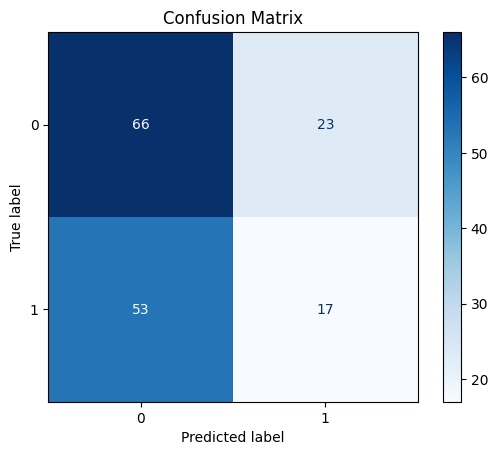

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


target = test_df.iloc[:, 0]  # Target variable
features = test_df.iloc[:, 1:]  # Exclude the target variable from features

# Initialize the StandardScaler and fit it on the features

features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
# Prepare    data for sequence model

testX, testY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    testX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    testY.append(target.iloc[i + n_future - 1])  # Use original target value directly

testX, testY = np.array(testX), np.array(testY)

predictions = optimized_model.predict(testX)


binary_predictions = (predictions > 0.5).astype(int)




import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score



# Create a confusion matrix
cm = confusion_matrix(testY, binary_predictions)

# Calculate accuracy
accuracy = accuracy_score(testY, binary_predictions)

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


5/5 [==============================] - 0s 3ms/step
Accuracy: 52.20%


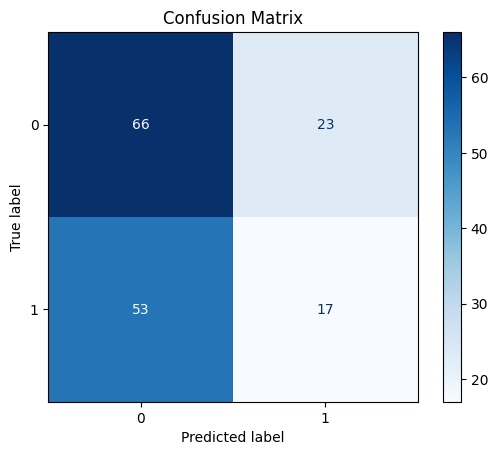

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


target = test_df.iloc[:, 0]  # Target variable
features = test_df.iloc[:, 1:]  # Exclude the target variable from features

# Initialize the StandardScaler and fit it on the features

features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
# Prepare    data for sequence model

testX, testY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    testX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    testY.append(target.iloc[i + n_future - 1])  # Use original target value directly

testX, testY = np.array(testX), np.array(testY)

predictions = optimized_model.predict(testX)


binary_predictions = (predictions > 0.5).astype(int)




import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score



# Create a confusion matrix
cm = confusion_matrix(testY, binary_predictions)

# Calculate accuracy
accuracy = accuracy_score(testY, binary_predictions)

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 52.20%
Precision: 0.4250
Recall: 0.2429
F1 Score: 0.3091
ROC-AUC: 0.5090


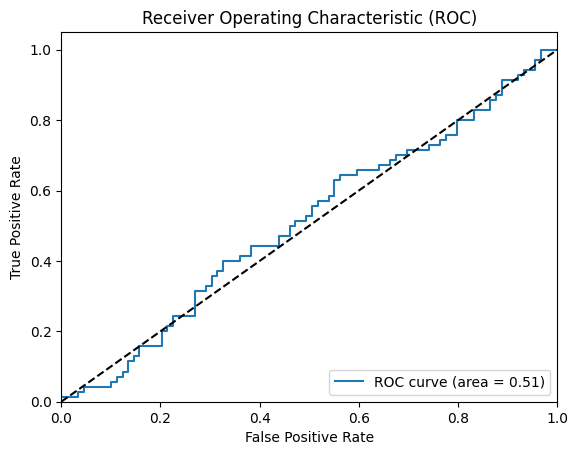

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

precision = precision_score(testY, binary_predictions)
recall = recall_score(testY, binary_predictions)
f1 = f1_score(testY, binary_predictions)
roc_auc = roc_auc_score(testY, predictions)  # Note: for ROC-AUC, we use the raw probabilities, not the binary predictions

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
fpr, tpr, thresholds = roc_curve(testY, predictions)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

##### GRU

In [ ]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers

space = [
    Integer(32, 128, name='gru_units'),
    Real(10**-5, 10**-1, "log-uniform", name='learning_rate'),
    Real(0.0, 0.5, name='dropout_rate'),
    Integer(1, 3, name='num_gru_layers')  # Adding number of LSTM layers as a tunable parameter
]

@use_named_args(space)
def objective(**params):
    model = Sequential()
    initializer = initializers.GlorotUniform(seed=42)
    # Adding variable number of LSTM layers based on the 'num_lstm_layers' parameter
    for _ in range(params['num_gru_layers']):
        model.add(GRU(units=params['gru_units'], return_sequences=True if _ < params['num_gru_layers'] - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2]), kernel_initializer=initializer))
    model.add(Dropout(params['dropout_rate']))
    model.add(Dense(1, activation='sigmoid'))

    # Using Adam with the specified learning rate
    optimizer = Adam(learning_rate=params['learning_rate'])

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(
        trainX, trainY,
        epochs=20,
        batch_size=16,
        validation_data=(valX, valY),
        verbose=1)


    validation_loss = history.history['val_loss'][-1]
    return validation_loss

from tensorflow.keras.optimizers import Adam
from skopt import gp_minimize

res_gp = gp_minimize(objective, space, n_calls=20, random_state=42)

print("Best score=%.4f" % res_gp.fun)
print("""Best parameters:
- gru_units=%d
- learning_rate=%.6f
- dropout_rate=%.6f
- num_gru_layers=%d""" % (res_gp.x[0], res_gp.x[1], res_gp.x[2], res_gp.x[3]))
best_gru_units = res_gp.x[0]
best_learning_rate = res_gp.x[1]
best_dropout_rate = res_gp.x[2]
best_num_gru_layers = res_gp.x[3]  # Number of LSTM layers is now a tunable parameter

# Build the model with these parameters
def build_optimized_model(lstm_units, learning_rate, dropout_rate, num_lstm_layers):
    model = Sequential()
    # Adding LSTM layers based on the optimized number of layers
    for i in range(num_lstm_layers):
        model.add(GRU(units=lstm_units, return_sequences=True if i < num_lstm_layers - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with Adam optimizer
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model




Epoch 1/20
36/36 [==============================] - 4s 25ms/step - loss: 0.6951 - accuracy: 0.4938 - val_loss: 0.6845 - val_accuracy: 0.5714
Epoch 2/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6962 - accuracy: 0.4973 - val_loss: 0.6852 - val_accuracy: 0.5455
Epoch 3/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6924 - accuracy: 0.5241 - val_loss: 0.6853 - val_accuracy: 0.5584
Epoch 4/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6942 - accuracy: 0.5276 - val_loss: 0.6856 - val_accuracy: 0.5584
Epoch 5/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6875 - accuracy: 0.5472 - val_loss: 0.6866 - val_accuracy: 0.5325
Epoch 6/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6891 - accuracy: 0.5223 - val_loss: 0.6871 - val_accuracy: 0.5584
Epoch 7/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6878 - accuracy: 0.5490 - val_loss: 0.6872 - val_accuracy: 0.5455
Epoch 8/20
36/36 [=

Epoch 1/100
36/36 [==============================] - 4s 27ms/step - loss: 0.7026 - accuracy: 0.4599 - val_loss: 0.6944 - val_accuracy: 0.4935
Epoch 2/100
36/36 [==============================] - 0s 6ms/step - loss: 0.6933 - accuracy: 0.5062 - val_loss: 0.6916 - val_accuracy: 0.5195
Epoch 3/100
36/36 [==============================] - 0s 6ms/step - loss: 0.6917 - accuracy: 0.5134 - val_loss: 0.6909 - val_accuracy: 0.5455
Epoch 4/100
36/36 [==============================] - 0s 7ms/step - loss: 0.6910 - accuracy: 0.5348 - val_loss: 0.6903 - val_accuracy: 0.5974
Epoch 5/100
36/36 [==============================] - 0s 7ms/step - loss: 0.6892 - accuracy: 0.5419 - val_loss: 0.6907 - val_accuracy: 0.5325
Epoch 6/100
36/36 [==============================] - 0s 7ms/step - loss: 0.6864 - accuracy: 0.5455 - val_loss: 0.6907 - val_accuracy: 0.5455
Epoch 7/100
36/36 [==============================] - 0s 7ms/step - loss: 0.6878 - accuracy: 0.5579 - val_loss: 0.6903 - val_accuracy: 0.5195
Epoch 8/100


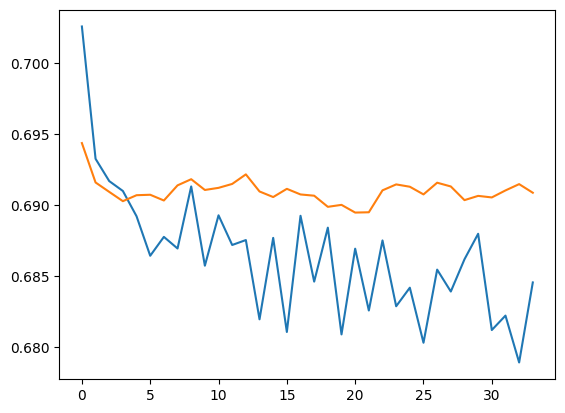

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

model = build_optimized_model(best_gru_units,best_learning_rate,best_dropout_rate,best_num_gru_layers)



from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    min_delta=0.001,  # Minimum change to qualify as an improvement
    patience=30,  # How many epochs to wait before stopping
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored metric
)
history = model.fit(
    trainX, trainY,
    epochs=100,  # Set to a large value; early stopping will halt training when improvement stops
    batch_size=16,
    validation_data=(valX, valY),  # Alternatively, use validation_data=(valX, valY)
    callbacks=[early_stopping],  # Include early stopping
    verbose=1
)


plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')



5/5 [==============================] - 1s 3ms/step
Accuracy: 50.31%


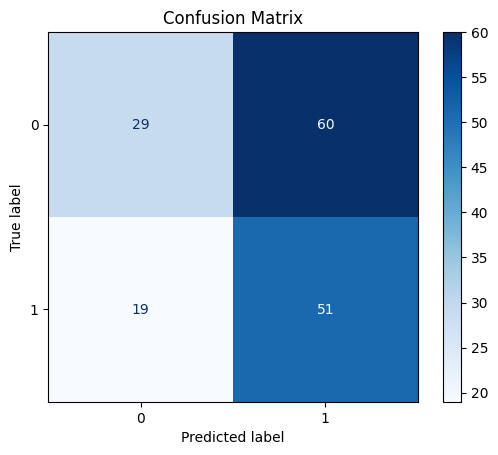

Accuracy: 50.31%
Precision: 0.4595
Recall: 0.7286
F1 Score: 0.5635
ROC-AUC: 0.5454


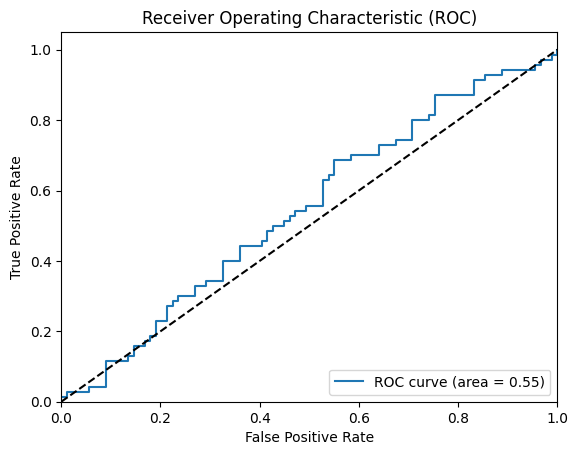

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


target = test_df.iloc[:, 0]  # Target variable
features = test_df.iloc[:, 1:]  # Exclude the target variable from features

# Initialize the StandardScaler and fit it on the features

features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
# Prepare    data for sequence model

testX, testY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    testX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    testY.append(target.iloc[i + n_future - 1])  # Use original target value directly

testX, testY = np.array(testX), np.array(testY)

predictions = model.predict(testX)


binary_predictions = (predictions > 0.5).astype(int)




import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score



# Create a confusion matrix
cm = confusion_matrix(testY, binary_predictions)

# Calculate accuracy
accuracy = accuracy_score(testY, binary_predictions)

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

precision = precision_score(testY, binary_predictions)
recall = recall_score(testY, binary_predictions)
f1 = f1_score(testY, binary_predictions)
roc_auc = roc_auc_score(testY, predictions)  # Note: for ROC-AUC, we use the raw probabilities, not the binary predictions

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
fpr, tpr, thresholds = roc_curve(testY, predictions)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()





#### Sentiment Only

In [ ]:
# List of columns to keep
columns_to_keep = ['direction', 'SentimentMetric']

# Drop columns except the ones in the list
combined_df = combined_df[columns_to_keep]

In [ ]:
train_split = 0.7   # 70% of the data for training
val_split = 0.1    # 10% of the data for validation

# Calculate split indices
split_index_train = int(len(combined_df) * train_split)
split_index_val = split_index_train + int(len(indicators_df) * val_split)

# Split the data
train_df = combined_df.iloc[:split_index_train]
val_df = combined_df.iloc[split_index_train:split_index_val]
test_df = combined_df.iloc[split_index_val:]

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


target = train_df.iloc[:, 0]  # Target variable
features = train_df.iloc[:, 1:]  # Exclude the target variable from features

scaler = StandardScaler()
scaler = scaler.fit(features)
features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
print(full_features)
# Prepare    data for sequence model
n_past = 3
n_future = 1
trainX, trainY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    trainX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    trainY.append(target.iloc[i + n_future - 1])  # Use original target value directly

trainX, trainY = np.array(trainX), np.array(trainY)

# Now, trainX includes the target variable without scaling, and trainY contains the original unscaled target values

            direction  SentimentMetric
Date                                  
2019-12-19          1         5.099071
2019-12-20          1        -0.459257
2019-12-23          1        -0.459257
2019-12-24          0        -0.459257
2019-12-26          1        -0.459257
...               ...              ...
2022-03-10          0        -0.424110
2022-03-11          0        -0.627229
2022-03-14          0        -0.382502
2022-03-15          1         0.258326
2022-03-16          1         0.101084

[564 rows x 2 columns]


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


target = val_df.iloc[:, 0]  # Target variable
features = val_df.iloc[:, 1:]  # Exclude the target variable from features


features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
print(full_features)
# Prepare    data for sequence model
n_past = 3
n_future = 1
valX, valY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    valX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    valY.append(target.iloc[i + n_future - 1])  # Use original target value directly

valX, valY = np.array(valX), np.array(valY)

            direction  SentimentMetric
Date                                  
2022-03-17          1         0.206746
2022-03-18          1         0.034085
2022-03-21          0        -0.176972
2022-03-22          1         0.292234
2022-03-23          0        -0.049101
...               ...              ...
2022-10-13          1         0.117655
2022-10-14          0         0.162319
2022-10-17          1         0.485015
2022-10-18          1         0.295087
2022-10-19          0         0.391335

[150 rows x 2 columns]


##### LSTM

In [ ]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers

space = [
    Integer(32, 128, name='lstm_units'),
    Real(10**-5, 10**-1, "log-uniform", name='learning_rate'),
    Real(0.0, 0.5, name='dropout_rate'),
    Integer(1, 3, name='num_lstm_layers')  # Adding number of LSTM layers as a tunable parameter
]

@use_named_args(space)
def objective(**params):
    model = Sequential()
    initializer = initializers.GlorotUniform(seed=42)
    # Adding variable number of LSTM layers based on the 'num_lstm_layers' parameter
    for _ in range(params['num_lstm_layers']):
        model.add(LSTM(units=params['lstm_units'], return_sequences=True if _ < params['num_lstm_layers'] - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2]), kernel_initializer=initializer))
    model.add(Dropout(params['dropout_rate']))
    model.add(Dense(1, activation='sigmoid'))

    # Using Adam with the specified learning rate
    optimizer = Adam(learning_rate=params['learning_rate'])

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(
        trainX, trainY,
        epochs=20,
        batch_size=16,
        validation_data=(valX, valY),
        verbose=1)


    validation_loss = history.history['val_loss'][-1]
    return validation_loss


In [ ]:
from tensorflow.keras.optimizers import Adam
from skopt import gp_minimize

res_gp = gp_minimize(objective, space, n_calls=20, random_state=42)

print("Best score=%.4f" % res_gp.fun)
print("""Best parameters:
- lstm_units=%d
- learning_rate=%.6f
- dropout_rate=%.6f
- num_lstm_layers=%d""" % (res_gp.x[0], res_gp.x[1], res_gp.x[2], res_gp.x[3]))


Epoch 1/20
36/36 [==============================] - 4s 29ms/step - loss: 0.6931 - accuracy: 0.4920 - val_loss: 0.6936 - val_accuracy: 0.4490
Epoch 2/20
36/36 [==============================] - 0s 7ms/step - loss: 0.6922 - accuracy: 0.5561 - val_loss: 0.6944 - val_accuracy: 0.4422
Epoch 3/20
36/36 [==============================] - 0s 7ms/step - loss: 0.6919 - accuracy: 0.5508 - val_loss: 0.6952 - val_accuracy: 0.4422
Epoch 4/20
36/36 [==============================] - 0s 7ms/step - loss: 0.6912 - accuracy: 0.5561 - val_loss: 0.6957 - val_accuracy: 0.4422
Epoch 5/20
36/36 [==============================] - 0s 7ms/step - loss: 0.6910 - accuracy: 0.5526 - val_loss: 0.6965 - val_accuracy: 0.4422
Epoch 6/20
36/36 [==============================] - 0s 7ms/step - loss: 0.6908 - accuracy: 0.5526 - val_loss: 0.6969 - val_accuracy: 0.4422
Epoch 7/20
36/36 [==============================] - 0s 7ms/step - loss: 0.6899 - accuracy: 0.5526 - val_loss: 0.6976 - val_accuracy: 0.4422
Epoch 8/20
36/36 [=

In [ ]:
best_lstm_units = res_gp.x[0]
best_learning_rate = res_gp.x[1]
best_dropout_rate = res_gp.x[2]
best_num_lstm_layers = res_gp.x[3]  # Number of LSTM layers is now a tunable parameter

# Build the model with these parameters
def build_optimized_model(lstm_units, learning_rate, dropout_rate, num_lstm_layers):
    model = Sequential()
    # Adding LSTM layers based on the optimized number of layers
    for i in range(num_lstm_layers):
        model.add(LSTM(units=lstm_units, return_sequences=True if i < num_lstm_layers - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with Adam optimizer
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

optimized_model = build_optimized_model(best_lstm_units,best_learning_rate,best_dropout_rate,best_num_lstm_layers)
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    min_delta=0.001,  # Minimum change to qualify as an improvement
    patience=30,  # How many epochs to wait before stopping
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored metric
)
history = optimized_model.fit(
    trainX, trainY,
    epochs=100,  # Set to a large value; early stopping will halt training when improvement stops
    batch_size=16,
    validation_data=(valX, valY),
    callbacks=[early_stopping],  # Include early stopping
    verbose=1
)


Epoch 1/100
36/36 [==============================] - 6s 39ms/step - loss: 0.7673 - accuracy: 0.5062 - val_loss: 0.6871 - val_accuracy: 0.5578
Epoch 2/100
36/36 [==============================] - 0s 8ms/step - loss: 0.7243 - accuracy: 0.5098 - val_loss: 0.7106 - val_accuracy: 0.4422
Epoch 3/100
36/36 [==============================] - 0s 8ms/step - loss: 0.7053 - accuracy: 0.5419 - val_loss: 0.6869 - val_accuracy: 0.5578
Epoch 4/100
36/36 [==============================] - 0s 8ms/step - loss: 0.7086 - accuracy: 0.5116 - val_loss: 0.6995 - val_accuracy: 0.5578
Epoch 5/100
36/36 [==============================] - 0s 7ms/step - loss: 0.7361 - accuracy: 0.4973 - val_loss: 0.6955 - val_accuracy: 0.5578
Epoch 6/100
36/36 [==============================] - 0s 8ms/step - loss: 0.7282 - accuracy: 0.4938 - val_loss: 0.7220 - val_accuracy: 0.4422
Epoch 7/100
36/36 [==============================] - 0s 7ms/step - loss: 0.7021 - accuracy: 0.5437 - val_loss: 0.7161 - val_accuracy: 0.4422
Epoch 8/100


3/3 [==============================] - 1s 4ms/step
Accuracy: 55.06%


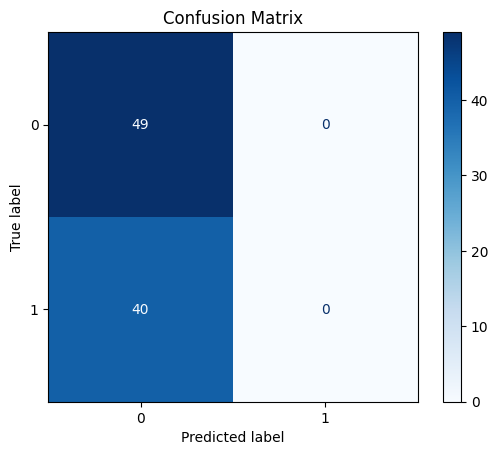

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


target = test_df.iloc[:, 0]  # Target variable
features = test_df.iloc[:, 1:]  # Exclude the target variable from features

# Initialize the StandardScaler and fit it on the features

features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
# Prepare    data for sequence model

testX, testY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    testX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    testY.append(target.iloc[i + n_future - 1])  # Use original target value directly

testX, testY = np.array(testX), np.array(testY)

predictions = optimized_model.predict(testX)


binary_predictions = (predictions > 0.5).astype(int)




import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score



# Create a confusion matrix
cm = confusion_matrix(testY, binary_predictions)

# Calculate accuracy
accuracy = accuracy_score(testY, binary_predictions)

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 55.06%
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC-AUC: 0.5008


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


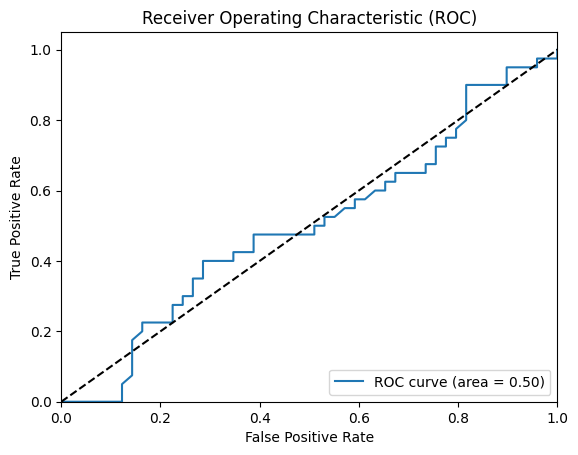

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

precision = precision_score(testY, binary_predictions)
recall = recall_score(testY, binary_predictions)
f1 = f1_score(testY, binary_predictions)
roc_auc = roc_auc_score(testY, predictions)  # Note: for ROC-AUC, we use the raw probabilities, not the binary predictions

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
fpr, tpr, thresholds = roc_curve(testY, predictions)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

##### GRU

In [ ]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers

space = [
    Integer(32, 128, name='gru_units'),
    Real(10**-5, 10**-1, "log-uniform", name='learning_rate'),
    Real(0.0, 0.5, name='dropout_rate'),
    Integer(1, 3, name='num_gru_layers')  # Adding number of LSTM layers as a tunable parameter
]

@use_named_args(space)
def objective(**params):
    model = Sequential()
    initializer = initializers.GlorotUniform(seed=42)
    # Adding variable number of LSTM layers based on the 'num_lstm_layers' parameter
    for _ in range(params['num_gru_layers']):
        model.add(GRU(units=params['gru_units'], return_sequences=True if _ < params['num_gru_layers'] - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2]), kernel_initializer=initializer))
    model.add(Dropout(params['dropout_rate']))
    model.add(Dense(1, activation='sigmoid'))

    # Using Adam with the specified learning rate
    optimizer = Adam(learning_rate=params['learning_rate'])

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(
        trainX, trainY,
        epochs=20,
        batch_size=16,
        validation_data=(valX, valY),
        verbose=1)


    validation_loss = history.history['val_loss'][-1]
    return validation_loss

from tensorflow.keras.optimizers import Adam
from skopt import gp_minimize

res_gp = gp_minimize(objective, space, n_calls=20, random_state=42)

print("Best score=%.4f" % res_gp.fun)
print("""Best parameters:
- gru_units=%d
- learning_rate=%.6f
- dropout_rate=%.6f
- num_gru_layers=%d""" % (res_gp.x[0], res_gp.x[1], res_gp.x[2], res_gp.x[3]))
best_gru_units = res_gp.x[0]
best_learning_rate = res_gp.x[1]
best_dropout_rate = res_gp.x[2]
best_num_gru_layers = res_gp.x[3]  # Number of LSTM layers is now a tunable parameter

# Build the model with these parameters
def build_optimized_model(lstm_units, learning_rate, dropout_rate, num_lstm_layers):
    model = Sequential()
    # Adding LSTM layers based on the optimized number of layers
    for i in range(num_lstm_layers):
        model.add(GRU(units=lstm_units, return_sequences=True if i < num_lstm_layers - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with Adam optimizer
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model




Epoch 1/20
36/36 [==============================] - 4s 25ms/step - loss: 0.6936 - accuracy: 0.5080 - val_loss: 0.6948 - val_accuracy: 0.4422
Epoch 2/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.5223 - val_loss: 0.6967 - val_accuracy: 0.4422
Epoch 3/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6906 - accuracy: 0.5615 - val_loss: 0.6986 - val_accuracy: 0.4422
Epoch 4/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6886 - accuracy: 0.5597 - val_loss: 0.6992 - val_accuracy: 0.4422
Epoch 5/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6890 - accuracy: 0.5526 - val_loss: 0.7005 - val_accuracy: 0.4422
Epoch 6/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6908 - accuracy: 0.5472 - val_loss: 0.7010 - val_accuracy: 0.4422
Epoch 7/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6889 - accuracy: 0.5508 - val_loss: 0.7019 - val_accuracy: 0.4422
Epoch 8/20
36/36 [=

Epoch 1/100
36/36 [==============================] - 2s 18ms/step - loss: 0.7015 - accuracy: 0.5009 - val_loss: 0.6872 - val_accuracy: 0.5510
Epoch 2/100
36/36 [==============================] - 0s 5ms/step - loss: 0.7007 - accuracy: 0.4777 - val_loss: 0.6874 - val_accuracy: 0.5646
Epoch 3/100
36/36 [==============================] - 0s 5ms/step - loss: 0.7022 - accuracy: 0.4706 - val_loss: 0.6876 - val_accuracy: 0.5850
Epoch 4/100
36/36 [==============================] - 0s 5ms/step - loss: 0.6978 - accuracy: 0.5062 - val_loss: 0.6877 - val_accuracy: 0.5782
Epoch 5/100
36/36 [==============================] - 0s 5ms/step - loss: 0.6998 - accuracy: 0.4831 - val_loss: 0.6879 - val_accuracy: 0.5714
Epoch 6/100
36/36 [==============================] - 0s 5ms/step - loss: 0.6991 - accuracy: 0.4884 - val_loss: 0.6880 - val_accuracy: 0.5646
Epoch 7/100
36/36 [==============================] - 0s 5ms/step - loss: 0.6973 - accuracy: 0.4866 - val_loss: 0.6881 - val_accuracy: 0.5578
Epoch 8/100


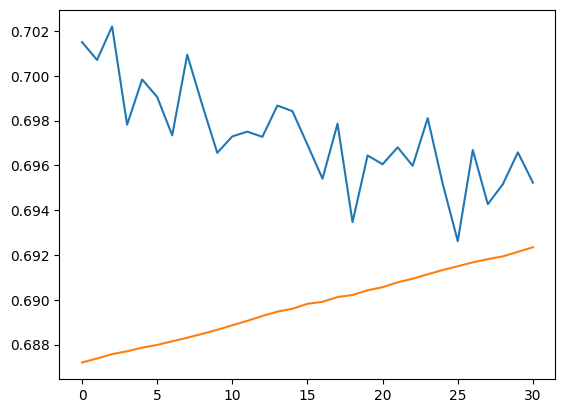

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

model = build_optimized_model(best_gru_units,best_learning_rate,best_dropout_rate,best_num_gru_layers)



from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    min_delta=0.001,  # Minimum change to qualify as an improvement
    patience=30,  # How many epochs to wait before stopping
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored metric
)
history = model.fit(
    trainX, trainY,
    epochs=100,  # Set to a large value; early stopping will halt training when improvement stops
    batch_size=16,
    validation_data=(valX, valY),  # Alternatively, use validation_data=(valX, valY)
    callbacks=[early_stopping],  # Include early stopping
    verbose=1
)


plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')



3/3 [==============================] - 0s 3ms/step
Accuracy: 57.30%


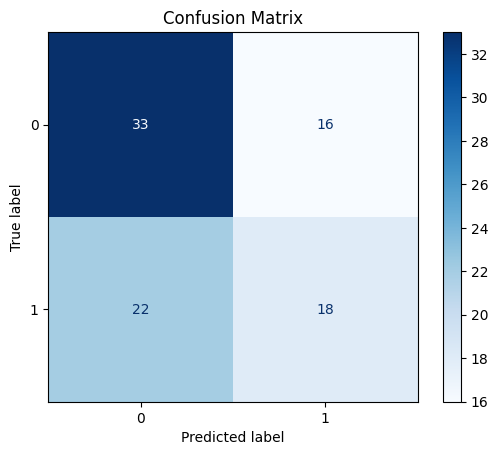

Accuracy: 57.30%
Precision: 0.5294
Recall: 0.4500
F1 Score: 0.4865
ROC-AUC: 0.5847


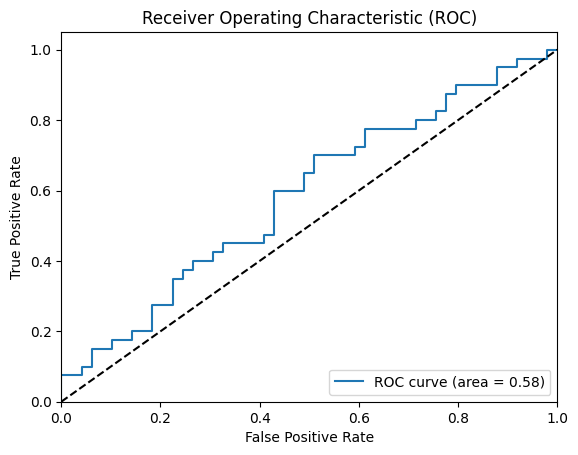

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


target = test_df.iloc[:, 0]  # Target variable
features = test_df.iloc[:, 1:]  # Exclude the target variable from features

# Initialize the StandardScaler and fit it on the features

features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
# Prepare    data for sequence model

testX, testY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    testX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    testY.append(target.iloc[i + n_future - 1])  # Use original target value directly

testX, testY = np.array(testX), np.array(testY)

predictions = model.predict(testX)


binary_predictions = (predictions > 0.5).astype(int)




import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score



# Create a confusion matrix
cm = confusion_matrix(testY, binary_predictions)

# Calculate accuracy
accuracy = accuracy_score(testY, binary_predictions)

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

precision = precision_score(testY, binary_predictions)
recall = recall_score(testY, binary_predictions)
f1 = f1_score(testY, binary_predictions)
roc_auc = roc_auc_score(testY, predictions)  # Note: for ROC-AUC, we use the raw probabilities, not the binary predictions

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
fpr, tpr, thresholds = roc_curve(testY, predictions)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()





# LM Labelled Text

## Tweets

### mean

In [ ]:
tweets_meanLM=pd.read_csv('drive/MyDrive/dailyLMtweets_mean')

In [ ]:
tweets_meanLM['Date']=pd.to_datetime(tweets_meanLM['Date'], errors='coerce')

In [ ]:

indicators_df.index = pd.to_datetime(indicators_df.index)
tweets_meanLM.set_index('Date', inplace=True)

combined_df = indicators_df.merge(tweets_meanLM, left_index=True, right_index=True, how='outer')

# Initial fill for sentiment data where financial data is available but sentiment data is not
combined_df.loc[combined_df['direction'].notna(), ['Negative', 'Positive']] = combined_df.loc[combined_df['direction'].notna(), ['Negative', 'Positive']].fillna({'Negative': 0,  'Positive': 0})

# Identify missing dates in indicators_df
missing_dates = pd.date_range(start=combined_df.index.min(), end=combined_df.index.max()).difference(combined_df.index)

# Handling missing dates in the financial data
for date in missing_dates:
    next_date = date + pd.Timedelta(days=1)
    if next_date in combined_df.index:
        # Finding the range of missing dates leading up to next_date
        range_start = date
        while (range_start - pd.Timedelta(days=1)) in missing_dates:
            range_start -= pd.Timedelta(days=1)

        # Check if range_start is before the start of the combined_df index to avoid looking outside the DataFrame
        if range_start < combined_df.index.min():
            continue

        # Calculate mean sentiments for the missing period and assign to next_date
        mean_sentiments = combined_df.loc[range_start:date, ['Negative', 'Positive']].mean()
        combined_df.loc[next_date, ['Negative',  'Positive']] = mean_sentiments

# Now, remove rows with missing financial data (where 'direction' is NaN)
combined_df.dropna(subset=['direction'], inplace=True)

# Finally, ensure that any remaining NaN values in the sentiment columns are filled as specified
combined_df[['Negative',  'Positive']] = combined_df[['Negative', 'Positive']].fillna({'Negative': 0, 'Positive': 0})

# Ensuring all modifications did not introduce any inadvertent changes to the 'direction' or other financial columns
combined_df['direction'] = indicators_df['direction']

print(combined_df.head())

            direction         sma5         Open        Close        sma10  \
Date                                                                        
2017-07-12          1  2426.227979  2435.750000  2443.250000  2427.648975   
2017-07-13          1  2433.843994  2444.989990  2447.830078  2428.362988   
2017-07-14          1  2440.662012  2449.159912  2459.270020  2432.319995   
2017-07-17          0  2447.004004  2459.500000  2459.139893  2435.892993   
2017-07-18          1  2454.020020  2455.879883  2460.610107  2439.053003   

                  ema12      rdp5     rdp10        atr      rsi14        mom  \
Date                                                                           
2017-07-12  2430.524229  0.440279  0.986621  17.556568  56.958484  17.719971   
2017-07-13  2433.186668  1.580250  0.292546  16.499849  59.121704   4.580078   
2017-07-14  2437.199491  1.405673  1.635330  16.535873  63.989950  11.439941   
2017-07-17  2440.574937  1.306318  1.474368  15.451358  63.8

In [ ]:
combined_df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
# List of columns to keep
columns_to_keep = ['direction', 'Negative','Positive']

# Drop columns except the ones in the list
combined_df = combined_df[columns_to_keep]

In [ ]:
train_split = 0.7   # 70% of the data for training
val_split = 0.1    # 10% of the data for validation

# Calculate split indices
split_index_train = int(len(combined_df) * train_split)
split_index_val = split_index_train + int(len(combined_df) * val_split)

# Split the data
train_df = combined_df.iloc[:split_index_train]
val_df = combined_df.iloc[split_index_train:split_index_val]
test_df = combined_df.iloc[split_index_val:]

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


target = train_df.iloc[:, 0]  # Target variable
features = train_df.iloc[:, 1:]  # Exclude the target variable from features

scaler = StandardScaler()
scaler = scaler.fit(features)
features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
print(full_features)
# Prepare    data for sequence model
n_past = 3
n_future = 1
trainX, trainY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    trainX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    trainY.append(target.iloc[i + n_future - 1])  # Use original target value directly

trainX, trainY = np.array(trainX), np.array(trainY)

# Now, trainX includes the target variable without scaling, and trainY contains the original unscaled target values

            direction  Negative  Positive
Date                                     
2017-07-12          1 -0.416733 -0.465305
2017-07-13          1 -0.416733 -0.465305
2017-07-14          1 -0.416733 -0.465305
2017-07-17          0 -0.416733 -0.465305
2017-07-18          1 -0.416733 -0.465305
...               ...       ...       ...
2021-09-13          1  0.887296  2.149931
2021-09-14          0  1.626693  1.583746
2021-09-15          1  0.709474  2.286097
2021-09-16          0  1.818744  1.436685
2021-09-17          0  1.403584  1.754589

[1055 rows x 3 columns]


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


target = val_df.iloc[:, 0]  # Target variable
features = val_df.iloc[:, 1:]  # Exclude the target variable from features


features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
print(full_features)
# Prepare    data for sequence model
n_past = 3
n_future = 1
valX, valY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    valX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    valY.append(target.iloc[i + n_future - 1])  # Use original target value directly

valX, valY = np.array(valX), np.array(valY)

            direction  Negative  Positive
Date                                     
2021-09-20          0  1.544552  1.646645
2021-09-21          0  0.763102  2.245031
2021-09-22          1  1.669713  1.550805
2021-09-23          1  1.253830  1.869262
2021-09-24          1  2.230702  1.121233
...               ...       ...       ...
2022-04-18          0  2.234937  1.117990
2022-04-19          1  2.179935  1.160108
2022-04-20          0  2.126060  1.201361
2022-04-21          0  2.149713  1.183250
2022-04-22          0  2.467309  0.940054

[150 rows x 3 columns]


In [ ]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers

space = [
    Integer(32, 128, name='lstm_units'),
    Real(10**-5, 10**-1, "log-uniform", name='learning_rate'),
    Real(0.0, 0.5, name='dropout_rate'),
    Integer(1, 3, name='num_lstm_layers')  # Adding number of LSTM layers as a tunable parameter
]

@use_named_args(space)
def objective(**params):
    model = Sequential()
    initializer = initializers.GlorotUniform(seed=42)
    # Adding variable number of LSTM layers based on the 'num_lstm_layers' parameter
    for _ in range(params['num_lstm_layers']):
        model.add(LSTM(units=params['lstm_units'], return_sequences=True if _ < params['num_lstm_layers'] - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2]), kernel_initializer=initializer))
    model.add(Dropout(params['dropout_rate']))
    model.add(Dense(1, activation='sigmoid'))

    # Using Adam with the specified learning rate
    optimizer = Adam(learning_rate=params['learning_rate'])

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(
        trainX, trainY,
        epochs=20,
        batch_size=16,
        validation_data=(valX, valY),
        verbose=1)


    validation_loss = history.history['val_loss'][-1]
    return validation_loss


In [ ]:
from tensorflow.keras.optimizers import Adam
from skopt import gp_minimize

res_gp = gp_minimize(objective, space, n_calls=20, random_state=42)

print("Best score=%.4f" % res_gp.fun)
print("""Best parameters:
- lstm_units=%d
- learning_rate=%.6f
- dropout_rate=%.6f
- num_lstm_layers=%d""" % (res_gp.x[0], res_gp.x[1], res_gp.x[2], res_gp.x[3]))


Epoch 1/20
66/66 [==============================] - 5s 18ms/step - loss: 0.6919 - accuracy: 0.5513 - val_loss: 0.6926 - val_accuracy: 0.5034
Epoch 2/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6905 - accuracy: 0.5646 - val_loss: 0.6926 - val_accuracy: 0.5034
Epoch 3/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6898 - accuracy: 0.5684 - val_loss: 0.6927 - val_accuracy: 0.5034
Epoch 4/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6886 - accuracy: 0.5656 - val_loss: 0.6932 - val_accuracy: 0.5034
Epoch 5/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6881 - accuracy: 0.5684 - val_loss: 0.6933 - val_accuracy: 0.5034
Epoch 6/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6873 - accuracy: 0.5675 - val_loss: 0.6935 - val_accuracy: 0.5034
Epoch 7/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6871 - accuracy: 0.5656 - val_loss: 0.6934 - val_accuracy: 0.5034
Epoch 8/20
66/66 [=

In [ ]:
best_lstm_units = res_gp.x[0]
best_learning_rate = res_gp.x[1]
best_dropout_rate = res_gp.x[2]
best_num_lstm_layers = res_gp.x[3]  # Number of LSTM layers is now a tunable parameter

# Build the model with these parameters
def build_optimized_model(lstm_units, learning_rate, dropout_rate, num_lstm_layers):
    model = Sequential()
    # Adding LSTM layers based on the optimized number of layers
    for i in range(num_lstm_layers):
        model.add(LSTM(units=lstm_units, return_sequences=True if i < num_lstm_layers - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with Adam optimizer
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


Epoch 1/100
66/66 [==============================] - 3s 12ms/step - loss: 0.6995 - accuracy: 0.4563 - val_loss: 0.7015 - val_accuracy: 0.5034
Epoch 2/100
66/66 [==============================] - 0s 5ms/step - loss: 0.7005 - accuracy: 0.4610 - val_loss: 0.7013 - val_accuracy: 0.5034
Epoch 3/100
66/66 [==============================] - 0s 5ms/step - loss: 0.6996 - accuracy: 0.4734 - val_loss: 0.7011 - val_accuracy: 0.5034
Epoch 4/100
66/66 [==============================] - 0s 5ms/step - loss: 0.6973 - accuracy: 0.4715 - val_loss: 0.7010 - val_accuracy: 0.5034
Epoch 5/100
66/66 [==============================] - 0s 5ms/step - loss: 0.6987 - accuracy: 0.4629 - val_loss: 0.7009 - val_accuracy: 0.5034
Epoch 6/100
66/66 [==============================] - 0s 5ms/step - loss: 0.6976 - accuracy: 0.4724 - val_loss: 0.7007 - val_accuracy: 0.5034
Epoch 7/100
66/66 [==============================] - 0s 5ms/step - loss: 0.6977 - accuracy: 0.4753 - val_loss: 0.7005 - val_accuracy: 0.5034
Epoch 8/100


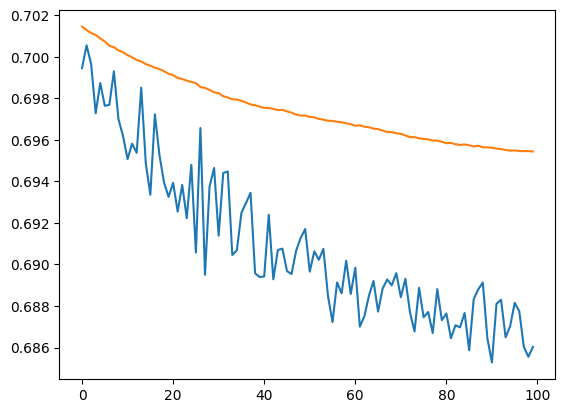

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

model = build_optimized_model(best_gru_units,best_learning_rate,best_dropout_rate,best_num_gru_layers)



from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    min_delta=0.001,  # Minimum change to qualify as an improvement
    patience=30,  # How many epochs to wait before stopping
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored metric
)
history = model.fit(
    trainX, trainY,
    epochs=100,  # Set to a large value; early stopping will halt training when improvement stops
    batch_size=16,
    validation_data=(valX, valY),  # Alternatively, use validation_data=(valX, valY)
    callbacks=[early_stopping],  # Include early stopping
    verbose=1
)


plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')



10/10 [==============================] - 0s 2ms/step
Accuracy: 47.33%


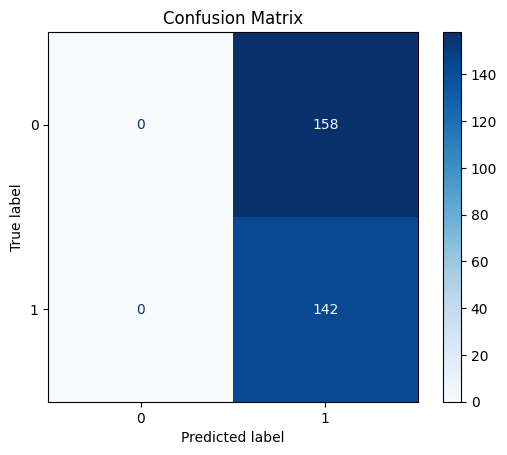

Accuracy: 47.33%
Precision: 0.4733
Recall: 1.0000
F1 Score: 0.6425
ROC-AUC: 0.4237


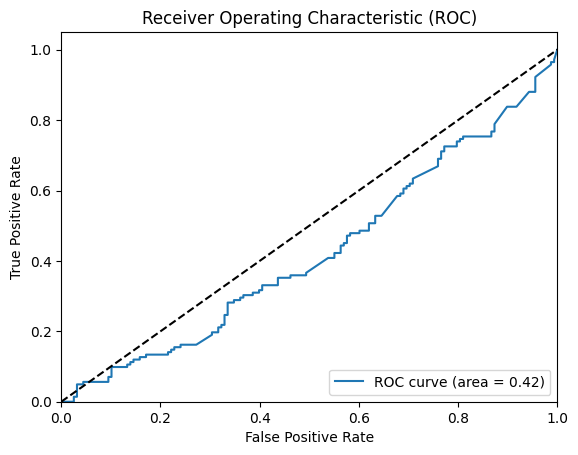

In [ ]:

from sklearn.metrics import mean_squared_error, r2_score


target = test_df.iloc[:, 0]  # Target variable
features = test_df.iloc[:, 1:]  # Exclude the target variable from features

# Initialize the StandardScaler and fit it on the features

features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
# Prepare    data for sequence model

testX, testY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    testX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    testY.append(target.iloc[i + n_future - 1])  # Use original target value directly

testX, testY = np.array(testX), np.array(testY)

predictions = model.predict(testX)


binary_predictions = (predictions > 0.5).astype(int)




import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score



# Create a confusion matrix
cm = confusion_matrix(testY, binary_predictions)

# Calculate accuracy
accuracy = accuracy_score(testY, binary_predictions)

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

precision = precision_score(testY, binary_predictions)
recall = recall_score(testY, binary_predictions)
f1 = f1_score(testY, binary_predictions)
roc_auc = roc_auc_score(testY, predictions)  # Note: for ROC-AUC, we use the raw probabilities, not the binary predictions

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
fpr, tpr, thresholds = roc_curve(testY, predictions)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()



### Sentiment Metric

In [ ]:
tweetsLM_sm=pd.read_csv('drive/MyDrive/agg_tweetsLM_counts')

In [ ]:
tweetsLM_sm['Date']=pd.to_datetime(tweetsLM_sm['Date'], errors='coerce')

In [ ]:

indicators_df.index = pd.to_datetime(indicators_df.index)
tweetsLM_sm.set_index('Date', inplace=True)

combined_df = indicators_df.merge(tweetsLM_sm, left_index=True, right_index=True, how='outer')

# Initial fill for sentiment data where financial data is available but sentiment data is not
combined_df.loc[combined_df['direction'].notna(), ['SentimentMetric']] = combined_df.loc[combined_df['direction'].notna(), ['SentimentMetric']].fillna({'SentimentMetric': 0})

# Identify missing dates in indicators_df
missing_dates = pd.date_range(start=combined_df.index.min(), end=combined_df.index.max()).difference(combined_df.index)

# Handling missing dates in the financial data
for date in missing_dates:
    next_date = date + pd.Timedelta(days=1)
    if next_date in combined_df.index:
        # Finding the range of missing dates leading up to next_date
        range_start = date
        while (range_start - pd.Timedelta(days=1)) in missing_dates:
            range_start -= pd.Timedelta(days=1)

        # Check if range_start is before the start of the combined_df index to avoid looking outside the DataFrame
        if range_start < combined_df.index.min():
            continue

        # Calculate mean sentiments for the missing period and assign to next_date
        mean_sentiments = combined_df.loc[range_start:date, ['SentimentMetric']].mean()
        combined_df.loc[next_date, ['SentimentMetric']] = mean_sentiments

# Now, remove rows with missing financial data (where 'direction' is NaN)
combined_df.dropna(subset=['direction'], inplace=True)

# Finally, ensure that any remaining NaN values in the sentiment columns are filled as specified
combined_df[['SentimentMetric']] = combined_df[['SentimentMetric']].fillna({'SentimentMetric': 0})

# Ensuring all modifications did not introduce any inadvertent changes to the 'direction' or other financial columns
combined_df['direction'] = indicators_df['direction']

print(combined_df.head())

            direction         sma5         Open        Close        sma10  \
Date                                                                        
2017-07-12          1  2426.227979  2435.750000  2443.250000  2427.648975   
2017-07-13          1  2433.843994  2444.989990  2447.830078  2428.362988   
2017-07-14          1  2440.662012  2449.159912  2459.270020  2432.319995   
2017-07-17          0  2447.004004  2459.500000  2459.139893  2435.892993   
2017-07-18          1  2454.020020  2455.879883  2460.610107  2439.053003   

                  ema12      rdp5     rdp10        atr      rsi14        mom  \
Date                                                                           
2017-07-12  2430.524229  0.440279  0.986621  17.556568  56.958484  17.719971   
2017-07-13  2433.186668  1.580250  0.292546  16.499849  59.121704   4.580078   
2017-07-14  2437.199491  1.405673  1.635330  16.535873  63.989950  11.439941   
2017-07-17  2440.574937  1.306318  1.474368  15.451358  63.8

In [ ]:
combined_df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
# List of columns to keep
columns_to_keep = ['direction', 'SentimentMetric']

# Drop columns except the ones in the list
combined_df = combined_df[columns_to_keep]

In [ ]:
train_split = 0.7   # 70% of the data for training
val_split = 0.1    # 10% of the data for validation

# Calculate split indices
split_index_train = int(len(combined_df) * train_split)
split_index_val = split_index_train + int(len(combined_df) * val_split)

# Split the data
train_df = combined_df.iloc[:split_index_train]
val_df = combined_df.iloc[split_index_train:split_index_val]
test_df = combined_df.iloc[split_index_val:]

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


target = train_df.iloc[:, 0]  # Target variable
features = train_df.iloc[:, 1:]  # Exclude the target variable from features

scaler = StandardScaler()
scaler = scaler.fit(features)
features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
print(full_features)
# Prepare    data for sequence model
n_past = 3
n_future = 1
trainX, trainY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    trainX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    trainY.append(target.iloc[i + n_future - 1])  # Use original target value directly

trainX, trainY = np.array(trainX), np.array(trainY)

# Now, trainX includes the target variable without scaling, and trainY contains the original unscaled target values

            direction  SentimentMetric
Date                                  
2017-07-12          1         0.687387
2017-07-13          1         0.197243
2017-07-14          1         0.342772
2017-07-17          0         0.799713
2017-07-18          1         0.575882
...               ...              ...
2021-09-13          1        -0.554668
2021-09-14          0        -0.479869
2021-09-15          1         0.744846
2021-09-16          0        -0.265647
2021-09-17          0         0.743136

[1055 rows x 2 columns]


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


target = val_df.iloc[:, 0]  # Target variable
features = val_df.iloc[:, 1:]  # Exclude the target variable from features


features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
print(full_features)
# Prepare    data for sequence model
n_past = 3
n_future = 1
valX, valY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    valX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    valY.append(target.iloc[i + n_future - 1])  # Use original target value directly

valX, valY = np.array(valX), np.array(valY)

            direction  SentimentMetric
Date                                  
2021-09-20          0        -1.319758
2021-09-21          0        -1.860513
2021-09-22          1        -0.786113
2021-09-23          1        -1.218946
2021-09-24          1        -0.438255
...               ...              ...
2022-04-18          0         0.624884
2022-04-19          1         0.459263
2022-04-20          0         0.052232
2022-04-21          0         0.412737
2022-04-22          0         1.519524

[150 rows x 2 columns]


In [ ]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers

space = [
    Integer(32, 128, name='lstm_units'),
    Real(10**-5, 10**-1, "log-uniform", name='learning_rate'),
    Real(0.0, 0.5, name='dropout_rate'),
    Integer(1, 3, name='num_lstm_layers')  # Adding number of LSTM layers as a tunable parameter
]

@use_named_args(space)
def objective(**params):
    model = Sequential()
    initializer = initializers.GlorotUniform(seed=42)
    # Adding variable number of LSTM layers based on the 'num_lstm_layers' parameter
    for _ in range(params['num_lstm_layers']):
        model.add(LSTM(units=params['lstm_units'], return_sequences=True if _ < params['num_lstm_layers'] - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2]), kernel_initializer=initializer))
    model.add(Dropout(params['dropout_rate']))
    model.add(Dense(1, activation='sigmoid'))

    # Using Adam with the specified learning rate
    optimizer = Adam(learning_rate=params['learning_rate'])

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(
        trainX, trainY,
        epochs=20,
        batch_size=16,
        validation_data=(valX, valY),
        verbose=1)


    validation_loss = history.history['val_loss'][-1]
    return validation_loss


In [ ]:
from tensorflow.keras.optimizers import Adam
from skopt import gp_minimize

res_gp = gp_minimize(objective, space, n_calls=20, random_state=42)

print("Best score=%.4f" % res_gp.fun)
print("""Best parameters:
- lstm_units=%d
- learning_rate=%.6f
- dropout_rate=%.6f
- num_lstm_layers=%d""" % (res_gp.x[0], res_gp.x[1], res_gp.x[2], res_gp.x[3]))


Epoch 1/20
66/66 [==============================] - 4s 18ms/step - loss: 0.6928 - accuracy: 0.5209 - val_loss: 0.6933 - val_accuracy: 0.5034
Epoch 2/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6909 - accuracy: 0.5627 - val_loss: 0.6936 - val_accuracy: 0.5034
Epoch 3/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6901 - accuracy: 0.5656 - val_loss: 0.6939 - val_accuracy: 0.5034
Epoch 4/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6887 - accuracy: 0.5694 - val_loss: 0.6944 - val_accuracy: 0.5034
Epoch 5/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6883 - accuracy: 0.5665 - val_loss: 0.6948 - val_accuracy: 0.5034
Epoch 6/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6876 - accuracy: 0.5665 - val_loss: 0.6956 - val_accuracy: 0.5034
Epoch 7/20
66/66 [==============================] - 0s 6ms/step - loss: 0.6871 - accuracy: 0.5665 - val_loss: 0.6962 - val_accuracy: 0.5034
Epoch 8/20
66/66 [=

In [ ]:
best_lstm_units = res_gp.x[0]
best_learning_rate = res_gp.x[1]
best_dropout_rate = res_gp.x[2]
best_num_lstm_layers = res_gp.x[3]  # Number of LSTM layers is now a tunable parameter

# Build the model with these parameters
def build_optimized_model(lstm_units, learning_rate, dropout_rate, num_lstm_layers):
    model = Sequential()
    # Adding LSTM layers based on the optimized number of layers
    for i in range(num_lstm_layers):
        model.add(LSTM(units=lstm_units, return_sequences=True if i < num_lstm_layers - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with Adam optimizer
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


Epoch 1/100
66/66 [==============================] - 3s 12ms/step - loss: 0.6966 - accuracy: 0.4924 - val_loss: 0.6916 - val_accuracy: 0.5306
Epoch 2/100
66/66 [==============================] - 0s 5ms/step - loss: 0.6954 - accuracy: 0.5105 - val_loss: 0.6916 - val_accuracy: 0.5034
Epoch 3/100
66/66 [==============================] - 0s 5ms/step - loss: 0.6922 - accuracy: 0.5219 - val_loss: 0.6916 - val_accuracy: 0.4762
Epoch 4/100
66/66 [==============================] - 0s 5ms/step - loss: 0.6928 - accuracy: 0.5105 - val_loss: 0.6917 - val_accuracy: 0.4762
Epoch 5/100
66/66 [==============================] - 0s 5ms/step - loss: 0.6913 - accuracy: 0.5323 - val_loss: 0.6917 - val_accuracy: 0.4694
Epoch 6/100
66/66 [==============================] - 0s 5ms/step - loss: 0.6913 - accuracy: 0.5266 - val_loss: 0.6917 - val_accuracy: 0.4966
Epoch 7/100
66/66 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.5228 - val_loss: 0.6918 - val_accuracy: 0.4762
Epoch 8/100


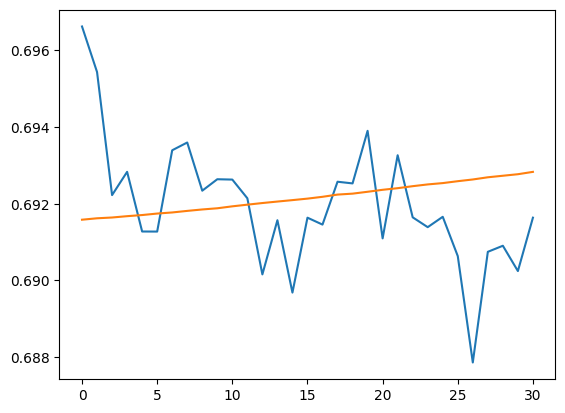

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

model = build_optimized_model(best_gru_units,best_learning_rate,best_dropout_rate,best_num_gru_layers)



from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    min_delta=0.001,  # Minimum change to qualify as an improvement
    patience=30,  # How many epochs to wait before stopping
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored metric
)
history = model.fit(
    trainX, trainY,
    epochs=100,  # Set to a large value; early stopping will halt training when improvement stops
    batch_size=16,
    validation_data=(valX, valY),  # Alternatively, use validation_data=(valX, valY)
    callbacks=[early_stopping],  # Include early stopping
    verbose=1
)


plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')



10/10 [==============================] - 0s 2ms/step
Accuracy: 47.00%


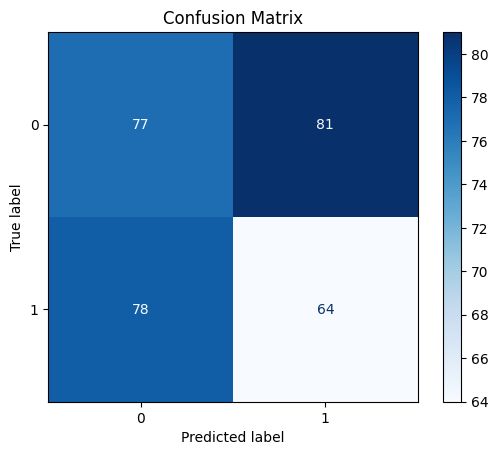

Accuracy: 47.00%
Precision: 0.4414
Recall: 0.4507
F1 Score: 0.4460
ROC-AUC: 0.4476


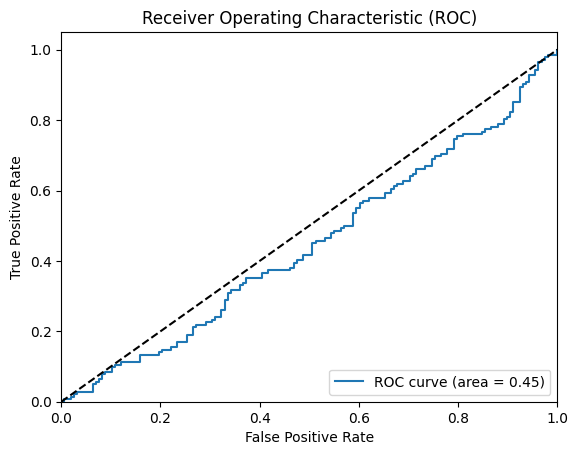

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


target = test_df.iloc[:, 0]  # Target variable
features = test_df.iloc[:, 1:]  # Exclude the target variable from features

# Initialize the StandardScaler and fit it on the features

features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
# Prepare    data for sequence model

testX, testY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    testX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    testY.append(target.iloc[i + n_future - 1])  # Use original target value directly

testX, testY = np.array(testX), np.array(testY)

predictions = model.predict(testX)


binary_predictions = (predictions > 0.5).astype(int)

# Create a confusion matrix
cm = confusion_matrix(testY, binary_predictions)

# Calculate accuracy
accuracy = accuracy_score(testY, binary_predictions)

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

precision = precision_score(testY, binary_predictions)
recall = recall_score(testY, binary_predictions)
f1 = f1_score(testY, binary_predictions)
roc_auc = roc_auc_score(testY, predictions)  # Note: for ROC-AUC, we use the raw probabilities, not the binary predictions

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
fpr, tpr, thresholds = roc_curve(testY, predictions)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## News

### mean

In [ ]:
news_meanLM=pd.read_csv('drive/MyDrive/dailyLMnews_mean')

In [ ]:
news_meanLM['Date']=pd.to_datetime(news_meanLM['Date'], errors='coerce')

In [ ]:

indicators_df.index = pd.to_datetime(indicators_df.index)
news_meanLM.set_index('Date', inplace=True)
min_date = news_meanLM.index.min()
max_date = news_meanLM.index.max()

# Filter indicators_df to include only rows within the date range of news_meanBERT
filtered_indicators_df = indicators_df[(indicators_df.index >= min_date) & (indicators_df.index <= max_date)]


combined_df = filtered_indicators_df.merge(news_meanLM, left_index=True, right_index=True, how='outer')

# Initial fill for sentiment data where financial data is available but sentiment data is not
combined_df.loc[combined_df['direction'].notna(), ['Negative', 'Positive']] = combined_df.loc[combined_df['direction'].notna(), ['Negative', 'Positive']].fillna({'Negative': 0,  'Positive': 0})

# Identify missing dates in indicators_df
missing_dates = pd.date_range(start=combined_df.index.min(), end=combined_df.index.max()).difference(combined_df.index)

# Handling missing dates in the financial data
for date in missing_dates:
    next_date = date + pd.Timedelta(days=1)
    if next_date in combined_df.index:
        # Finding the range of missing dates leading up to next_date
        range_start = date
        while (range_start - pd.Timedelta(days=1)) in missing_dates:
            range_start -= pd.Timedelta(days=1)

        # Check if range_start is before the start of the combined_df index to avoid looking outside the DataFrame
        if range_start < combined_df.index.min():
            continue

        # Calculate mean sentiments for the missing period and assign to next_date
        mean_sentiments = combined_df.loc[range_start:date, ['Negative', 'Positive']].mean()
        combined_df.loc[next_date, ['Negative',  'Positive']] = mean_sentiments

# Now, remove rows with missing financial data (where 'direction' is NaN)
combined_df.dropna(subset=['direction'], inplace=True)

# Finally, ensure that any remaining NaN values in the sentiment columns are filled as specified
combined_df[['Negative',  'Positive']] = combined_df[['Negative', 'Positive']].fillna({'Negative': 0, 'Positive': 0})

# Ensuring all modifications did not introduce any inadvertent changes to the 'direction' or other financial columns
combined_df['direction'] = indicators_df['direction']

print(combined_df.head())

            direction         sma5         Open        Close        sma10  \
Date                                                                        
2019-12-19          1  3189.856006  3192.320068  3205.370117  3167.386987   
2019-12-20          1  3200.339990  3223.330078  3221.219971  3174.917993   
2019-12-23          1  3206.852002  3226.050049  3224.010010  3183.722998   
2019-12-24          0  3213.023975  3225.449951  3223.379883  3192.808984   
2019-12-26          1  3222.777979  3227.199951  3239.909912  3202.636987   

                  ema12      rdp5     rdp10        atr      rsi14        mom  \
Date                                                                           
2019-12-19  3166.586738  1.161409  2.820919  20.165244  73.214941  14.230225   
2019-12-20  3174.991851  1.654251  2.393904  20.173425  75.730146  15.849854   
2019-12-23  3182.533106  1.020228  2.807754  19.201042  76.154624   2.790039   
2019-12-24  3188.817225  0.966630  2.900536  18.252390  75.8

In [ ]:
combined_df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
# List of columns to keep
columns_to_keep = ['direction', 'Negative','Positive']

# Drop columns except the ones in the list
combined_df = combined_df[columns_to_keep]

In [ ]:
train_split = 0.7   # 70% of the data for training
val_split = 0.1    # 10% of the data for validation

# Calculate split indices
split_index_train = int(len(combined_df) * train_split)
split_index_val = split_index_train + int(len(combined_df) * val_split)

# Split the data
train_df = combined_df.iloc[:split_index_train]
val_df = combined_df.iloc[split_index_train:split_index_val]
test_df = combined_df.iloc[split_index_val:]

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


target = train_df.iloc[:, 0]  # Target variable
features = train_df.iloc[:, 1:]  # Exclude the target variable from features

scaler = StandardScaler()
scaler = scaler.fit(features)
features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
print(full_features)
# Prepare    data for sequence model
n_past = 3
n_future = 1
trainX, trainY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    trainX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    trainY.append(target.iloc[i + n_future - 1])  # Use original target value directly

trainX, trainY = np.array(trainX), np.array(trainY)

# Now, trainX includes the target variable without scaling, and trainY contains the original unscaled target values

            direction  Negative  Positive
Date                                     
2019-12-19          1 -0.736256  6.035156
2019-12-20          1 -0.736256 -0.659856
2019-12-23          1 -0.736256 -0.659856
2019-12-24          0 -0.736256 -0.659856
2019-12-26          1 -0.736256 -0.659856
...               ...       ...       ...
2022-03-10          0  1.090465  0.114580
2022-03-11          0  0.900594 -0.051269
2022-03-14          0  1.476869 -0.000558
2022-03-15          1  1.127933  0.428063
2022-03-16          1  1.060431  0.177540

[564 rows x 3 columns]


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


target = val_df.iloc[:, 0]  # Target variable
features = val_df.iloc[:, 1:]  # Exclude the target variable from features


features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
print(full_features)
# Prepare    data for sequence model
n_past = 3
n_future = 1
valX, valY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    valX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    valY.append(target.iloc[i + n_future - 1])  # Use original target value directly

valX, valY = np.array(valX), np.array(valY)

            direction  Negative  Positive
Date                                     
2022-03-17          1  1.748729  0.133196
2022-03-18          1  1.175547  0.212245
2022-03-21          0  1.208076  0.164416
2022-03-22          1  0.877021  0.040721
2022-03-23          0  0.927505  0.133166
...               ...       ...       ...
2022-07-06          1  0.837762  0.142805
2022-07-07          1  0.138716  0.294662
2022-07-08          0  0.698870  0.998461
2022-07-11          0  0.221306  0.315796
2022-07-12          0  0.411743  0.272809

[80 rows x 3 columns]


In [ ]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers

space = [
    Integer(32, 128, name='lstm_units'),
    Real(10**-5, 10**-1, "log-uniform", name='learning_rate'),
    Real(0.0, 0.5, name='dropout_rate'),
    Integer(1, 3, name='num_lstm_layers')  # Adding number of LSTM layers as a tunable parameter
]

@use_named_args(space)
def objective(**params):
    model = Sequential()
    initializer = initializers.GlorotUniform(seed=42)
    # Adding variable number of LSTM layers based on the 'num_lstm_layers' parameter
    for _ in range(params['num_lstm_layers']):
        model.add(LSTM(units=params['lstm_units'], return_sequences=True if _ < params['num_lstm_layers'] - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2]), kernel_initializer=initializer))
    model.add(Dropout(params['dropout_rate']))
    model.add(Dense(1, activation='sigmoid'))

    # Using Adam with the specified learning rate
    optimizer = Adam(learning_rate=params['learning_rate'])

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(
        trainX, trainY,
        epochs=20,
        batch_size=16,
        validation_data=(valX, valY),
        verbose=1)


    validation_loss = history.history['val_loss'][-1]
    return validation_loss


In [ ]:
from tensorflow.keras.optimizers import Adam
from skopt import gp_minimize

res_gp = gp_minimize(objective, space, n_calls=20, random_state=42)

print("Best score=%.4f" % res_gp.fun)
print("""Best parameters:
- lstm_units=%d
- learning_rate=%.6f
- dropout_rate=%.6f
- num_lstm_layers=%d""" % (res_gp.x[0], res_gp.x[1], res_gp.x[2], res_gp.x[3]))


Epoch 1/20
36/36 [==============================] - 4s 28ms/step - loss: 0.6929 - accuracy: 0.5365 - val_loss: 0.6947 - val_accuracy: 0.4675
Epoch 2/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6917 - accuracy: 0.5526 - val_loss: 0.6950 - val_accuracy: 0.4675
Epoch 3/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6906 - accuracy: 0.5490 - val_loss: 0.6954 - val_accuracy: 0.4675
Epoch 4/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6904 - accuracy: 0.5508 - val_loss: 0.6956 - val_accuracy: 0.4675
Epoch 5/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6897 - accuracy: 0.5508 - val_loss: 0.6959 - val_accuracy: 0.4675
Epoch 6/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6898 - accuracy: 0.5437 - val_loss: 0.6961 - val_accuracy: 0.4675
Epoch 7/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6892 - accuracy: 0.5508 - val_loss: 0.6963 - val_accuracy: 0.4545
Epoch 8/20
36/36 [=

In [ ]:
best_lstm_units = res_gp.x[0]
best_learning_rate = res_gp.x[1]
best_dropout_rate = res_gp.x[2]
best_num_lstm_layers = res_gp.x[3]  # Number of LSTM layers is now a tunable parameter

# Build the model with these parameters
def build_optimized_model(lstm_units, learning_rate, dropout_rate, num_lstm_layers):
    model = Sequential()
    # Adding LSTM layers based on the optimized number of layers
    for i in range(num_lstm_layers):
        model.add(LSTM(units=lstm_units, return_sequences=True if i < num_lstm_layers - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with Adam optimizer
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


Epoch 1/100
36/36 [==============================] - 3s 18ms/step - loss: 0.7010 - accuracy: 0.4902 - val_loss: 0.6986 - val_accuracy: 0.4675
Epoch 2/100
36/36 [==============================] - 0s 5ms/step - loss: 0.6958 - accuracy: 0.4955 - val_loss: 0.6986 - val_accuracy: 0.4675
Epoch 3/100
36/36 [==============================] - 0s 5ms/step - loss: 0.6996 - accuracy: 0.5027 - val_loss: 0.6987 - val_accuracy: 0.4675
Epoch 4/100
36/36 [==============================] - 0s 5ms/step - loss: 0.6975 - accuracy: 0.4955 - val_loss: 0.6987 - val_accuracy: 0.4675
Epoch 5/100
36/36 [==============================] - 0s 5ms/step - loss: 0.6971 - accuracy: 0.5080 - val_loss: 0.6987 - val_accuracy: 0.4675
Epoch 6/100
36/36 [==============================] - 0s 5ms/step - loss: 0.6979 - accuracy: 0.4848 - val_loss: 0.6987 - val_accuracy: 0.4675
Epoch 7/100
36/36 [==============================] - 0s 5ms/step - loss: 0.6960 - accuracy: 0.4866 - val_loss: 0.6987 - val_accuracy: 0.4675
Epoch 8/100


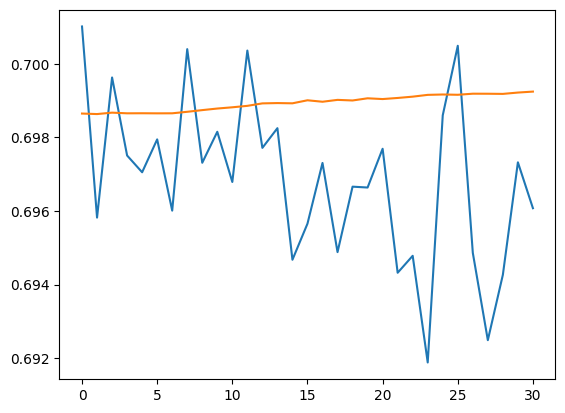

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

model = build_optimized_model(best_gru_units,best_learning_rate,best_dropout_rate,best_num_gru_layers)



from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    min_delta=0.001,  # Minimum change to qualify as an improvement
    patience=30,  # How many epochs to wait before stopping
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored metric
)
history = model.fit(
    trainX, trainY,
    epochs=100,  # Set to a large value; early stopping will halt training when improvement stops
    batch_size=16,
    validation_data=(valX, valY),  # Alternatively, use validation_data=(valX, valY)
    callbacks=[early_stopping],  # Include early stopping
    verbose=1
)


plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')



5/5 [==============================] - 0s 2ms/step
Accuracy: 44.03%


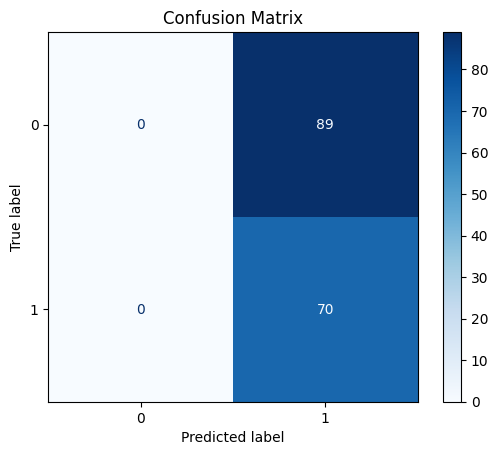

Accuracy: 44.03%
Precision: 0.4403
Recall: 1.0000
F1 Score: 0.6114
ROC-AUC: 0.4929


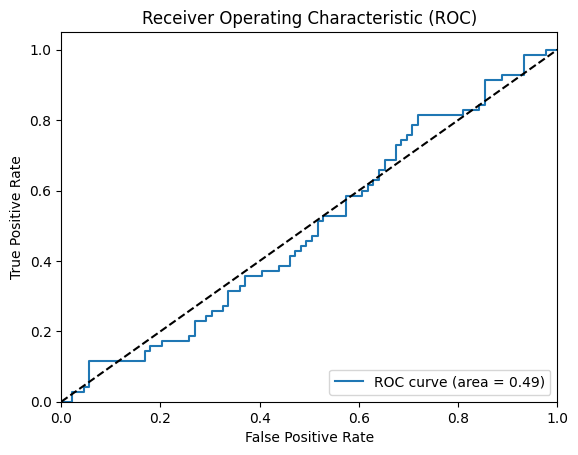

In [ ]:

from sklearn.metrics import mean_squared_error, r2_score


target = test_df.iloc[:, 0]  # Target variable
features = test_df.iloc[:, 1:]  # Exclude the target variable from features

# Initialize the StandardScaler and fit it on the features

features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
# Prepare    data for sequence model

testX, testY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    testX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    testY.append(target.iloc[i + n_future - 1])  # Use original target value directly

testX, testY = np.array(testX), np.array(testY)

predictions = model.predict(testX)


binary_predictions = (predictions > 0.5).astype(int)




import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score



# Create a confusion matrix
cm = confusion_matrix(testY, binary_predictions)

# Calculate accuracy
accuracy = accuracy_score(testY, binary_predictions)

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

precision = precision_score(testY, binary_predictions)
recall = recall_score(testY, binary_predictions)
f1 = f1_score(testY, binary_predictions)
roc_auc = roc_auc_score(testY, predictions)  # Note: for ROC-AUC, we use the raw probabilities, not the binary predictions

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
fpr, tpr, thresholds = roc_curve(testY, predictions)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()



### Sentiment Metric

In [ ]:
newsLM_sm=pd.read_csv('drive/MyDrive/agg_newsLM_counts')

In [ ]:
newsLM_sm['Date']=pd.to_datetime(newsLM_sm['Date'], errors='coerce')

In [ ]:

indicators_df.index = pd.to_datetime(indicators_df.index)
newsLM_sm.set_index('Date', inplace=True)

min_date = newsLM_sm.index.min()
max_date = newsLM_sm.index.max()

# Filter indicators_df to include only rows within the date range of news_meanBERT
filtered_indicators_df = indicators_df[(indicators_df.index >= min_date) & (indicators_df.index <= max_date)]


combined_df = filtered_indicators_df.merge(newsLM_sm, left_index=True, right_index=True, how='outer')

# Initial fill for sentiment data where financial data is available but sentiment data is not
combined_df.loc[combined_df['direction'].notna(), ['SentimentMetric']] = combined_df.loc[combined_df['direction'].notna(), ['SentimentMetric']].fillna({'SentimentMetric': 0})

# Identify missing dates in indicators_df
missing_dates = pd.date_range(start=combined_df.index.min(), end=combined_df.index.max()).difference(combined_df.index)

# Handling missing dates in the financial data
for date in missing_dates:
    next_date = date + pd.Timedelta(days=1)
    if next_date in combined_df.index:
        # Finding the range of missing dates leading up to next_date
        range_start = date
        while (range_start - pd.Timedelta(days=1)) in missing_dates:
            range_start -= pd.Timedelta(days=1)

        # Check if range_start is before the start of the combined_df index to avoid looking outside the DataFrame
        if range_start < combined_df.index.min():
            continue

        # Calculate mean sentiments for the missing period and assign to next_date
        mean_sentiments = combined_df.loc[range_start:date, ['SentimentMetric']].mean()
        combined_df.loc[next_date, ['SentimentMetric']] = mean_sentiments

# Now, remove rows with missing financial data (where 'direction' is NaN)
combined_df.dropna(subset=['direction'], inplace=True)

# Finally, ensure that any remaining NaN values in the sentiment columns are filled as specified
combined_df[['SentimentMetric']] = combined_df[['SentimentMetric']].fillna({'SentimentMetric': 0})

# Ensuring all modifications did not introduce any inadvertent changes to the 'direction' or other financial columns
combined_df['direction'] = indicators_df['direction']

print(combined_df.head())

            direction         sma5         Open        Close        sma10  \
Date                                                                        
2019-12-19          1  3189.856006  3192.320068  3205.370117  3167.386987   
2019-12-20          1  3200.339990  3223.330078  3221.219971  3174.917993   
2019-12-23          1  3206.852002  3226.050049  3224.010010  3183.722998   
2019-12-24          0  3213.023975  3225.449951  3223.379883  3192.808984   
2019-12-26          1  3222.777979  3227.199951  3239.909912  3202.636987   

                  ema12      rdp5     rdp10        atr      rsi14        mom  \
Date                                                                           
2019-12-19  3166.586738  1.161409  2.820919  20.165244  73.214941  14.230225   
2019-12-20  3174.991851  1.654251  2.393904  20.173425  75.730146  15.849854   
2019-12-23  3182.533106  1.020228  2.807754  19.201042  76.154624   2.790039   
2019-12-24  3188.817225  0.966630  2.900536  18.252390  75.8

In [ ]:
combined_df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
# List of columns to keep
columns_to_keep = ['direction', 'SentimentMetric']

# Drop columns except the ones in the list
combined_df = combined_df[columns_to_keep]

In [ ]:
train_split = 0.7   # 70% of the data for training
val_split = 0.1    # 10% of the data for validation

# Calculate split indices
split_index_train = int(len(combined_df) * train_split)
split_index_val = split_index_train + int(len(combined_df) * val_split)

# Split the data
train_df = combined_df.iloc[:split_index_train]
val_df = combined_df.iloc[split_index_train:split_index_val]
test_df = combined_df.iloc[split_index_val:]

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


target = train_df.iloc[:, 0]  # Target variable
features = train_df.iloc[:, 1:]  # Exclude the target variable from features

scaler = StandardScaler()
scaler = scaler.fit(features)
features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
print(full_features)
# Prepare    data for sequence model
n_past = 3
n_future = 1
trainX, trainY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    trainX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    trainY.append(target.iloc[i + n_future - 1])  # Use original target value directly

trainX, trainY = np.array(trainX), np.array(trainY)

# Now, trainX includes the target variable without scaling, and trainY contains the original unscaled target values

            direction  SentimentMetric
Date                                  
2019-12-19          1         5.525441
2019-12-20          1        -0.173460
2019-12-23          1        -0.173460
2019-12-24          0        -0.173460
2019-12-26          1        -0.173460
...               ...              ...
2022-03-10          0        -0.439997
2022-03-11          0        -0.524550
2022-03-14          0        -0.832238
2022-03-15          1        -0.173568
2022-03-16          1        -0.536786

[564 rows x 2 columns]


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


target = val_df.iloc[:, 0]  # Target variable
features = val_df.iloc[:, 1:]  # Exclude the target variable from features


features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
print(full_features)
# Prepare    data for sequence model
n_past = 3
n_future = 1
valX, valY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    valX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    valY.append(target.iloc[i + n_future - 1])  # Use original target value directly

valX, valY = np.array(valX), np.array(valY)

            direction  SentimentMetric
Date                                  
2022-03-17          1        -0.685209
2022-03-18          1        -0.512270
2022-03-21          0        -0.489930
2022-03-22          1        -0.360492
2022-03-23          0        -0.427914
...               ...              ...
2022-07-06          1        -0.236186
2022-07-07          1         0.179265
2022-07-08          0         0.465960
2022-07-11          0         0.258275
2022-07-12          0         0.049154

[80 rows x 2 columns]


In [ ]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers

space = [
    Integer(32, 128, name='lstm_units'),
    Real(10**-5, 10**-1, "log-uniform", name='learning_rate'),
    Real(0.0, 0.5, name='dropout_rate'),
    Integer(1, 3, name='num_lstm_layers')  # Adding number of LSTM layers as a tunable parameter
]

@use_named_args(space)
def objective(**params):
    model = Sequential()
    initializer = initializers.GlorotUniform(seed=42)
    # Adding variable number of LSTM layers based on the 'num_lstm_layers' parameter
    for _ in range(params['num_lstm_layers']):
        model.add(LSTM(units=params['lstm_units'], return_sequences=True if _ < params['num_lstm_layers'] - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2]), kernel_initializer=initializer))
    model.add(Dropout(params['dropout_rate']))
    model.add(Dense(1, activation='sigmoid'))

    # Using Adam with the specified learning rate
    optimizer = Adam(learning_rate=params['learning_rate'])

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(
        trainX, trainY,
        epochs=20,
        batch_size=16,
        validation_data=(valX, valY),
        verbose=1)


    validation_loss = history.history['val_loss'][-1]
    return validation_loss


In [ ]:
from tensorflow.keras.optimizers import Adam
from skopt import gp_minimize

res_gp = gp_minimize(objective, space, n_calls=20, random_state=42)

print("Best score=%.4f" % res_gp.fun)
print("""Best parameters:
- lstm_units=%d
- learning_rate=%.6f
- dropout_rate=%.6f
- num_lstm_layers=%d""" % (res_gp.x[0], res_gp.x[1], res_gp.x[2], res_gp.x[3]))


Epoch 1/20
36/36 [==============================] - 4s 29ms/step - loss: 0.6933 - accuracy: 0.5383 - val_loss: 0.6940 - val_accuracy: 0.4675
Epoch 2/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6919 - accuracy: 0.5526 - val_loss: 0.6946 - val_accuracy: 0.4675
Epoch 3/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6912 - accuracy: 0.5526 - val_loss: 0.6951 - val_accuracy: 0.4675
Epoch 4/20
36/36 [==============================] - 0s 7ms/step - loss: 0.6912 - accuracy: 0.5490 - val_loss: 0.6954 - val_accuracy: 0.4675
Epoch 5/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6907 - accuracy: 0.5561 - val_loss: 0.6959 - val_accuracy: 0.4675
Epoch 6/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6901 - accuracy: 0.5526 - val_loss: 0.6962 - val_accuracy: 0.4675
Epoch 7/20
36/36 [==============================] - 0s 6ms/step - loss: 0.6905 - accuracy: 0.5544 - val_loss: 0.6966 - val_accuracy: 0.4675
Epoch 8/20
36/36 [=

In [ ]:
best_lstm_units = res_gp.x[0]
best_learning_rate = res_gp.x[1]
best_dropout_rate = res_gp.x[2]
best_num_lstm_layers = res_gp.x[3]  # Number of LSTM layers is now a tunable parameter

# Build the model with these parameters
def build_optimized_model(lstm_units, learning_rate, dropout_rate, num_lstm_layers):
    model = Sequential()
    # Adding LSTM layers based on the optimized number of layers
    for i in range(num_lstm_layers):
        model.add(LSTM(units=lstm_units, return_sequences=True if i < num_lstm_layers - 1 else False,
                       input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with Adam optimizer
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


Epoch 1/100
36/36 [==============================] - 3s 20ms/step - loss: 0.7089 - accuracy: 0.5187 - val_loss: 0.7312 - val_accuracy: 0.4675
Epoch 2/100
36/36 [==============================] - 0s 5ms/step - loss: 0.6984 - accuracy: 0.5437 - val_loss: 0.7280 - val_accuracy: 0.4675
Epoch 3/100
36/36 [==============================] - 0s 5ms/step - loss: 0.6823 - accuracy: 0.5668 - val_loss: 0.6909 - val_accuracy: 0.5065
Epoch 4/100
36/36 [==============================] - 0s 5ms/step - loss: 0.6941 - accuracy: 0.5455 - val_loss: 0.7150 - val_accuracy: 0.4416
Epoch 5/100
36/36 [==============================] - 0s 6ms/step - loss: 0.6887 - accuracy: 0.5490 - val_loss: 0.7042 - val_accuracy: 0.4416
Epoch 6/100
36/36 [==============================] - 0s 6ms/step - loss: 0.6844 - accuracy: 0.5383 - val_loss: 0.7077 - val_accuracy: 0.4545
Epoch 7/100
36/36 [==============================] - 0s 5ms/step - loss: 0.6801 - accuracy: 0.5455 - val_loss: 0.7073 - val_accuracy: 0.4805
Epoch 8/100


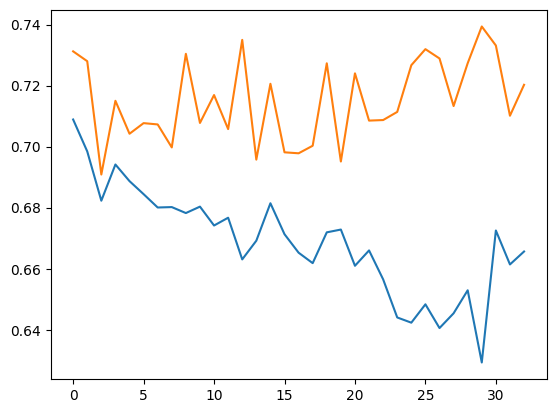

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

model = build_optimized_model(best_gru_units,best_learning_rate,best_dropout_rate,best_num_gru_layers)



from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    min_delta=0.001,  # Minimum change to qualify as an improvement
    patience=30,  # How many epochs to wait before stopping
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored metric
)
history = model.fit(
    trainX, trainY,
    epochs=100,  # Set to a large value; early stopping will halt training when improvement stops
    batch_size=16,
    validation_data=(valX, valY),  # Alternatively, use validation_data=(valX, valY)
    callbacks=[early_stopping],  # Include early stopping
    verbose=1
)


plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')



5/5 [==============================] - 0s 3ms/step
Accuracy: 52.20%


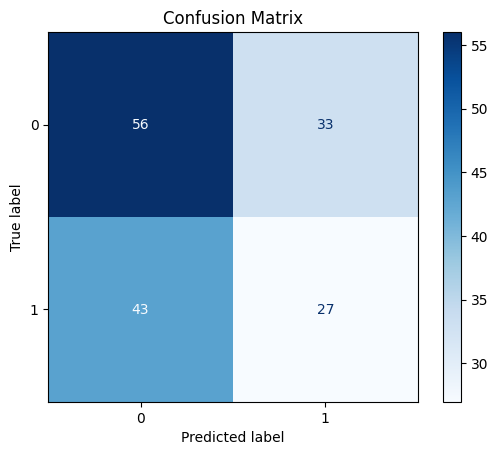

Accuracy: 52.20%
Precision: 0.4500
Recall: 0.3857
F1 Score: 0.4154
ROC-AUC: 0.5035


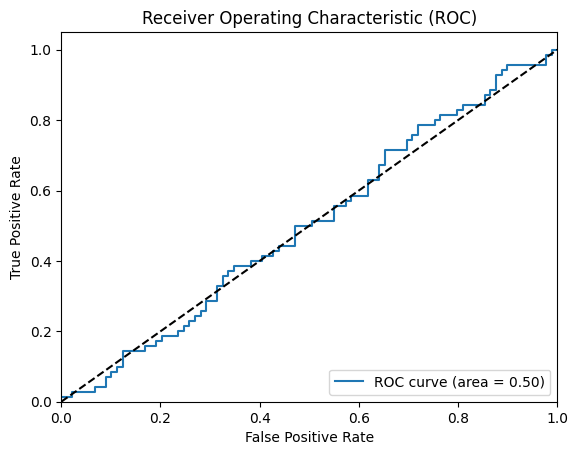

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


target = test_df.iloc[:, 0]  # Target variable
features = test_df.iloc[:, 1:]  # Exclude the target variable from features

# Initialize the StandardScaler and fit it on the features

features_scaled = scaler.transform(features)

# Convert the scaled features back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Concatenate the unscaled target variable back with the scaled features
full_features = pd.concat([target, features_scaled_df], axis=1)
# Prepare    data for sequence model

testX, testY = [], []

for i in range(n_past, len(full_features) - n_future + 1):
    # Append the sequence that includes the target variable in the features
    testX.append(full_features.iloc[i - n_past:i, :].values)  # Ensure target is included without scaling

    # Append the corresponding target value (unscaled)
    testY.append(target.iloc[i + n_future - 1])  # Use original target value directly

testX, testY = np.array(testX), np.array(testY)

predictions = model.predict(testX)


binary_predictions = (predictions > 0.5).astype(int)

# Create a confusion matrix
cm = confusion_matrix(testY, binary_predictions)

# Calculate accuracy
accuracy = accuracy_score(testY, binary_predictions)

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

precision = precision_score(testY, binary_predictions)
recall = recall_score(testY, binary_predictions)
f1 = f1_score(testY, binary_predictions)
roc_auc = roc_auc_score(testY, predictions)  # Note: for ROC-AUC, we use the raw probabilities, not the binary predictions

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
fpr, tpr, thresholds = roc_curve(testY, predictions)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
